In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [6]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 1000
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [7]:
sim_rln_train,agent = MaaSSim.simulators.simulate_RLn_with_agent(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-04-15 02:06:47,948] Setting up 4h simulation at 2023-04-15 00:06:24 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
---------------1585------------------
-------------------------------------
Day =  0
comm_rate =  0.05


[2023-04-15 02:06:56,427] simulation time 3.4 s


nP =  0    nV =  0
revenue =  0.0    npnv =  0.0
reward: 0.0
mean reward so far: nan
mean revenue so far: nan
Day =  1
comm_rate =  0.05


[2023-04-15 02:07:05,750] simulation time 4.2 s


nP =  27    nV =  4
revenue =  0.0006085636363636364    npnv =  0.028475
reward: 29.08356363636364
mean reward so far: 0.0
mean revenue so far: 0.0
Day =  2
comm_rate =  0.1


[2023-04-15 02:07:15,574] simulation time 4.4 s


nP =  35    nV =  4
revenue =  0.0013734977272727273    npnv =  0.031875
reward: 33.24849772727273
mean reward so far: 14.54178181818182
mean revenue so far: 5.35536
Day =  3
comm_rate =  0.05


[2023-04-15 02:07:25,974] simulation time 5.0 s


nP =  57    nV =  6
revenue =  0.001230201136363636    npnv =  0.049725
reward: 50.95520113636363
mean reward so far: 20.77735378787879
mean revenue so far: 11.628093333333334
Day =  4
comm_rate =  0.05


[2023-04-15 02:07:36,574] simulation time 5.4 s


nP =  70    nV =  5
revenue =  0.0013862272727272727    npnv =  0.051000000000000004
reward: 52.38622727272728
mean reward so far: 28.321815625
mean revenue so far: 14.133955
Day =  5
comm_rate =  0.1


[2023-04-15 02:07:47,093] simulation time 5.3 s


nP =  97    nV =  4
revenue =  0.003925681818181819    npnv =  0.058225000000000006
reward: 62.15068181818182
mean reward so far: 33.13469795454546
mean revenue so far: 16.186684
Day =  6
comm_rate =  0.1


[2023-04-15 02:07:58,502] simulation time 6.0 s


nP =  103    nV =  8
revenue =  0.004353836363636364    npnv =  0.077775
reward: 82.12883636363635
mean reward so far: 37.97069526515152
mean revenue so far: 25.004236666666667
Day =  7
comm_rate =  0.15


[2023-04-15 02:08:10,831] simulation time 7.0 s


nP =  133    nV =  12
revenue =  0.008862910227272727    npnv =  0.107525
reward: 116.38791022727273
mean reward so far: 44.27900113636364
mean revenue so far: 32.37899142857143
Day =  8
comm_rate =  0.1


[2023-04-15 02:08:22,563] simulation time 6.5 s


nP =  114    nV =  18
revenue =  0.004920088636363636    npnv =  0.12494999999999999
reward: 129.87008863636362
mean reward so far: 53.29261477272727
mean revenue so far: 47.83002
Day =  9
comm_rate =  0.15


[2023-04-15 02:08:34,502] simulation time 6.5 s


nP =  120    nV =  10
revenue =  0.007494862499999999    npnv =  0.0935
reward: 100.9948625
mean reward so far: 61.80122297979798
mean revenue so far: 52.13708
Day =  10
comm_rate =  0.2


[2023-04-15 02:08:46,795] simulation time 7.1 s


nP =  130    nV =  16
revenue =  0.010545554545454546    npnv =  0.12325000000000001
reward: 133.79555454545456
mean reward so far: 65.72058693181818
mean revenue so far: 60.114329999999995
Day =  11
comm_rate =  0.15


[2023-04-15 02:08:59,114] simulation time 7.1 s


nP =  137    nV =  19
revenue =  0.00859683409090909    npnv =  0.13897500000000002
reward: 147.57183409090908
mean reward so far: 71.90922035123967
mean revenue so far: 71.52227818181818
Day =  12
comm_rate =  0.15


[2023-04-15 02:09:12,595] simulation time 8.0 s


nP =  177    nV =  15
revenue =  0.01091369659090909    npnv =  0.138975
reward: 149.8886965909091
mean reward so far: 78.21443816287878
mean revenue so far: 78.17077833333333
Day =  13
comm_rate =  0.1


[2023-04-15 02:09:24,924] simulation time 7.0 s


nP =  140    nV =  11
revenue =  0.006323552272727273    npnv =  0.10625
reward: 112.57355227272727
mean reward so far: 83.72784265734266
mean revenue so far: 86.93310769230769
Day =  14
comm_rate =  0.1


[2023-04-15 02:09:37,891] simulation time 7.7 s


nP =  148    nV =  23
revenue =  0.0065266886363636355    npnv =  0.16065
reward: 167.17668863636365
mean reward so far: 85.78825048701299
mean revenue so far: 88.67320857142856
Day =  15
comm_rate =  0.15


[2023-04-15 02:09:51,066] simulation time 7.9 s


nP =  173    nV =  17
revenue =  0.010572640909090908    npnv =  0.145775
reward: 156.3476409090909
mean reward so far: 91.21414636363637
mean revenue so far: 90.41964266666666
Day =  16
comm_rate =  0.15


[2023-04-15 02:10:04,910] simulation time 8.4 s


nP =  190    nV =  17
revenue =  0.012196274999999998    npnv =  0.153
reward: 165.19627499999999
mean reward so far: 95.28498977272727
mean revenue so far: 96.39832000000001
Day =  17
comm_rate =  0.1


[2023-04-15 02:10:17,787] simulation time 7.4 s


nP =  151    nV =  15
revenue =  0.0063983363636363625    npnv =  0.12792499999999998
reward: 134.32333636363637
mean reward so far: 99.39741831550802
mean revenue so far: 103.35456235294119
Day =  18
comm_rate =  0.1


[2023-04-15 02:10:30,398] simulation time 7.4 s


nP =  161    nV =  11
revenue =  0.006784004545454546    npnv =  0.115175
reward: 121.95900454545456
mean reward so far: 101.3377470959596
mean revenue so far: 103.86879333333334
Day =  19
comm_rate =  0.05


[2023-04-15 02:10:43,654] simulation time 7.8 s


nP =  163    nV =  22
revenue =  0.00346235    npnv =  0.162775
reward: 166.23735
mean reward so far: 102.4230764354067
mean revenue so far: 104.68614526315791
Day =  20
comm_rate =  0.1


[2023-04-15 02:10:56,816] simulation time 7.8 s


nP =  160    nV =  16
revenue =  0.0071349863636363635    npnv =  0.136
reward: 143.13498636363636
mean reward so far: 105.61379011363636
mean revenue so far: 102.49870600000001
Day =  21
comm_rate =  0.1


[2023-04-15 02:11:09,254] simulation time 7.2 s


nP =  148    nV =  11
revenue =  0.006264468181818182    npnv =  0.10965
reward: 115.9144681818182
mean reward so far: 107.40051374458874
mean revenue so far: 103.59761333333336
Day =  22
comm_rate =  0.1


[2023-04-15 02:11:21,995] simulation time 7.3 s


nP =  142    nV =  25
revenue =  0.00579955    npnv =  0.1666
reward: 172.39955
mean reward so far: 107.78751167355372
mean revenue so far: 103.90020545454549
Day =  23
comm_rate =  0.1


[2023-04-15 02:11:35,305] simulation time 8.0 s


nP =  182    nV =  13
revenue =  0.007479622727272728    npnv =  0.1326
reward: 140.07962272727272
mean reward so far: 110.5967307312253
mean revenue so far: 103.82072173913046
Day =  24
comm_rate =  0.1


[2023-04-15 02:11:48,637] simulation time 7.9 s


nP =  169    nV =  18
revenue =  0.007002972727272727    npnv =  0.14832499999999998
reward: 155.3279727272727
mean reward so far: 111.82518456439392
mean revenue so far: 104.979915
Day =  25
comm_rate =  0.15


[2023-04-15 02:12:01,643] simulation time 7.6 s


nP =  171    nV =  11
revenue =  0.01085373409090909    npnv =  0.119425
reward: 130.2787340909091
mean reward so far: 113.56529609090907
mean revenue so far: 105.71081120000001
Day =  26
comm_rate =  0.15


[2023-04-15 02:12:14,099] simulation time 7.2 s


nP =  141    nV =  14
revenue =  0.008618839772727272    npnv =  0.119425
reward: 128.0438397727273
mean reward so far: 114.2081206293706
mean revenue so far: 108.99215384615385
Day =  27
comm_rate =  0.1


[2023-04-15 02:12:27,900] simulation time 8.2 s


nP =  179    nV =  16
revenue =  0.007576284090909091    npnv =  0.14407499999999998
reward: 151.6512840909091
mean reward so far: 114.72055467171714
mean revenue so far: 110.57361407407409
Day =  28
comm_rate =  0.1


[2023-04-15 02:12:41,584] simulation time 8.4 s


nP =  183    nV =  15
revenue =  0.00738169090909091    npnv =  0.14152499999999998
reward: 148.90669090909088
mean reward so far: 116.03950929383113
mean revenue so far: 111.38679214285716
Day =  29
comm_rate =  0.15


[2023-04-15 02:12:54,411] simulation time 7.6 s


nP =  157    nV =  16
revenue =  0.009831678409090909    npnv =  0.134725
reward: 144.5566784090909
mean reward so far: 117.1728603840125
mean revenue so far: 112.02579103448276
Day =  30
comm_rate =  0.15


[2023-04-15 02:13:07,846] simulation time 8.2 s


nP =  173    nV =  16
revenue =  0.010803010227272727    npnv =  0.14152499999999998
reward: 152.3280102272727
mean reward so far: 118.08565431818178
mean revenue so far: 114.059516
Day =  31
comm_rate =  0.1


[2023-04-15 02:13:20,667] simulation time 7.6 s


nP =  159    nV =  14
revenue =  0.006589725    npnv =  0.12707500000000002
reward: 133.664725
mean reward so far: 119.1902464442815
mean revenue so far: 116.51349870967742
Day =  32
comm_rate =  0.1


[2023-04-15 02:13:33,749] simulation time 7.8 s


nP =  166    nV =  17
revenue =  0.007026065909090909    npnv =  0.1428
reward: 149.82606590909091
mean reward so far: 119.6425738991477
mean revenue so far: 116.49680062499999
Day =  33
comm_rate =  0.15


[2023-04-15 02:13:46,843] simulation time 7.6 s


nP =  159    nV =  13
revenue =  0.010101825    npnv =  0.12282500000000002
reward: 132.926825
mean reward so far: 120.55722517217629
mean revenue so far: 116.71382969696968
Day =  34
comm_rate =  0.1


[2023-04-15 02:13:59,475] simulation time 7.3 s


nP =  148    nV =  16
revenue =  0.006355054545454545    npnv =  0.1309
reward: 137.25505454545456
mean reward so far: 120.92103693181816
mean revenue so far: 118.51024999999998
Day =  35
comm_rate =  0.05


[2023-04-15 02:14:12,480] simulation time 7.5 s


nP =  155    nV =  20
revenue =  0.0030913136363636363    npnv =  0.15087499999999998
reward: 153.96631363636362
mean reward so far: 121.38772314935062
mean revenue so far: 118.31992742857142
Day =  36
comm_rate =  0.1


[2023-04-15 02:14:25,054] simulation time 7.3 s


nP =  159    nV =  10
revenue =  0.006588845454545454    npnv =  0.110075
reward: 116.66384545454545
mean reward so far: 122.29268399621209
mean revenue so far: 116.54457166666664
Day =  37
comm_rate =  0.15


[2023-04-15 02:14:38,170] simulation time 7.6 s


nP =  159    nV =  19
revenue =  0.009525426136363634    npnv =  0.14832499999999998
reward: 157.85042613636364
mean reward so far: 122.14055322481569
mean revenue so far: 116.52887189189187
Day =  38
comm_rate =  0.2


[2023-04-15 02:14:50,581] simulation time 7.1 s


nP =  142    nV =  11
revenue =  0.012419286363636362    npnv =  0.1071
reward: 119.51928636363635
mean reward so far: 123.080286722488
mean revenue so far: 117.8740989473684
Day =  39
comm_rate =  0.15


[2023-04-15 02:15:03,547] simulation time 7.5 s


nP =  150    nV =  17
revenue =  0.009028390909090907    npnv =  0.136
reward: 145.02839090909092
mean reward so far: 122.98897902097899
mean revenue so far: 120.45628717948716
Day =  40
comm_rate =  0.1


[2023-04-15 02:15:17,019] simulation time 8.3 s


nP =  177    nV =  15
revenue =  0.007295147727272727    npnv =  0.138975
reward: 146.27014772727273
mean reward so far: 123.53996431818182
mean revenue so far: 121.41737199999997
Day =  41
comm_rate =  0.1


[2023-04-15 02:15:30,514] simulation time 8.2 s


nP =  185    nV =  16
revenue =  0.00785139090909091    npnv =  0.14662499999999998
reward: 154.47639090909092
mean reward so far: 124.09435903547673
mean revenue so far: 121.5875482926829
Day =  42
comm_rate =  0.1


[2023-04-15 02:15:43,708] simulation time 7.9 s


nP =  168    nV =  21
revenue =  0.007278170454545454    npnv =  0.16065
reward: 167.92817045454547
mean reward so far: 124.81774074675324
mean revenue so far: 121.9827133333333
Day =  43
comm_rate =  0.1


[2023-04-15 02:15:57,165] simulation time 7.9 s


nP =  170    nV =  16
revenue =  0.00689555    npnv =  0.14025
reward: 147.14555000000001
mean reward so far: 125.8203088794926
mean revenue so far: 122.12487813953486
Day =  44
comm_rate =  0.1


[2023-04-15 02:16:10,429] simulation time 8.0 s


nP =  180    nV =  12
revenue =  0.008083902272727272    npnv =  0.1275
reward: 135.58390227272727
mean reward so far: 126.30497345041323
mean revenue so far: 122.1075327272727
Day =  45
comm_rate =  0.05


[2023-04-15 02:16:23,219] simulation time 7.5 s


nP =  154    nV =  16
revenue =  0.0034191704545454547    npnv =  0.13344999999999999
reward: 136.86917045454544
mean reward so far: 126.51117186868687
mean revenue so far: 122.55573599999997
Day =  46
comm_rate =  0.05


[2023-04-15 02:16:36,458] simulation time 7.9 s


nP =  170    nV =  19
revenue =  0.0035824579545454547    npnv =  0.153
reward: 156.58245795454545
mean reward so far: 126.73634575098814
mean revenue so far: 121.19968521739126
Day =  47
comm_rate =  0


[2023-04-15 02:16:49,923] simulation time 8.0 s


nP =  172    nV =  21
revenue =  0.0    npnv =  0.16235
reward: 162.35
mean reward so far: 127.3713694148936
mean revenue so far: 119.96248468085103
Day =  48
comm_rate =  0.05


[2023-04-15 02:17:03,156] simulation time 8.0 s


nP =  173    nV =  15
revenue =  0.0035621431818181814    npnv =  0.13727499999999998
reward: 140.83714318181816
mean reward so far: 128.10009088541665
mean revenue so far: 117.46326625
Day =  49
comm_rate =  0


[2023-04-15 02:17:16,533] simulation time 7.8 s


nP =  170    nV =  15
revenue =  0.0    npnv =  0.136
reward: 136.0
mean reward so far: 128.36003072820034
mean revenue so far: 116.34552040816327
Day =  50
comm_rate =  0


[2023-04-15 02:17:29,400] simulation time 7.6 s


nP =  160    nV =  15
revenue =  0.0    npnv =  0.13175
reward: 131.75
mean reward so far: 128.51283011363634
mean revenue so far: 114.01861000000001
Day =  51
comm_rate =  0.0


[2023-04-15 02:17:43,060] simulation time 8.4 s


nP =  181    nV =  14
revenue =  0.0    npnv =  0.136425
reward: 136.425
mean reward so far: 128.5763040329768
mean revenue so far: 111.78295098039216
Day =  52
comm_rate =  0.05


[2023-04-15 02:17:56,445] simulation time 8.1 s


nP =  176    nV =  16
revenue =  0.0036216352272727278    npnv =  0.14279999999999998
reward: 146.4216352272727
mean reward so far: 128.72724049388108
mean revenue so far: 109.63327884615386
Day =  53
comm_rate =  0.05


[2023-04-15 02:18:09,369] simulation time 7.6 s


nP =  165    nV =  10
revenue =  0.0032810045454545454    npnv =  0.112625
reward: 115.90600454545455
mean reward so far: 129.0610969982847
mean revenue so far: 108.76738264150944
Day =  54
comm_rate =  0.1


[2023-04-15 02:18:22,168] simulation time 7.3 s


nP =  161    nV =  9
revenue =  0.006451584090909091    npnv =  0.10667499999999999
reward: 113.12658409090909
mean reward so far: 128.81748417508413
mean revenue so far: 107.8225362962963
Day =  55
comm_rate =  0.1


[2023-04-15 02:18:35,604] simulation time 8.2 s


nP =  183    nV =  20
revenue =  0.007571338636363636    npnv =  0.162775
reward: 170.34633863636364
mean reward so far: 128.5321950826446
mean revenue so far: 107.92663345454547
Day =  56
comm_rate =  0.05


[2023-04-15 02:18:48,970] simulation time 7.8 s


nP =  167    nV =  15
revenue =  0.0033171386363636366    npnv =  0.134725
reward: 138.04213863636363
mean reward so far: 129.27887621753246
mean revenue so far: 108.37893571428572
Day =  57
comm_rate =  0.05


[2023-04-15 02:19:02,073] simulation time 7.8 s


nP =  169    nV =  17
revenue =  0.0035692454545454546    npnv =  0.144075
reward: 147.64424545454548
mean reward so far: 129.43261766347686
mean revenue so far: 107.50179017543859
Day =  58
comm_rate =  0.1


[2023-04-15 02:19:15,426] simulation time 8.0 s


nP =  176    nV =  21
revenue =  0.007134206818181817    npnv =  0.16405
reward: 171.18420681818182
mean reward so far: 129.7466112460815
mean revenue so far: 106.7313924137931
Day =  59
comm_rate =  0.1


[2023-04-15 02:19:28,443] simulation time 7.5 s


nP =  155    nV =  14
revenue =  0.006158647727272727    npnv =  0.12537500000000001
reward: 131.53364772727275
mean reward so far: 130.44894337442219
mean revenue so far: 107.05055593220338
Day =  60
comm_rate =  0.1


[2023-04-15 02:19:41,289] simulation time 7.6 s


nP =  157    nV =  19
revenue =  0.00664705    npnv =  0.147475
reward: 154.12205
mean reward so far: 130.46702178030304
mean revenue so far: 107.07291666666667
Day =  61
comm_rate =  0.15


[2023-04-15 02:19:54,466] simulation time 7.7 s


nP =  161    nV =  15
revenue =  0.009429139772727272    npnv =  0.132175
reward: 141.60413977272728
mean reward so far: 130.85480912816692
mean revenue so far: 107.23546032786885
Day =  62
comm_rate =  0.15


[2023-04-15 02:20:07,540] simulation time 7.8 s


nP =  166    nV =  14
revenue =  0.01048399431818182    npnv =  0.13005000000000003
reward: 140.53399431818184
mean reward so far: 131.02818542888565
mean revenue so far: 108.18251516129033
Day =  63
comm_rate =  0.15


[2023-04-15 02:20:20,822] simulation time 7.9 s


nP =  172    nV =  15
revenue =  0.010644317045454543    npnv =  0.13684999999999997
reward: 147.49431704545452
mean reward so far: 131.17907128427132
mean revenue so far: 109.39419428571429
Day =  64
comm_rate =  0.15


[2023-04-15 02:20:34,675] simulation time 8.3 s


nP =  186    nV =  19
revenue =  0.011914332954545453    npnv =  0.1598
reward: 171.71433295454545
mean reward so far: 131.43399699928977
mean revenue so far: 110.6120971875
Day =  65
comm_rate =  0.2


[2023-04-15 02:20:48,366] simulation time 8.4 s


nP =  192    nV =  17
revenue =  0.015533686363636362    npnv =  0.15385
reward: 169.38368636363634
mean reward so far: 132.05369447552448
mean revenue so far: 112.13640738461538
Day =  66
comm_rate =  0.25


[2023-04-15 02:21:01,792] simulation time 7.9 s


nP =  171    nV =  14
revenue =  0.01738174431818182    npnv =  0.13217500000000001
reward: 149.55674431818184
mean reward so far: 132.61930041322316
mean revenue so far: 114.57968727272727
Day =  67
comm_rate =  0.25


[2023-04-15 02:21:15,096] simulation time 8.0 s


nP =  166    nV =  21
revenue =  0.016169397727272727    npnv =  0.1598
reward: 175.96939772727274
mean reward so far: 132.87209808344642
mean revenue so far: 117.43549343283583
Day =  68
comm_rate =  0.25


[2023-04-15 02:21:29,892] simulation time 9.2 s


nP =  209    nV =  20
revenue =  0.021521886363636365    npnv =  0.173825
reward: 195.34688636363637
mean reward so far: 133.50588190173798
mean revenue so far: 119.89352147058824
Day =  69
comm_rate =  0.3


[2023-04-15 02:21:43,854] simulation time 8.2 s


nP =  173    nV =  19
revenue =  0.021006027272727268    npnv =  0.154275
reward: 175.28102727272727
mean reward so far: 134.4021283432148
mean revenue so far: 123.64557478260869
Day =  70
comm_rate =  0.25


[2023-04-15 02:21:57,194] simulation time 8.0 s


nP =  174    nV =  25
revenue =  0.017808511363636363    npnv =  0.1802
reward: 198.00851136363636
mean reward so far: 134.9861126136364
mean revenue so far: 127.16072485714285
Day =  71
comm_rate =  0.2


[2023-04-15 02:22:11,050] simulation time 8.3 s


nP =  182    nV =  18
revenue =  0.014400631818181818    npnv =  0.15385
reward: 168.2506318181818
mean reward so far: 135.8737520326505
mean revenue so far: 129.78423295774647
Day =  72
comm_rate =  0.2


[2023-04-15 02:22:25,018] simulation time 8.6 s


nP =  199    nV =  23
revenue =  0.016109436363636362    npnv =  0.18232500000000001
reward: 198.4344363636364
mean reward so far: 136.3234309185606
mean revenue so far: 131.5018286111111
Day =  73
comm_rate =  0.25


[2023-04-15 02:22:39,339] simulation time 8.7 s


nP =  198    nV =  15
revenue =  0.018968744318181817    npnv =  0.14789999999999998
reward: 166.8687443181818
mean reward so far: 137.17426660958904
mean revenue so far: 133.5843526027397
Day =  74
comm_rate =  0.2


[2023-04-15 02:22:52,983] simulation time 8.2 s


nP =  167    nV =  19
revenue =  0.013672    npnv =  0.151725
reward: 165.397
mean reward so far: 137.57554333538084
mean revenue so far: 136.29064378378376
Day =  75
comm_rate =  0.15


[2023-04-15 02:23:07,270] simulation time 8.7 s


nP =  201    nV =  13
revenue =  0.012316274999999998    npnv =  0.140675
reward: 152.991275
mean reward so far: 137.9464960909091
mean revenue so far: 137.68179786666664
Day =  76
comm_rate =  0.2


[2023-04-15 02:23:22,474] simulation time 9.1 s


nP =  204    nV =  15
revenue =  0.01662499090909091    npnv =  0.15045
reward: 167.0749909090909
mean reward so far: 138.144453708134
mean revenue so far: 138.72238526315786
Day =  77
comm_rate =  0.15


[2023-04-15 02:23:36,582] simulation time 8.3 s


nP =  174    nV =  14
revenue =  0.010903142045454542    npnv =  0.13344999999999999
reward: 144.35314204545452
mean reward so far: 138.52017497048408
mean revenue so far: 140.72079376623375
Day =  78
comm_rate =  0.1


[2023-04-15 02:23:51,090] simulation time 8.7 s


nP =  202    nV =  16
revenue =  0.008230702272727273    npnv =  0.15385
reward: 162.08070227272728
mean reward so far: 138.59495659965037
mean revenue so far: 141.37687717948717
Day =  79
comm_rate =  0.05


[2023-04-15 02:24:05,370] simulation time 8.5 s


nP =  186    nV =  16
revenue =  0.003961704545454545    npnv =  0.14705
reward: 151.01170454545453
mean reward so far: 138.89224451956272
mean revenue so far: 141.42097189873417
Day =  80
comm_rate =  0.1


[2023-04-15 02:24:19,616] simulation time 8.6 s


nP =  182    nV =  28
revenue =  0.007289790909090909    npnv =  0.19635
reward: 203.63979090909092
mean reward so far: 139.04373776988638
mean revenue so far: 140.52478474999998
Day =  81
comm_rate =  0.15


[2023-04-15 02:24:34,218] simulation time 8.9 s


nP =  185    nV =  18
revenue =  0.011165454545454543    npnv =  0.15512499999999999
reward: 166.29045454545454
mean reward so far: 139.8412199074074
mean revenue so far: 140.37386543209874
Day =  82
comm_rate =  0.1


[2023-04-15 02:24:48,951] simulation time 9.1 s


nP =  204    nV =  17
revenue =  0.008155922727272728    npnv =  0.15895
reward: 167.1059227272727
mean reward so far: 140.1637715493348
mean revenue so far: 141.05847682926827
Day =  83
comm_rate =  0.15


[2023-04-15 02:25:03,440] simulation time 8.9 s


nP =  196    nV =  23
revenue =  0.01159008409090909    npnv =  0.18105000000000002
reward: 192.6400840909091
mean reward so far: 140.4883757803943
mean revenue so far: 141.08842578313252
Day =  84
comm_rate =  0.1


[2023-04-15 02:25:18,781] simulation time 9.6 s


nP =  210    nV =  19
revenue =  0.008239472727272728    npnv =  0.17
reward: 178.23947272727273
mean reward so far: 141.10922945075757
mean revenue so far: 141.83720023809522
Day =  85
comm_rate =  0.1


[2023-04-15 02:25:33,166] simulation time 8.6 s


nP =  196    nV =  13
revenue =  0.008167081818181817    npnv =  0.13855
reward: 146.71708181818184
mean reward so far: 141.54605584224598
mean revenue so far: 141.87458282352938
Day =  86
comm_rate =  0.05


[2023-04-15 02:25:48,409] simulation time 9.5 s


nP =  223    nV =  17
revenue =  0.0046462249999999995    npnv =  0.167025
reward: 171.671225
mean reward so far: 141.60618405126849
mean revenue so far: 141.89628116279067
Day =  87
comm_rate =  0


[2023-04-15 02:26:03,429] simulation time 9.1 s


nP =  209    nV =  18
revenue =  0.0    npnv =  0.165325
reward: 165.32500000000002
mean reward so far: 141.95175923458726
mean revenue so far: 141.20521540229882
Day =  88
comm_rate =  0.05


[2023-04-15 02:26:17,868] simulation time 8.9 s


nP =  196    nV =  25
revenue =  0.003869613636363636    npnv =  0.18955
reward: 193.41961363636364
mean reward so far: 142.21736424328512
mean revenue so far: 139.60061068181815
Day =  89
comm_rate =  0.05


[2023-04-15 02:26:32,389] simulation time 8.7 s


nP =  191    nV =  17
revenue =  0.0037037840909090905    npnv =  0.15342499999999998
reward: 157.12878409090908
mean reward so far: 142.79267041624107
mean revenue so far: 138.79729146067413
Day =  90
comm_rate =  0


[2023-04-15 02:26:47,825] simulation time 9.3 s


nP =  214    nV =  26
revenue =  0.0    npnv =  0.20145
reward: 201.45
mean reward so far: 142.95196056818185
mean revenue so far: 137.97939488888886
Day =  91
comm_rate =  0


[2023-04-15 02:27:02,075] simulation time 8.6 s


nP =  210    nV =  10
revenue =  0.0    npnv =  0.13175
reward: 131.75
mean reward so far: 143.59479616633368
mean revenue so far: 136.46313780219776
Day =  92
comm_rate =  0.0


[2023-04-15 02:27:16,453] simulation time 9.0 s


nP =  214    nV =  16
revenue =  0.0    npnv =  0.15895
reward: 158.95
mean reward so far: 143.46604838191703
mean revenue so far: 134.97984282608692
Day =  93
comm_rate =  0.0


[2023-04-15 02:27:31,767] simulation time 9.6 s


nP =  234    nV =  21
revenue =  0.0    npnv =  0.1887
reward: 188.7
mean reward so far: 143.63254248533727
mean revenue so far: 133.52844666666664
Day =  94
comm_rate =  0.05


[2023-04-15 02:27:46,521] simulation time 9.2 s


nP =  217    nV =  22
revenue =  0.004276792045454544    npnv =  0.185725
reward: 190.00179204545455
mean reward so far: 144.11198352272731
mean revenue so far: 132.1079312765957
Day =  95
comm_rate =  0.1


[2023-04-15 02:28:00,579] simulation time 8.7 s


nP =  197    nV =  23
revenue =  0.007785152272727274    npnv =  0.18147500000000003
reward: 189.26015227272728
mean reward so far: 144.595034138756
mean revenue so far: 131.50965347368418
Day =  96
comm_rate =  0.1


[2023-04-15 02:28:14,678] simulation time 8.4 s


nP =  188    nV =  27
revenue =  0.007354843181818183    npnv =  0.19465
reward: 202.0048431818182
mean reward so far: 145.06029578598483
mean revenue so far: 131.56703916666666
Day =  97
comm_rate =  0.15


[2023-04-15 02:28:28,765] simulation time 8.7 s


nP =  199    nV =  26
revenue =  0.011808252272727271    npnv =  0.195075
reward: 206.88325227272728
mean reward so far: 145.6473529756326
mean revenue so far: 131.5451649484536
Day =  98
comm_rate =  0.1


[2023-04-15 02:28:43,133] simulation time 9.0 s


nP =  219    nV =  20
revenue =  0.008304920454545454    npnv =  0.178075
reward: 186.37992045454547
mean reward so far: 146.2722090909091
mean revenue so far: 132.32353306122445
Day =  99
comm_rate =  0.05


[2023-04-15 02:28:57,835] simulation time 9.1 s


nP =  218    nV =  31
revenue =  0.004241036363636364    npnv =  0.22440000000000002
reward: 228.64103636363637
mean reward so far: 146.67733748852157
mean revenue so far: 132.463362020202
Day =  100
comm_rate =  0.1


[2023-04-15 02:29:12,423] simulation time 9.3 s


nP =  223    nV =  24
revenue =  0.008948697727272728    npnv =  0.19677499999999998
reward: 205.7236977272727
mean reward so far: 147.49697447727272
mean revenue so far: 131.88515079999996
Day =  101
comm_rate =  0.05


[2023-04-15 02:29:27,455] simulation time 9.7 s


nP =  243    nV =  21
revenue =  0.004729227272727273    npnv =  0.19252499999999997
reward: 197.25422727272726
mean reward so far: 148.07347668766877
mean revenue so far: 132.1387342574257
Day =  102
comm_rate =  0.05


[2023-04-15 02:29:42,395] simulation time 9.3 s


nP =  231    nV =  15
revenue =  0.004386385227272726    npnv =  0.16192499999999999
reward: 166.31138522727275
mean reward so far: 148.55564090909093
mean revenue so far: 131.65927999999997
Day =  103
comm_rate =  0.05


[2023-04-15 02:29:56,901] simulation time 9.2 s


nP =  226    nV =  17
revenue =  0.004313109090909091    npnv =  0.1683
reward: 172.6131090909091
mean reward so far: 148.72802677625774
mean revenue so far: 131.13055281553395
Day =  104
comm_rate =  0.05


[2023-04-15 02:30:11,703] simulation time 9.5 s


nP =  231    nV =  29
revenue =  0.004495789772727273    npnv =  0.221425
reward: 225.9207897727273
mean reward so far: 148.9576910292832
mean revenue so far: 130.5995928846154
Day =  105
comm_rate =  0.05


[2023-04-15 02:30:27,111] simulation time 10.0 s


nP =  246    nV =  19
revenue =  0.004685890909090909    npnv =  0.1853
reward: 189.98589090909093
mean reward so far: 149.6906729220779
mean revenue so far: 130.10936723809525
Day =  106
comm_rate =  0.1


[2023-04-15 02:30:41,787] simulation time 9.3 s


nP =  232    nV =  28
revenue =  0.008711084090909092    npnv =  0.2176
reward: 226.31108409090908
mean reward so far: 150.0708164879931
mean revenue so far: 129.65995509433964
Day =  107
comm_rate =  0.1


[2023-04-15 02:30:56,549] simulation time 9.5 s


nP =  236    nV =  24
revenue =  0.008861859090909092    npnv =  0.20229999999999998
reward: 211.16185909090908
mean reward so far: 150.78334235344093
mean revenue so far: 129.8810310280374
Day =  108
comm_rate =  0.15


[2023-04-15 02:31:12,271] simulation time 10.3 s


nP =  273    nV =  24
revenue =  0.015914096590909088    npnv =  0.218025
reward: 233.9390965909091
mean reward so far: 151.34240269360268
mean revenue so far: 130.12258370370373
Day =  109
comm_rate =  0.15


[2023-04-15 02:31:27,615] simulation time 10.0 s


nP =  245    nV =  26
revenue =  0.014135924999999995    npnv =  0.21462499999999998
reward: 228.760925
mean reward so far: 152.1001705275229
mean revenue so far: 131.4984141284404
Day =  110
comm_rate =  0.1


[2023-04-15 02:31:42,898] simulation time 9.9 s


nP =  253    nV =  27
revenue =  0.009427088636363636    npnv =  0.222275
reward: 231.70208863636364
mean reward so far: 152.79708647727267
mean revenue so far: 132.56472200000002
Day =  111
comm_rate =  0.15


[2023-04-15 02:31:57,765] simulation time 9.5 s


nP =  239    nV =  19
revenue =  0.01379049886363636    npnv =  0.182325
reward: 196.11549886363636
mean reward so far: 153.50794235257982
mean revenue so far: 132.86519081081084
Day =  112
comm_rate =  0.15


[2023-04-15 02:32:13,284] simulation time 10.1 s


nP =  262    nV =  30
revenue =  0.014715088636363633    npnv =  0.23885
reward: 253.56508863636367
mean reward so far: 153.88836696428572
mean revenue so far: 133.84597285714284
Day =  113
comm_rate =  0.2


[2023-04-15 02:32:29,062] simulation time 10.4 s


nP =  274    nV =  29
revenue =  0.021127113636363635    npnv =  0.23970000000000002
reward: 260.82711363636366
mean reward so far: 154.7704618463395
mean revenue so far: 134.9534028318584
Day =  114
comm_rate =  0.2


[2023-04-15 02:32:44,614] simulation time 9.9 s


nP =  258    nV =  18
revenue =  0.02019377727272727    npnv =  0.18614999999999998
reward: 206.34377727272727
mean reward so far: 155.70078335326951
mean revenue so far: 137.03133087719297
Day =  115
comm_rate =  0.15


[2023-04-15 02:32:59,903] simulation time 10.0 s


nP =  262    nV =  16
revenue =  0.015228221590909091    npnv =  0.17935
reward: 194.57822159090912
mean reward so far: 156.1411572134387
mean revenue so far: 138.93027999999998
Day =  116
comm_rate =  0.1


[2023-04-15 02:33:15,532] simulation time 10.3 s


nP =  270    nV =  19
revenue =  0.01034118409090909    npnv =  0.1955
reward: 205.84118409090908
mean reward so far: 156.47251121669277
mean revenue so far: 140.04309396551724
Day =  117
comm_rate =  0.1


[2023-04-15 02:33:30,868] simulation time 9.9 s


nP =  257    nV =  22
revenue =  0.009839197727272727    npnv =  0.202725
reward: 212.56419772727273
mean reward so far: 156.89446568570315
mean revenue so far: 140.40174136752137
Day =  118
comm_rate =  0.1


[2023-04-15 02:33:45,969] simulation time 9.7 s


nP =  248    nV =  24
revenue =  0.009059252272727272    npnv =  0.2074
reward: 216.45925227272727
mean reward so far: 157.36624307588596
mean revenue so far: 140.67943745762713
Day =  119
comm_rate =  0.1


[2023-04-15 02:34:01,945] simulation time 10.3 s


nP =  272    nV =  26
revenue =  0.010317179545454545    npnv =  0.2261
reward: 236.41717954545456
mean reward so far: 157.86282298510312
mean revenue so far: 140.83711310924372
Day =  120
comm_rate =  0.05


[2023-04-15 02:34:17,776] simulation time 10.5 s


nP =  281    nV =  21
revenue =  0.005357970454545454    npnv =  0.208675
reward: 214.03297045454545
mean reward so far: 158.51744262310604
mean revenue so far: 141.1766568333333
Day =  121
comm_rate =  0.05


[2023-04-15 02:34:33,101] simulation time 10.0 s


nP =  257    nV =  21
revenue =  0.004860669318181818    npnv =  0.19847499999999998
reward: 203.3356693181818
mean reward so far: 158.97624863824188
mean revenue so far: 140.78924876033057
Day =  122
comm_rate =  0.05


[2023-04-15 02:34:48,424] simulation time 9.9 s


nP =  256    nV =  22
revenue =  0.005037714772727272    npnv =  0.20229999999999998
reward: 207.33771477272725
mean reward so far: 159.33985044709385
mean revenue so far: 140.33644983606555
Day =  123
comm_rate =  0.1


[2023-04-15 02:35:05,028] simulation time 11.3 s


nP =  298    nV =  24
revenue =  0.011606111363636363    npnv =  0.22865000000000002
reward: 240.25611136363636
mean reward so far: 159.73007698632662
mean revenue so far: 139.91634682926826
Day =  124
comm_rate =  0.05


[2023-04-15 02:35:20,790] simulation time 10.3 s


nP =  263    nV =  28
revenue =  0.004980222727272727    npnv =  0.230775
reward: 235.75522272727272
mean reward so far: 160.37948048936946
mean revenue so far: 140.43530822580644
Day =  125
comm_rate =  0.1


[2023-04-15 02:35:36,718] simulation time 10.6 s


nP =  283    nV =  24
revenue =  0.010864797727272727    npnv =  0.22227499999999994
reward: 233.13979772727268
mean reward so far: 160.98248642727268
mean revenue so far: 140.01304111999997
Day =  126
comm_rate =  0.1


[2023-04-15 02:35:52,605] simulation time 10.6 s


nP =  281    nV =  27
revenue =  0.010980786363636363    npnv =  0.23417500000000002
reward: 245.15578636363637
mean reward so far: 161.55516350108218
mean revenue so far: 140.41944904761903
Day =  127
comm_rate =  0.15


[2023-04-15 02:36:08,341] simulation time 10.3 s


nP =  270    nV =  24
revenue =  0.014876774999999998    npnv =  0.21675
reward: 231.626775
mean reward so far: 162.2134361220472
mean revenue so far: 140.8355308661417
Day =  128
comm_rate =  0.15


[2023-04-15 02:36:25,717] simulation time 11.7 s


nP =  323    nV =  35
revenue =  0.01830243409090909    npnv =  0.28602500000000003
reward: 304.32743409090915
mean reward so far: 162.75572783203123
mean revenue so far: 141.78080984374998
Day =  129
comm_rate =  0.2


[2023-04-15 02:36:42,268] simulation time 11.2 s


nP =  299    nV =  29
revenue =  0.022479604545454546    npnv =  0.25032499999999996
reward: 272.80460454545454
mean reward so far: 163.85318291930938
mean revenue so far: 143.1788100775194
Day =  130
comm_rate =  0.15


[2023-04-15 02:36:58,761] simulation time 11.1 s


nP =  301    nV =  24
revenue =  0.01715961136363636    npnv =  0.22992499999999996
reward: 247.08461136363633
mean reward so far: 164.69127077797202
mean revenue so far: 145.12082723076924
Day =  131
comm_rate =  0.2


[2023-04-15 02:37:15,324] simulation time 11.1 s


nP =  303    nV =  23
revenue =  0.022229468181818184    npnv =  0.226525
reward: 248.7544681818182
mean reward so far: 165.32022757633587
mean revenue so far: 146.31844809160307
Day =  132
comm_rate =  0.2


[2023-04-15 02:37:32,176] simulation time 11.5 s


nP =  317    nV =  24
revenue =  0.02327935    npnv =  0.23672499999999996
reward: 260.00435
mean reward so far: 165.95230515668044
mean revenue so far: 148.1739040909091
Day =  133
comm_rate =  0.15


[2023-04-15 02:37:48,769] simulation time 10.9 s


nP =  298    nV =  21
revenue =  0.016641364772727273    npnv =  0.2159
reward: 232.54136477272726
mean reward so far: 166.6594633885851
mean revenue so far: 150.14039022556392
Day =  134
comm_rate =  0.2


[2023-04-15 02:38:04,623] simulation time 10.5 s


nP =  278    nV =  28
revenue =  0.020652972727272727    npnv =  0.23715000000000003
reward: 257.80297272727273
mean reward so far: 167.15111936906374
mean revenue so far: 151.20567104477612
Day =  135
comm_rate =  0.2


[2023-04-15 02:38:21,587] simulation time 11.6 s


nP =  331    nV =  20
revenue =  0.024818940909090908    npnv =  0.22567500000000001
reward: 250.49394090909092
mean reward so far: 167.82261457912455
mean revenue so far: 152.77816474074075
Day =  136
comm_rate =  0.15


[2023-04-15 02:38:37,688] simulation time 10.6 s


nP =  284    nV =  22
revenue =  0.015866768181818182    npnv =  0.2142
reward: 230.06676818181816
mean reward so far: 168.43049197860964
mean revenue so far: 154.8666588235294
Day =  137
comm_rate =  0.1


[2023-04-15 02:38:54,916] simulation time 11.4 s


nP =  312    nV =  29
revenue =  0.011479806818181818    npnv =  0.25584999999999997
reward: 267.3298068181818
mean reward so far: 168.8803918049104
mean revenue so far: 155.77460379562044
Day =  138
comm_rate =  0.15


[2023-04-15 02:39:12,284] simulation time 11.9 s


nP =  334    nV =  30
revenue =  0.018733885227272724    npnv =  0.26945
reward: 288.1838852272727
mean reward so far: 169.5937933629776
mean revenue so far: 156.1098936231884
Day =  139
comm_rate =  0.1


[2023-04-15 02:39:29,410] simulation time 11.7 s


nP =  312    nV =  27
revenue =  0.011841320454545454    npnv =  0.24735000000000001
reward: 259.19132045454546
mean reward so far: 170.4469594914977
mean revenue so far: 157.3588611510791
Day =  140
comm_rate =  0.05


[2023-04-15 02:39:46,521] simulation time 11.7 s


nP =  322    nV =  30
revenue =  0.0060554477272727275    npnv =  0.26435
reward: 270.40544772727276
mean reward so far: 171.0808477840909
mean revenue so far: 157.7234924285714
Day =  141
comm_rate =  0.05


[2023-04-15 02:40:03,646] simulation time 11.7 s


nP =  329    nV =  27
revenue =  0.00625974659090909    npnv =  0.254575
reward: 260.8347465909091
mean reward so far: 171.785277570922
mean revenue so far: 157.36074340425532
Day =  142
comm_rate =  0.05


[2023-04-15 02:40:20,707] simulation time 11.7 s


nP =  326    nV =  25
revenue =  0.006084018181818181    npnv =  0.24480000000000002
reward: 250.88401818181822
mean reward so far: 172.41238650768244
mean revenue so far: 157.02842507042251
Day =  143
comm_rate =  0.05


[2023-04-15 02:40:37,932] simulation time 11.7 s


nP =  329    nV =  29
revenue =  0.006270730681818182    npnv =  0.263075
reward: 269.34573068181817
mean reward so far: 172.96113917673236
mean revenue so far: 156.67912643356644
Day =  144
comm_rate =  0.1


[2023-04-15 02:40:54,734] simulation time 11.3 s


nP =  308    nV =  33
revenue =  0.01182405909090909    npnv =  0.27115
reward: 282.97405909090907
mean reward so far: 173.6304766177399
mean revenue so far: 156.35749958333332
Day =  145
comm_rate =  0.05


[2023-04-15 02:41:12,763] simulation time 12.6 s


nP =  350    nV =  26
revenue =  0.006525035227272727    npnv =  0.25925
reward: 265.7750352272727
mean reward so far: 174.38457028996868
mean revenue so far: 156.71436813793105
Day =  146
comm_rate =  0.1


[2023-04-15 02:41:30,463] simulation time 12.2 s


nP =  348    nV =  29
revenue =  0.013211556818181818    npnv =  0.27114999999999995
reward: 284.3615568181818
mean reward so far: 175.01053237858034
mean revenue so far: 156.42756164383562
Day =  147
comm_rate =  0.05


[2023-04-15 02:41:48,332] simulation time 12.4 s


nP =  360    nV =  29
revenue =  0.006699330681818181    npnv =  0.27624999999999994
reward: 282.94933068181814
mean reward so far: 175.75441689857763
mean revenue so far: 156.94522040816327
Day =  148
comm_rate =  0.05


[2023-04-15 02:42:05,956] simulation time 12.2 s


nP =  344    nV =  35
revenue =  0.006462410227272728    npnv =  0.29495
reward: 301.41241022727274
mean reward so far: 176.4787068565725
mean revenue so far: 156.6814568918919
Day =  149
comm_rate =  0.05


[2023-04-15 02:42:23,372] simulation time 12.0 s


nP =  339    nV =  29
revenue =  0.006247530681818181    npnv =  0.267325
reward: 273.5725306818182
mean reward so far: 177.31718808724835
mean revenue so far: 156.39324859060403
Day =  150
comm_rate =  0.05


[2023-04-15 02:42:40,663] simulation time 11.8 s


nP =  331    nV =  39
revenue =  0.00619013409090909    npnv =  0.306425
reward: 312.6151340909091
mean reward so far: 177.95889037121214
mean revenue so far: 156.08367053333333
Day =  151
comm_rate =  0


[2023-04-15 02:42:58,790] simulation time 12.6 s


nP =  366    nV =  30
revenue =  0.0    npnv =  0.28304999999999997
reward: 283.04999999999995
mean reward so far: 178.85065357465385
mean revenue so far: 155.77150291390726
Day =  152
comm_rate =  0


[2023-04-15 02:43:17,102] simulation time 12.8 s


nP =  362    nV =  30
revenue =  0.0    npnv =  0.28134999999999993
reward: 281.34999999999997
mean reward so far: 179.53617559061004
mean revenue so far: 154.74669039473682
Day =  153
comm_rate =  0.0


[2023-04-15 02:43:34,857] simulation time 12.3 s


nP =  350    nV =  31
revenue =  0.0    npnv =  0.28049999999999997
reward: 280.49999999999994
mean reward so far: 180.20162542335115
mean revenue so far: 153.73527411764704
Day =  154
comm_rate =  0


[2023-04-15 02:43:53,237] simulation time 12.9 s


nP =  370    nV =  40
revenue =  0.0    npnv =  0.32725
reward: 327.25
mean reward so far: 180.85291356995276
mean revenue so far: 152.7369931168831
Day =  155
comm_rate =  0.05


[2023-04-15 02:44:10,808] simulation time 12.1 s


nP =  343    nV =  41
revenue =  0.0064051829545454545    npnv =  0.320025
reward: 326.43018295454544
mean reward so far: 181.79741090175952
mean revenue so far: 151.75159316129032
Day =  156
comm_rate =  0.1


[2023-04-15 02:44:28,610] simulation time 12.4 s


nP =  356    nV =  33
revenue =  0.01351989090909091    npnv =  0.29155
reward: 305.0698909090909
mean reward so far: 182.72454405594405
mean revenue so far: 151.50146256410255
Day =  157
comm_rate =  0.1


[2023-04-15 02:44:47,113] simulation time 12.9 s


nP =  373    nV =  40
revenue =  0.01387911590909091    npnv =  0.328525
reward: 342.40411590909093
mean reward so far: 183.5038137811233
mean revenue so far: 152.05209070063694
Day =  158
comm_rate =  0.05


[2023-04-15 02:45:06,071] simulation time 13.5 s


nP =  402    nV =  26
revenue =  0.007499082954545454    npnv =  0.28135
reward: 288.84908295454545
mean reward so far: 184.5095118958573
mean revenue so far: 152.63576379746837
Day =  159
comm_rate =  0.05


[2023-04-15 02:45:24,615] simulation time 13.0 s


nP =  365    nV =  40
revenue =  0.006790081818181817    npnv =  0.325125
reward: 331.9150818181818
mean reward so far: 185.16573561320752
mean revenue so far: 152.5058776100629
Day =  160
comm_rate =  0.1


[2023-04-15 02:45:43,109] simulation time 13.0 s


nP =  385    nV =  33
revenue =  0.014528118181818183    npnv =  0.303875
reward: 318.40311818181823
mean reward so far: 186.08291902698863
mean revenue so far: 152.299624875
Day =  161
comm_rate =  0.1


[2023-04-15 02:46:01,764] simulation time 13.2 s


nP =  383    nV =  43
revenue =  0.014138293181818182    npnv =  0.34552499999999997
reward: 359.6632931818182
mean reward so far: 186.9047836180124
mean revenue so far: 152.94183142857142
Day =  162
comm_rate =  0.05


[2023-04-15 02:46:19,860] simulation time 12.6 s


nP =  366    nV =  43
revenue =  0.006707740909090909    npnv =  0.3383
reward: 345.0077409090909
mean reward so far: 187.9711941708754
mean revenue so far: 153.53375814814814
Day =  163
comm_rate =  0


[2023-04-15 02:46:38,483] simulation time 13.1 s


nP =  388    nV =  33
revenue =  0.0    npnv =  0.30515
reward: 305.15
mean reward so far: 188.93460856804236
mean revenue so far: 153.3161046625767
Day =  164
comm_rate =  0.05


[2023-04-15 02:46:57,985] simulation time 13.9 s


nP =  409    nV =  39
revenue =  0.007443111363636364    npnv =  0.33957499999999996
reward: 347.01811136363636
mean reward so far: 189.6432390036031
mean revenue so far: 152.38125036585365
Day =  165
comm_rate =  0.1


[2023-04-15 02:47:16,722] simulation time 13.2 s


nP =  384    nV =  45
revenue =  0.013698054545454546    npnv =  0.35445000000000004
reward: 368.1480545454546
mean reward so far: 190.5970261088154
mean revenue so far: 152.25165951515152
Day =  166
comm_rate =  0.15


[2023-04-15 02:47:35,729] simulation time 13.5 s


nP =  393    nV =  42
revenue =  0.021823015909090904    npnv =  0.34552499999999997
reward: 367.34801590909086
mean reward so far: 191.66661061746987
mean revenue so far: 152.78680469879515
Day =  167
comm_rate =  0.1


[2023-04-15 02:47:54,523] simulation time 13.3 s


nP =  393    nV =  37
revenue =  0.014357222727272726    npnv =  0.324275
reward: 338.6322227272727
mean reward so far: 192.71859508029394
mean revenue so far: 154.17182431137726
Day =  168
comm_rate =  0.05


[2023-04-15 02:48:13,701] simulation time 13.6 s


nP =  408    nV =  36
revenue =  0.007508907954545454    npnv =  0.3264
reward: 333.9089079545455
mean reward so far: 193.58712857819265
mean revenue so far: 154.75822488095235
Day =  169
comm_rate =  0.1


[2023-04-15 02:48:33,242] simulation time 14.0 s


nP =  418    nV =  42
revenue =  0.015809070454545455    npnv =  0.35614999999999997
reward: 371.95907045454544
mean reward so far: 194.417434965035
mean revenue so far: 154.62448852071003
Day =  170
comm_rate =  0.05


[2023-04-15 02:48:53,114] simulation time 14.3 s


nP =  428    nV =  37
revenue =  0.008167821590909091    npnv =  0.33915
reward: 347.31782159090915
mean reward so far: 195.46179752673797
mean revenue so far: 155.3516364705882
Day =  171
comm_rate =  0.1


[2023-04-15 02:49:12,472] simulation time 13.9 s


nP =  407    nV =  41
revenue =  0.014926468181818179    npnv =  0.34722499999999995
reward: 362.15146818181813
mean reward so far: 196.34984445108987
mean revenue so far: 155.2838120467836
Day =  172
comm_rate =  0.1


[2023-04-15 02:49:31,528] simulation time 13.5 s


nP =  395    nV =  54
revenue =  0.014609722727272727    npnv =  0.39737500000000003
reward: 411.98472272727275
mean reward so far: 197.31380737975687
mean revenue so far: 155.9083587209302
Day =  173
comm_rate =  0.05


[2023-04-15 02:49:50,741] simulation time 13.7 s


nP =  410    nV =  45
revenue =  0.007490724999999999    npnv =  0.3655
reward: 372.990725
mean reward so far: 198.55467972280613
mean revenue so far: 156.49346138728322
Day =  174
comm_rate =  0.1


[2023-04-15 02:50:11,028] simulation time 14.7 s


nP =  441    nV =  37
revenue =  0.01665580909090909    npnv =  0.34467499999999995
reward: 361.33080909090904
mean reward so far: 199.5571857301463
mean revenue so far: 156.3517562068965
Day =  175
comm_rate =  0.1


[2023-04-15 02:50:30,977] simulation time 14.4 s


nP =  433    nV =  36
revenue =  0.016062645454545454    npnv =  0.33702499999999996
reward: 353.08764545454545
mean reward so far: 200.48160643506495
mean revenue so far: 157.1334161142857
Day =  176
comm_rate =  0.1


[2023-04-15 02:50:50,912] simulation time 14.4 s


nP =  414    nV =  44
revenue =  0.01519506818181818    npnv =  0.36295
reward: 378.14506818181815
mean reward so far: 201.34868620222105
mean revenue so far: 157.8468771590909
Day =  177
comm_rate =  0.1


[2023-04-15 02:51:10,692] simulation time 14.6 s


nP =  430    nV =  39
revenue =  0.015503302272727271    npnv =  0.34850000000000003
reward: 364.0033022727273
mean reward so far: 202.347535817925
mean revenue so far: 158.46600892655366
Day =  178
comm_rate =  0.05


[2023-04-15 02:51:30,329] simulation time 14.4 s


nP =  422    nV =  42
revenue =  0.007630630681818182    npnv =  0.35785
reward: 365.4806306818181
mean reward so far: 203.2557142811542
mean revenue so far: 159.10866123595505
Day =  179
comm_rate =  0.1


[2023-04-15 02:51:50,148] simulation time 14.3 s


nP =  423    nV =  38
revenue =  0.015054518181818181    npnv =  0.34127499999999994
reward: 356.3295181818182
mean reward so far: 204.1619987303199
mean revenue so far: 158.9700603351955
Day =  180
comm_rate =  0.15


[2023-04-15 02:52:09,612] simulation time 14.0 s


nP =  422    nV =  34
revenue =  0.022804172727272722    npnv =  0.32384999999999997
reward: 346.65417272727274
mean reward so far: 205.0073738383838
mean revenue so far: 159.55889066666666
Day =  181
comm_rate =  0.2


[2023-04-15 02:52:29,545] simulation time 14.4 s


nP =  434    nV =  42
revenue =  0.031845849999999995    npnv =  0.36295
reward: 394.79585
mean reward so far: 205.78995283776993
mean revenue so far: 160.8947721546961
Day =  182
comm_rate =  0.25


[2023-04-15 02:52:49,043] simulation time 14.0 s


nP =  419    nV =  50
revenue =  0.037645505681818174    npnv =  0.390575
reward: 428.22050568181817
mean reward so far: 206.82844677822172
mean revenue so far: 163.0903336263736
Day =  183
comm_rate =  0.3


[2023-04-15 02:53:09,564] simulation time 15.0 s


nP =  459    nV =  37
revenue =  0.05071033636363636    npnv =  0.352325
reward: 403.03533636363636
mean reward so far: 208.03823944982608
mean revenue so far: 165.81968098360653
Day =  184
comm_rate =  0.25


[2023-04-15 02:53:30,291] simulation time 15.2 s


nP =  471    nV =  38
revenue =  0.042573852272727274    npnv =  0.36167499999999997
reward: 404.2488522727273
mean reward so far: 209.09800628087942
mean revenue so far: 169.76904097826085
Day =  185
comm_rate =  0.3


[2023-04-15 02:53:50,314] simulation time 14.5 s


nP =  433    nV =  38
revenue =  0.04739436136363636    npnv =  0.34552499999999997
reward: 392.9193613636363
mean reward so far: 210.15287571867324
mean revenue so far: 172.90163967567568
Day =  186
comm_rate =  0.35


[2023-04-15 02:54:10,729] simulation time 14.8 s


nP =  453    nV =  39
revenue =  0.05914735909090909    npnv =  0.35827499999999995
reward: 417.4223590909091
mean reward so far: 211.13549123289343
mean revenue so far: 176.4566887096774
Day =  187
comm_rate =  0.4


[2023-04-15 02:54:31,678] simulation time 15.4 s


nP =  480    nV =  39
revenue =  0.0718360909090909    npnv =  0.36974999999999997
reward: 441.5860909090909
mean reward so far: 212.23862956368498
mean revenue so far: 181.0798803208556
Day =  188
comm_rate =  0.4


[2023-04-15 02:54:52,269] simulation time 15.0 s


nP =  465    nV =  35
revenue =  0.06883077272727273    npnv =  0.346375
reward: 415.20577272727274
mean reward so far: 213.45856286871376
mean revenue so far: 186.8417703191489
Day =  189
comm_rate =  0.4


[2023-04-15 02:55:12,934] simulation time 15.0 s


nP =  476    nV =  25
revenue =  0.06987311818181818    npnv =  0.30855
reward: 378.4231181818182
mean reward so far: 214.52600842352095
mean revenue so far: 192.26282761904758
Day =  190
comm_rate =  0.45


[2023-04-15 02:55:33,676] simulation time 15.1 s


nP =  459    nV =  40
revenue =  0.07664806022727272    npnv =  0.365075
reward: 441.7230602272727
mean reward so far: 215.38862479066987
mean revenue so far: 197.7233752631579
Day =  191
comm_rate =  0.5


[2023-04-15 02:55:54,379] simulation time 15.1 s


nP =  474    nV =  26
revenue =  0.08776660227272727    npnv =  0.31195
reward: 399.71660227272724
mean reward so far: 216.57362183484054
mean revenue so far: 203.75103225130889
Day =  192
comm_rate =  0.5


[2023-04-15 02:56:15,004] simulation time 15.0 s


nP =  475    nV =  25
revenue =  0.08873664772727272    npnv =  0.308125
reward: 396.8616477272727
mean reward so far: 217.52749152462118
mean revenue so far: 210.73510083333335
Day =  193
comm_rate =  0.45


[2023-04-15 02:56:35,184] simulation time 14.6 s


nP =  464    nV =  22
revenue =  0.07625620227272727    npnv =  0.2907
reward: 366.9562022727273
mean reward so far: 218.45668404380592
mean revenue so far: 217.73525575129534
Day =  194
comm_rate =  0.5


[2023-04-15 02:56:55,883] simulation time 15.2 s


nP =  471    nV =  28
revenue =  0.08799    npnv =  0.319175
reward: 407.165
mean reward so far: 219.2221454779756
mean revenue so far: 223.5309975257732
Day =  195
comm_rate =  0.55


[2023-04-15 02:57:16,310] simulation time 14.8 s


nP =  470    nV =  25
revenue =  0.0969353375    npnv =  0.306
reward: 402.9353375
mean reward so far: 220.18595498834497
mean revenue so far: 230.32634625641023
Day =  196
comm_rate =  0.55


[2023-04-15 02:57:34,397] simulation time 12.5 s


nP =  483    nV =  13
revenue =  0.1024807875    npnv =  0.260525
reward: 363.0057875
mean reward so far: 221.1183497970779
mean revenue so far: 237.85560948979594
Day =  197
comm_rate =  0.6


[2023-04-15 02:57:54,620] simulation time 14.6 s


nP =  454    nV =  23
revenue =  0.10000299545454543    npnv =  0.2907
reward: 390.7029954545455
mean reward so far: 221.83859059760033
mean revenue so far: 245.80386456852793
Day =  198
comm_rate =  0.55


[2023-04-15 02:58:15,171] simulation time 14.9 s


nP =  458    nV =  29
revenue =  0.094093925    npnv =  0.3179
reward: 411.993925
mean reward so far: 222.6914411271809
mean revenue so far: 253.45158606060608
Day =  199
comm_rate =  0.55


[2023-04-15 02:58:35,235] simulation time 14.5 s


nP =  451    nV =  24
revenue =  0.0911611    npnv =  0.293675
reward: 384.8361
mean reward so far: 223.64270989036086
mean revenue so far: 260.49983477386934
Day =  200
comm_rate =  0.6


[2023-04-15 02:58:52,692] simulation time 11.8 s


nP =  432    nV =  13
revenue =  0.09442730454545455    npnv =  0.23885
reward: 333.27730454545457
mean reward so far: 224.44867684090912
mean revenue so far: 267.2195124
Day =  201
comm_rate =  0.55


[2023-04-15 02:59:10,199] simulation time 11.9 s


nP =  467    nV =  12
revenue =  0.0975795125    npnv =  0.24947499999999997
reward: 347.0545125
mean reward so far: 224.99011279963818
mean revenue so far: 274.1583235820895
Day =  202
comm_rate =  0.5


[2023-04-15 02:59:29,250] simulation time 13.5 s


nP =  410    nV =  23
revenue =  0.07646551136363637    npnv =  0.272
reward: 348.4655113636364
mean reward so far: 225.5943920060756
mean revenue so far: 281.3030814851485
Day =  203
comm_rate =  0.55


[2023-04-15 02:59:46,972] simulation time 12.1 s


nP =  425    nV =  13
revenue =  0.08869595000000001    npnv =  0.23587499999999997
reward: 324.57095
mean reward so far: 226.19966845611287
mean revenue so far: 286.5468741871921
Day =  204
comm_rate =  0.5


[2023-04-15 03:00:04,717] simulation time 12.2 s


nP =  388    nV =  16
revenue =  0.073857875    npnv =  0.23290000000000002
reward: 306.757875
mean reward so far: 226.6818806205437
mean revenue so far: 292.79443225490195
Day =  205
comm_rate =  0.45


[2023-04-15 03:00:23,773] simulation time 13.5 s


nP =  410    nV =  23
revenue =  0.06936828749999999    npnv =  0.272
reward: 341.36828749999995
mean reward so far: 227.07249522727273
mean revenue so far: 297.7071355121951
Day =  206
comm_rate =  0.45


[2023-04-15 03:00:42,724] simulation time 13.4 s


nP =  404    nV =  22
revenue =  0.06711881931818181    npnv =  0.2652
reward: 332.3188193181818
mean reward so far: 227.6273291703442
mean revenue so far: 302.1885662135922
Day =  207
comm_rate =  0.5


[2023-04-15 03:01:01,013] simulation time 12.7 s


nP =  394    nV =  18
revenue =  0.07280497727272728    npnv =  0.24395000000000003
reward: 316.7549772727273
mean reward so far: 228.1330851613966
mean revenue so far: 306.43543893719806
Day =  208
comm_rate =  0.5


[2023-04-15 03:01:19,824] simulation time 13.3 s


nP =  399    nV =  24
revenue =  0.07564026136363636    npnv =  0.271575
reward: 347.21526136363633
mean reward so far: 228.55915195039339
mean revenue so far: 311.12261278846154
Day =  209
comm_rate =  0.45


[2023-04-15 03:01:37,257] simulation time 11.9 s


nP =  385    nV =  15
revenue =  0.06583725    npnv =  0.227375
reward: 293.21225
mean reward so far: 229.12688453131796
mean revenue so far: 316.00369406698564
Day =  210
comm_rate =  0.45


[2023-04-15 03:01:54,769] simulation time 12.0 s


nP =  415    nV =  14
revenue =  0.07027819772727271    npnv =  0.23587499999999997
reward: 306.1531977272727
mean reward so far: 229.4320529383117
mean revenue so far: 320.0167031428572
Day =  211
comm_rate =  0.4


[2023-04-15 03:02:10,987] simulation time 10.7 s


nP =  394    nV =  10
revenue =  0.05941921818181818    npnv =  0.20995
reward: 269.36921818181816
mean reward so far: 229.7956602595864
mean revenue so far: 324.36210398104265
Day =  212
comm_rate =  0.45


[2023-04-15 03:02:28,943] simulation time 12.4 s


nP =  372    nV =  19
revenue =  0.06323074772727272    npnv =  0.23885
reward: 302.08074772727275
mean reward so far: 229.98232798563467
mean revenue so far: 327.7650102830189
Day =  213
comm_rate =  0.4


[2023-04-15 03:02:46,501] simulation time 12.0 s


nP =  385    nV =  15
revenue =  0.05798655454545454    npnv =  0.227375
reward: 285.3615545454545
mean reward so far: 230.3208182191635
mean revenue so far: 331.45090769953055
Day =  214
comm_rate =  0.45


[2023-04-15 03:03:03,650] simulation time 11.6 s


nP =  330    nV =  19
revenue =  0.05575285227272726    npnv =  0.221
reward: 276.75285227272724
mean reward so far: 230.5780179216228
mean revenue so far: 334.6710593457944
Day =  215
comm_rate =  0.45


[2023-04-15 03:03:20,109] simulation time 11.0 s


nP =  362    nV =  12
revenue =  0.059804427272727265    npnv =  0.20484999999999998
reward: 264.6544272727273
mean reward so far: 230.79278459302327
mean revenue so far: 337.6784041860465
Day =  216
comm_rate =  0.5


[2023-04-15 03:03:36,620] simulation time 11.0 s


nP =  343    nV =  13
revenue =  0.06662634090909089    npnv =  0.201025
reward: 267.6513409090909
mean reward so far: 230.94955145728116
mean revenue so far: 340.98803157407406
Day =  217
comm_rate =  0.5


[2023-04-15 03:03:53,281] simulation time 11.1 s


nP =  342    nV =  14
revenue =  0.06552545454545454    npnv =  0.20485
reward: 270.37545454545455
mean reward so far: 231.11868412756598
mean revenue so far: 344.8204535483871
Day =  218
comm_rate =  0.45


[2023-04-15 03:04:11,063] simulation time 12.2 s


nP =  360    nV =  19
revenue =  0.060975664772727256    npnv =  0.23375
reward: 294.72566477272727
mean reward so far: 231.2987610560884
mean revenue so far: 348.52883678899076
Day =  219
comm_rate =  0.4


[2023-04-15 03:04:28,358] simulation time 11.8 s


nP =  338    nV =  20
revenue =  0.04952177272727273    npnv =  0.22865000000000002
reward: 278.17177272727275
mean reward so far: 231.5883816210046
mean revenue so far: 351.83770831050225
Day =  220
comm_rate =  0.4


[2023-04-15 03:04:44,660] simulation time 10.8 s


nP =  354    nV =  12
revenue =  0.0538776    npnv =  0.20145
reward: 255.3276
mean reward so far: 231.80012430785123
mean revenue so far: 354.20018781818175
Day =  221
comm_rate =  0.35


[2023-04-15 03:05:02,065] simulation time 11.8 s


nP =  352    nV =  18
revenue =  0.04580710113636364    npnv =  0.2261
reward: 271.9071011363637
mean reward so far: 231.90658347387907
mean revenue so far: 356.8881768325792
Day =  222
comm_rate =  0.3


[2023-04-15 03:05:17,921] simulation time 10.3 s


nP =  300    nV =  13
revenue =  0.03397737272727272    npnv =  0.18275
reward: 216.72737272727272
mean reward so far: 232.0867659858722
mean revenue so far: 358.91212639639633
Day =  223
comm_rate =  0.35


[2023-04-15 03:05:35,001] simulation time 11.6 s


nP =  325    nV =  19
revenue =  0.04277314999999999    npnv =  0.218875
reward: 261.64815
mean reward so far: 232.01788978291884
mean revenue so far: 359.98427721973087
Day =  224
comm_rate =  0.4


[2023-04-15 03:05:51,289] simulation time 10.7 s


nP =  334    nV =  13
revenue =  0.051237372727272724    npnv =  0.19720000000000001
reward: 248.43737272727276
mean reward so far: 232.15016773031653
mean revenue so far: 361.7379520535714
Day =  225
comm_rate =  0.35


[2023-04-15 03:06:07,985] simulation time 11.1 s


nP =  317    nV =  17
revenue =  0.042427238636363634    npnv =  0.206975
reward: 249.40223863636362
mean reward so far: 232.22255530808079
mean revenue so far: 364.13812897777774
Day =  226
comm_rate =  0.4


[2023-04-15 03:06:25,273] simulation time 11.7 s


nP =  343    nV =  19
revenue =  0.05349457272727272    npnv =  0.226525
reward: 280.0195727272727
mean reward so far: 232.29857160599354
mean revenue so far: 365.83096646017697
Day =  227
comm_rate =  0.45


[2023-04-15 03:06:42,365] simulation time 11.5 s


nP =  364    nV =  15
revenue =  0.06334505795454545    npnv =  0.21845
reward: 281.7950579545455
mean reward so far: 232.50879628053664
mean revenue so far: 368.3669731277533
Day =  228
comm_rate =  0.4


[2023-04-15 03:06:59,436] simulation time 11.5 s


nP =  318    nV =  22
revenue =  0.04725981818181819    npnv =  0.22865000000000002
reward: 275.9098181818182
mean reward so far: 232.7249640948963
mean revenue so far: 371.64112245614035
Day =  229
comm_rate =  0.35


[2023-04-15 03:07:16,580] simulation time 11.6 s


nP =  324    nV =  18
revenue =  0.042390647727272725    npnv =  0.2142
reward: 256.5906477272727
mean reward so far: 232.9135442437475
mean revenue so far: 373.65043109170307
Day =  230
comm_rate =  0.35


[2023-04-15 03:07:34,002] simulation time 12.3 s


nP =  365    nV =  20
revenue =  0.0490789409090909    npnv =  0.24012499999999998
reward: 289.2039409090909
mean reward so far: 233.01648817193674
mean revenue so far: 375.2696700869565
Day =  231
comm_rate =  0.35


[2023-04-15 03:07:51,038] simulation time 11.5 s


nP =  329    nV =  18
revenue =  0.04401388409090909    npnv =  0.216325
reward: 260.3388840909091
mean reward so far: 233.25972389807163
mean revenue so far: 377.3844739393939
Day =  232
comm_rate =  0.4


[2023-04-15 03:08:07,989] simulation time 11.4 s


nP =  339    nV =  17
revenue =  0.05185551818181819    npnv =  0.216325
reward: 268.18051818181823
mean reward so far: 233.3764444161442
mean revenue so far: 379.0968010344827
Day =  233
comm_rate =  0.35


[2023-04-15 03:08:24,590] simulation time 11.0 s


nP =  331    nV =  14
revenue =  0.04319806590909091    npnv =  0.20017500000000002
reward: 243.3730659090909
mean reward so far: 233.52581812329302
mean revenue so far: 381.3867594849785
Day =  234
comm_rate =  0.4


[2023-04-15 03:08:39,167] simulation time 9.1 s


nP =  315    nV =  8
revenue =  0.04744584545454545    npnv =  0.167875
reward: 215.32084545454546
mean reward so far: 233.5679003787879
mean revenue so far: 383.00598683760677
Day =  235
comm_rate =  0.35


[2023-04-15 03:08:55,462] simulation time 10.7 s


nP =  295    nV =  17
revenue =  0.038413669318181805    npnv =  0.197625
reward: 236.0386693181818
mean reward so far: 233.4902533365571
mean revenue so far: 384.9295651063829
Day =  236
comm_rate =  0.3


[2023-04-15 03:09:11,515] simulation time 10.5 s


nP =  315    nV =  13
revenue =  0.03610836818181818    npnv =  0.189125
reward: 225.23336818181818
mean reward so far: 233.50105170936055
mean revenue so far: 386.1632558474575
Day =  237
comm_rate =  0.25


[2023-04-15 03:09:28,802] simulation time 11.7 s


nP =  335    nV =  21
revenue =  0.03234448863636363    npnv =  0.231625
reward: 263.9694886363637
mean reward so far: 233.46616696873804
mean revenue so far: 387.2153403375527
Day =  238
comm_rate =  0.2


[2023-04-15 03:09:45,595] simulation time 11.6 s


nP =  330    nV =  17
revenue =  0.025642240909090907    npnv =  0.2125
reward: 238.1422409090909
mean reward so far: 233.5943321858289
mean revenue so far: 387.98024647058816
Day =  239
comm_rate =  0.2


[2023-04-15 03:10:01,613] simulation time 10.9 s


nP =  311    nV =  16
revenue =  0.02373521363636364    npnv =  0.200175
reward: 223.9102136363636
mean reward so far: 233.61336109262078
mean revenue so far: 388.24519707112967
Day =  240
comm_rate =  0.15


[2023-04-15 03:10:18,344] simulation time 11.1 s


nP =  308    nV =  19
revenue =  0.018148830681818176    npnv =  0.21165
reward: 229.79883068181817
mean reward so far: 233.572931311553
mean revenue so far: 388.3680910833333
Day =  241
comm_rate =  0.15


[2023-04-15 03:10:34,895] simulation time 10.9 s


nP =  300    nV =  20
revenue =  0.017541409090909087    npnv =  0.2125
reward: 230.0414090909091
mean reward so far: 233.55727114296488
mean revenue so far: 388.08199701244814
Day =  242
comm_rate =  0.1


[2023-04-15 03:10:51,341] simulation time 10.9 s


nP =  297    nV =  21
revenue =  0.011259395454545454    npnv =  0.215475
reward: 226.73439545454545
mean reward so far: 233.54274278737788
mean revenue so far: 387.7540912396694
Day =  243
comm_rate =  0.05


[2023-04-15 03:11:07,470] simulation time 10.6 s


nP =  283    nV =  24
revenue =  0.005429357954545455    npnv =  0.22227499999999994
reward: 227.7043579545454
mean reward so far: 233.5147248971193
mean revenue so far: 386.9738906995885
Day =  244
comm_rate =  0.05


[2023-04-15 03:11:24,237] simulation time 11.2 s


nP =  331    nV =  18
revenue =  0.006591871590909091    npnv =  0.217175
reward: 223.7668715909091
mean reward so far: 233.49091191784643
mean revenue so far: 385.77955795081965
Day =  245
comm_rate =  0.05


[2023-04-15 03:11:41,553] simulation time 11.7 s


nP =  337    nV =  20
revenue =  0.0064373749999999995    npnv =  0.228225
reward: 234.66237500000003
mean reward so far: 233.45122195732833
mean revenue so far: 384.67848604081627
Day =  246
comm_rate =  0.05


[2023-04-15 03:11:58,487] simulation time 11.8 s


nP =  345    nV =  20
revenue =  0.006677894318181818    npnv =  0.23162499999999997
reward: 238.30289431818179
mean reward so far: 233.45614534368065
mean revenue so far: 383.57531252032516
Day =  247
comm_rate =  0.1


[2023-04-15 03:12:15,941] simulation time 11.8 s


nP =  333    nV =  24
revenue =  0.012648388636363639    npnv =  0.24352499999999996
reward: 256.1733886363636
mean reward so far: 233.47576780916447
mean revenue so far: 382.4982097975708
Day =  248
comm_rate =  0.15


[2023-04-15 03:12:33,108] simulation time 11.6 s


nP =  334    nV =  19
revenue =  0.019514645454545454    npnv =  0.2227
reward: 242.21464545454546
mean reward so far: 233.5672904737903
mean revenue so far: 381.8535058870967
Day =  249
comm_rate =  0.1


[2023-04-15 03:12:50,184] simulation time 11.5 s


nP =  322    nV =  25
revenue =  0.012543809090909092    npnv =  0.2431
reward: 255.64380909090912
mean reward so far: 233.60201880704633
mean revenue so far: 381.69930610441764
Day =  250
comm_rate =  0.15


[2023-04-15 03:13:06,779] simulation time 11.0 s


nP =  301    nV =  27
revenue =  0.01707008181818182    npnv =  0.24267499999999997
reward: 259.7450818181818
mean reward so far: 233.69018596818182
mean revenue so far: 381.05559303999996
Day =  251
comm_rate =  0.1


[2023-04-15 03:13:24,718] simulation time 12.4 s


nP =  353    nV =  27
revenue =  0.013235054545454544    npnv =  0.264775
reward: 278.0100545454545
mean reward so far: 233.79399033411806
mean revenue so far: 380.7343892430279
Day =  252
comm_rate =  0.15


[2023-04-15 03:13:41,828] simulation time 11.5 s


nP =  325    nV =  28
revenue =  0.017980247727272726    npnv =  0.257125
reward: 275.10524772727274
mean reward so far: 233.96945090638525
mean revenue so far: 380.1478915079365
Day =  253
comm_rate =  0.1


[2023-04-15 03:13:58,969] simulation time 11.5 s


nP =  323    nV =  22
revenue =  0.012348118181818182    npnv =  0.230775
reward: 243.1231181818182
mean reward so far: 234.13204298868126
mean revenue so far: 379.896130513834
Day =  254
comm_rate =  0.05


[2023-04-15 03:14:16,178] simulation time 12.1 s


nP =  334    nV =  29
revenue =  0.0065628499999999985    npnv =  0.2652
reward: 271.76285
mean reward so far: 234.1674409225125
mean revenue so far: 379.2560940944882
Day =  255
comm_rate =  0.1


[2023-04-15 03:14:33,885] simulation time 12.1 s


nP =  347    nV =  34
revenue =  0.013158984090909093    npnv =  0.29197500000000004
reward: 305.1339840909091
mean reward so far: 234.31487389928697
mean revenue so far: 378.221780627451
Day =  256
comm_rate =  0.05


[2023-04-15 03:14:51,572] simulation time 12.1 s


nP =  338    nV =  35
revenue =  0.006282607954545455    npnv =  0.2924
reward: 298.68260795454546
mean reward so far: 234.59151104847297
mean revenue so far: 377.649031953125
Day =  257
comm_rate =  0.1


[2023-04-15 03:15:09,260] simulation time 12.1 s


nP =  347    nV =  31
revenue =  0.013956909090909091    npnv =  0.279225
reward: 293.18190909090913
mean reward so far: 234.84089274849657
mean revenue so far: 376.60982910505834
Day =  258
comm_rate =  0.1


[2023-04-15 03:15:27,179] simulation time 12.4 s


nP =  357    nV =  27
revenue =  0.013604740909090909    npnv =  0.266475
reward: 280.07974090909096
mean reward so far: 235.06702071881602
mean revenue so far: 376.1022003100775
Day =  259
comm_rate =  0.1


[2023-04-15 03:15:45,296] simulation time 12.5 s


nP =  363    nV =  34
revenue =  0.013823959090909091    npnv =  0.298775
reward: 312.59895909090915
mean reward so far: 235.24081500526495
mean revenue so far: 375.5745603088803
Day =  260
comm_rate =  0.1


[2023-04-15 03:16:03,048] simulation time 12.6 s


nP =  338    nV =  37
revenue =  0.012823590909090908    npnv =  0.3009
reward: 313.7235909090909
mean reward so far: 235.5383463286713
mean revenue so far: 375.06581846153847
Day =  261
comm_rate =  0.15


[2023-04-15 03:16:20,648] simulation time 12.4 s


nP =  358    nV =  37
revenue =  0.020543181818181818    npnv =  0.3094
reward: 329.9431818181818
mean reward so far: 235.83790665273423
mean revenue so far: 374.49351724137927
Day =  262
comm_rate =  0.1


[2023-04-15 03:16:38,676] simulation time 12.4 s


nP =  357    nV =  30
revenue =  0.013451754545454544    npnv =  0.279225
reward: 292.67675454545457
mean reward so far: 236.19708709229698
mean revenue so far: 374.44415267175566
Day =  263
comm_rate =  0.15


[2023-04-15 03:16:56,714] simulation time 12.5 s


nP =  360    nV =  37
revenue =  0.020881728409090906    npnv =  0.31024999999999997
reward: 331.1317284090909
mean reward so far: 236.41183867957133
mean revenue so far: 373.9206041064639
Day =  264
comm_rate =  0.15


[2023-04-15 03:17:14,537] simulation time 12.2 s


nP =  353    nV =  37
revenue =  0.019969029545454545    npnv =  0.30727499999999996
reward: 327.2440295454545
mean reward so far: 236.77062614066799
mean revenue so far: 373.8963534090909
Day =  265
comm_rate =  0.2


[2023-04-15 03:17:32,779] simulation time 12.7 s


nP =  365    nV =  47
revenue =  0.02747284545454546    npnv =  0.354875
reward: 382.34784545454545
mean reward so far: 237.11203521012004
mean revenue so far: 373.81166875471695
Day =  266
comm_rate =  0.25


[2023-04-15 03:17:51,093] simulation time 12.7 s


nP =  366    nV =  30
revenue =  0.03492702272727273    npnv =  0.28304999999999997
reward: 317.9770227272727
mean reward so far: 237.6580344967532
mean revenue so far: 374.22411390977436
Day =  267
comm_rate =  0.25


[2023-04-15 03:18:09,113] simulation time 12.9 s


nP =  375    nV =  30
revenue =  0.03569011363636363    npnv =  0.286875
reward: 322.56511363636366
mean reward so far: 237.95885467739183
mean revenue so far: 375.12483108614225
Day =  268
comm_rate =  0.2


[2023-04-15 03:18:26,869] simulation time 12.1 s


nP =  349    nV =  20
revenue =  0.02734995909090909    npnv =  0.23332499999999998
reward: 260.67495909090906
mean reward so far: 238.27454967350744
mean revenue so far: 376.0689399253731
Day =  269
comm_rate =  0.15


[2023-04-15 03:18:45,432] simulation time 12.9 s


nP =  376    nV =  34
revenue =  0.021034111363636365    npnv =  0.30429999999999996
reward: 325.3341113636364
mean reward so far: 238.35782257096986
mean revenue so far: 376.4603538289963
Day =  270
comm_rate =  0.2


[2023-04-15 03:19:04,003] simulation time 13.0 s


nP =  377    nV =  35
revenue =  0.028173890909090907    npnv =  0.308975
reward: 337.1488909090909
mean reward so far: 238.6799569739057
mean revenue so far: 376.4371686666666
Day =  271
comm_rate =  0.25


[2023-04-15 03:19:22,529] simulation time 12.9 s


nP =  376    nV =  23
revenue =  0.03613489204545454    npnv =  0.25755
reward: 293.68489204545455
mean reward so far: 239.04331097366648
mean revenue so far: 376.8778450922509
Day =  272
comm_rate =  0.2


[2023-04-15 03:19:41,060] simulation time 13.4 s


nP =  380    nV =  34
revenue =  0.02902927272727273    npnv =  0.306
reward: 335.0292727272727
mean reward so far: 239.24419913937166
mean revenue so far: 377.83040485294123
Day =  273
comm_rate =  0.25


[2023-04-15 03:19:59,307] simulation time 13.1 s


nP =  387    nV =  30
revenue =  0.03633410795454545    npnv =  0.29197500000000004
reward: 328.3091079545455
mean reward so far: 239.59506021478524
mean revenue so far: 378.317894945055
Day =  274
comm_rate =  0.25


[2023-04-15 03:20:17,823] simulation time 12.9 s


nP =  375    nV =  34
revenue =  0.03608872159090908    npnv =  0.303875
reward: 339.96372159090913
mean reward so far: 239.91883411164562
mean revenue so far: 379.2710424087592
Day =  275
comm_rate =  0.3


[2023-04-15 03:20:36,306] simulation time 12.9 s


nP =  388    nV =  23
revenue =  0.04459131136363636    npnv =  0.26265
reward: 307.2413113636363
mean reward so far: 240.28263370247933
mean revenue so far: 380.20155316363645
Day =  276
comm_rate =  0.35


[2023-04-15 03:20:54,948] simulation time 13.0 s


nP =  390    nV =  22
revenue =  0.0529806375    npnv =  0.25925
reward: 312.2306375
mean reward so far: 240.52523760704872
mean revenue so far: 381.6675152173914
Day =  277
comm_rate =  0.4


[2023-04-15 03:21:14,145] simulation time 13.5 s


nP =  402    nV =  32
revenue =  0.059407390909090904    npnv =  0.30684999999999996
reward: 366.2573909090909
mean reward so far: 240.78410186659008
mean revenue so far: 383.65593292418777
Day =  278
comm_rate =  0.4


[2023-04-15 03:21:32,433] simulation time 13.1 s


nP =  366    nV =  27
revenue =  0.053122527272727274    npnv =  0.2703
reward: 323.4225272727273
mean reward so far: 241.23544463293004
mean revenue so far: 386.03691906474825
Day =  279
comm_rate =  0.45


[2023-04-15 03:21:50,592] simulation time 13.0 s


nP =  380    nV =  33
revenue =  0.06433778863636364    npnv =  0.30174999999999996
reward: 366.08778863636365
mean reward so far: 241.5300219900619
mean revenue so far: 388.00437268817205
Day =  280
comm_rate =  0.5


[2023-04-15 03:22:09,315] simulation time 13.1 s


nP =  390    nV =  22
revenue =  0.07322444318181817    npnv =  0.25925
reward: 332.4744431818182
mean reward so far: 241.9748711566558
mean revenue so far: 390.6627323571429
Day =  281
comm_rate =  0.55


[2023-04-15 03:22:28,806] simulation time 13.8 s


nP =  415    nV =  30
revenue =  0.0879574375    npnv =  0.303875
reward: 391.83243749999997
mean reward so far: 242.29693369055323
mean revenue so far: 393.85877316725987
Day =  282
comm_rate =  0.5


[2023-04-15 03:22:47,769] simulation time 13.3 s


nP =  396    nV =  31
revenue =  0.07553976136363637    npnv =  0.30005
reward: 375.5897613636364
mean reward so far: 242.8272014345584
mean revenue so far: 397.9516530496455
Day =  283
comm_rate =  0.55


[2023-04-15 03:23:06,405] simulation time 13.0 s


nP =  380    nV =  28
revenue =  0.08021959999999999    npnv =  0.2805
reward: 360.7196
mean reward so far: 243.29632708801802
mean revenue so far: 401.243342614841
Day =  284
comm_rate =  0.55


[2023-04-15 03:23:25,038] simulation time 13.5 s


nP =  407    nV =  22
revenue =  0.0820593875    npnv =  0.266475
reward: 348.53438750000004
mean reward so far: 243.70978931658132
mean revenue so far: 404.80186943661977
Day =  285
comm_rate =  0.5


[2023-04-15 03:23:43,836] simulation time 13.1 s


nP =  393    nV =  22
revenue =  0.07283434090909091    npnv =  0.260525
reward: 333.35934090909086
mean reward so far: 244.07759492424248
mean revenue so far: 408.4490390877193
Day =  286
comm_rate =  0.5


[2023-04-15 03:24:01,989] simulation time 12.5 s


nP =  396    nV =  17
revenue =  0.07587501136363635    npnv =  0.24055
reward: 316.4250113636364
mean reward so far: 244.3897688612524
mean revenue so far: 411.5030088811189
Day =  287
comm_rate =  0.55


[2023-04-15 03:24:21,294] simulation time 13.6 s


nP =  406    nV =  23
revenue =  0.083198125    npnv =  0.2703
reward: 353.498125
mean reward so far: 244.64076273756734
mean revenue so far: 414.7221628571429
Day =  288
comm_rate =  0.55


[2023-04-15 03:24:39,847] simulation time 12.9 s


nP =  389    nV =  20
revenue =  0.07885812500000002    npnv =  0.25032499999999996
reward: 329.183125
mean reward so far: 245.01873968986743
mean revenue so far: 418.36648520833336
Day =  289
comm_rate =  0.6


[2023-04-15 03:24:55,986] simulation time 11.0 s


nP =  411    nV =  11
revenue =  0.09262804090909091    npnv =  0.221425
reward: 314.0530409090909
mean reward so far: 245.3099659366153
mean revenue so far: 421.72128283737027
Day =  290
comm_rate =  0.65


[2023-04-15 03:25:14,305] simulation time 12.6 s


nP =  367    nV =  26
revenue =  0.08981951136363635    npnv =  0.266475
reward: 356.2945113636364
mean reward so far: 245.54701102272725
mean revenue so far: 425.88863537931036
Day =  291
comm_rate =  0.65


[2023-04-15 03:25:32,676] simulation time 12.7 s


nP =  394    nV =  17
revenue =  0.09590475227272727    npnv =  0.23970000000000002
reward: 335.6047522727273
mean reward so far: 245.92758662527334
mean revenue so far: 429.85748336769757
Day =  292
comm_rate =  0.7


[2023-04-15 03:25:50,443] simulation time 12.0 s


nP =  368    nV =  16
revenue =  0.09629866590909089    npnv =  0.22440000000000002
reward: 320.6986659090909
mean reward so far: 246.2347002062578
mean revenue so far: 434.165929109589
Day =  293
comm_rate =  0.65


[2023-04-15 03:26:08,495] simulation time 12.9 s


nP =  380    nV =  18
revenue =  0.09375331136363636    npnv =  0.23800000000000002
reward: 331.7533113636364
mean reward so far: 246.4888434339125
mean revenue so far: 438.4686273720136
Day =  294
comm_rate =  0.7


[2023-04-15 03:26:26,260] simulation time 12.6 s


nP =  367    nV =  23
revenue =  0.09700151363636363    npnv =  0.253725
reward: 350.7265136363636
mean reward so far: 246.77885863095236
mean revenue so far: 442.5896806122448
Day =  295
comm_rate =  0.75


[2023-04-15 03:26:44,107] simulation time 12.1 s


nP =  392    nV =  15
revenue =  0.11205093749999999    npnv =  0.23035
reward: 342.4009375
mean reward so far: 247.13122356317413
mean revenue so far: 446.876585559322
Day =  296
comm_rate =  0.7


[2023-04-15 03:27:01,901] simulation time 12.1 s


nP =  375    nV =  18
revenue =  0.10163179090909091    npnv =  0.23587499999999997
reward: 337.5067909090909
mean reward so far: 247.4530807048526
mean revenue so far: 452.02935554054056
Day =  297
comm_rate =  0.75


[2023-04-15 03:27:19,141] simulation time 12.1 s


nP =  366    nV =  14
revenue =  0.10414298863636362    npnv =  0.21505
reward: 319.1929886363636
mean reward so far: 247.7562918503214
mean revenue so far: 456.5299958249158
Day =  298
comm_rate =  0.75


[2023-04-15 03:27:37,263] simulation time 13.0 s


nP =  392    nV =  21
revenue =  0.1138248068181818    npnv =  0.25584999999999997
reward: 369.67480681818176
mean reward so far: 247.99601230933496
mean revenue so far: 461.1487428187919
Day =  299
comm_rate =  0.75


[2023-04-15 03:27:55,268] simulation time 12.3 s


nP =  371    nV =  21
revenue =  0.1055710909090909    npnv =  0.24692499999999998
reward: 352.49609090909087
mean reward so far: 248.4029647993311
mean revenue so far: 466.30649484949834
Day =  300
comm_rate =  0.7


[2023-04-15 03:28:13,209] simulation time 12.3 s


nP =  362    nV =  20
revenue =  0.0973217    npnv =  0.23885
reward: 336.1717
mean reward so far: 248.74994188636362
mean revenue so far: 470.94564386666667
Day =  301
comm_rate =  0.65


[2023-04-15 03:28:31,357] simulation time 12.5 s


nP =  362    nV =  24
revenue =  0.0900963965909091    npnv =  0.25584999999999997
reward: 345.9463965909091
mean reward so far: 249.04037962096044
mean revenue so far: 475.07161156146174
Day =  302
comm_rate =  0.7


[2023-04-15 03:28:48,310] simulation time 11.8 s


nP =  358    nV =  17
revenue =  0.09651946818181817    npnv =  0.22440000000000002
reward: 320.91946818181816
mean reward so far: 249.3612604718543
mean revenue so far: 478.74917768211924
Day =  303
comm_rate =  0.65


[2023-04-15 03:29:06,514] simulation time 12.5 s


nP =  370    nV =  20
revenue =  0.09173826704545454    npnv =  0.24225000000000002
reward: 333.98826704545456
mean reward so far: 249.5974261738674
mean revenue so far: 482.77555874587455
Day =  304
comm_rate =  0.6


[2023-04-15 03:29:23,965] simulation time 11.8 s


nP =  376    nV =  15
revenue =  0.08766718636363635    npnv =  0.22355
reward: 311.21718636363636
mean reward so far: 249.87502762410287
mean revenue so far: 486.4986440789473
Day =  305
comm_rate =  0.6


[2023-04-15 03:29:41,079] simulation time 11.4 s


nP =  368    nV =  14
revenue =  0.08379897272727271    npnv =  0.2159
reward: 299.6989727272727
mean reward so far: 250.0761494560358
mean revenue so far: 489.96239436065576
Day =  306
comm_rate =  0.65


[2023-04-15 03:29:58,441] simulation time 12.2 s


nP =  362    nV =  18
revenue =  0.08822280113636363    npnv =  0.23035
reward: 318.57280113636364
mean reward so far: 250.23831554515746
mean revenue so far: 493.18102026143794
Day =  307
comm_rate =  0.6


[2023-04-15 03:30:15,071] simulation time 10.9 s


nP =  369    nV =  12
revenue =  0.08325842727272725    npnv =  0.20782499999999998
reward: 291.08342727272725
mean reward so far: 250.46090344610602
mean revenue so far: 496.63229153094454
Day =  308
comm_rate =  0.65


[2023-04-15 03:30:31,852] simulation time 11.1 s


nP =  375    nV =  12
revenue =  0.09179221704545455    npnv =  0.210375
reward: 302.16721704545455
mean reward so far: 250.5927947572314
mean revenue so far: 499.7774734415584
Day =  309
comm_rate =  0.65


[2023-04-15 03:30:49,654] simulation time 12.6 s


nP =  365    nV =  26
revenue =  0.08978235795454545    npnv =  0.265625
reward: 355.40735795454543
mean reward so far: 250.7597022727273
mean revenue so far: 503.38836517799353
Day =  310
comm_rate =  0.65


[2023-04-15 03:31:07,188] simulation time 11.9 s


nP =  374    nV =  15
revenue =  0.09381810454545456    npnv =  0.2227
reward: 316.51810454545455
mean reward so far: 251.09727535557187
mean revenue so far: 506.8618527096773
Day =  311
comm_rate =  0.6


[2023-04-15 03:31:24,364] simulation time 11.5 s


nP =  341    nV =  17
revenue =  0.07932740454545453    npnv =  0.217175
reward: 296.5024045454545
mean reward so far: 251.30763171952646
mean revenue so far: 510.5413922186495
Day =  312
comm_rate =  0.6


[2023-04-15 03:31:41,704] simulation time 11.7 s


nP =  378    nV =  14
revenue =  0.0886478727272727    npnv =  0.22015
reward: 308.7978727272727
mean reward so far: 251.45248676063522
mean revenue so far: 513.3799208333332
Day =  313
comm_rate =  0.6


[2023-04-15 03:31:58,887] simulation time 12.0 s


nP =  344    nV =  20
revenue =  0.07546656818181817    npnv =  0.23120000000000002
reward: 306.6665681818182
mean reward so far: 251.63569885637529
mean revenue so far: 516.7244021086261
Day =  314
comm_rate =  0.55


[2023-04-15 03:32:16,527] simulation time 12.0 s


nP =  343    nV =  21
revenue =  0.07045644999999999    npnv =  0.235025
reward: 305.48145
mean reward so far: 251.81095640199763
mean revenue so far: 519.3087562420382
Day =  315
comm_rate =  0.55


[2023-04-15 03:32:33,453] simulation time 11.3 s


nP =  367    nV =  14
revenue =  0.07779325    npnv =  0.215475
reward: 293.26824999999997
mean reward so far: 251.98133892135644
mean revenue so far: 521.5967713650792
Day =  316
comm_rate =  0.5


[2023-04-15 03:32:50,586] simulation time 11.5 s


nP =  359    nV =  15
revenue =  0.07006051136363636    npnv =  0.216325
reward: 286.3855113636364
mean reward so far: 252.11199370325087
mean revenue so far: 524.2789372784811
Day =  317
comm_rate =  0.55


[2023-04-15 03:33:07,576] simulation time 11.9 s


nP =  338    nV =  22
revenue =  0.0711738875    npnv =  0.23715000000000003
reward: 308.32388750000007
mean reward so far: 252.2201120554918
mean revenue so far: 526.5148554574133
Day =  318
comm_rate =  0.6


[2023-04-15 03:33:25,653] simulation time 12.4 s


nP =  358    nV =  23
revenue =  0.07964994545454546    npnv =  0.24989999999999998
reward: 329.5499454545454
mean reward so far: 252.39653902229844
mean revenue so far: 528.7983320754716
Day =  319
comm_rate =  0.55


[2023-04-15 03:33:42,998] simulation time 11.7 s


nP =  351    nV =  16
revenue =  0.07193838749999999    npnv =  0.217175
reward: 289.1133875
mean reward so far: 252.63839923055002
mean revenue so far: 531.535136802508
Day =  320
comm_rate =  0.6


[2023-04-15 03:34:00,202] simulation time 11.5 s


nP =  360    nV =  14
revenue =  0.08025868636363635    npnv =  0.2125
reward: 292.75868636363634
mean reward so far: 252.75238356889204
mean revenue so far: 533.8307008125
Day =  321
comm_rate =  0.6


[2023-04-15 03:34:16,292] simulation time 10.9 s


nP =  334    nV =  13
revenue =  0.07233879545454544    npnv =  0.19720000000000001
reward: 269.53879545454544
mean reward so far: 252.87701379566695
mean revenue so far: 536.5681530841122
Day =  322
comm_rate =  0.65


[2023-04-15 03:34:34,075] simulation time 12.1 s


nP =  353    nV =  19
revenue =  0.08696026477272728    npnv =  0.23077499999999995
reward: 317.73526477272725
mean reward so far: 252.92875845920383
mean revenue so far: 538.8557140993789
Day =  323
comm_rate =  0.7


[2023-04-15 03:34:50,909] simulation time 11.2 s


nP =  346    nV =  14
revenue =  0.09111416363636363    npnv =  0.20654999999999998
reward: 297.6641636363636
mean reward so far: 253.1293977976358
mean revenue so far: 541.9258222910217
Day =  324
comm_rate =  0.65


[2023-04-15 03:35:08,216] simulation time 11.6 s


nP =  336    nV =  17
revenue =  0.08022105    npnv =  0.21505
reward: 295.27105
mean reward so far: 253.26685077861953
mean revenue so far: 545.2026230864197
Day =  325
comm_rate =  0.7


[2023-04-15 03:35:23,697] simulation time 10.3 s


nP =  341    nV =  11
revenue =  0.09289251363636362    npnv =  0.191675
reward: 284.5675136363636
mean reward so far: 253.3960944685315
mean revenue so far: 547.8693549538461
Day =  326
comm_rate =  0.65


[2023-04-15 03:35:41,635] simulation time 12.2 s


nP =  350    nV =  21
revenue =  0.08783093977272727    npnv =  0.23799999999999996
reward: 325.8309397727272
mean reward so far: 253.49171231873953
mean revenue so far: 551.2038300613498
Day =  327
comm_rate =  0.65


[2023-04-15 03:35:58,928] simulation time 11.7 s


nP =  358    nV =  16
revenue =  0.09057806136363636    npnv =  0.22015
reward: 310.72806136363636
mean reward so far: 253.71293319780372
mean revenue so far: 554.2454836085628
Day =  328
comm_rate =  0.65


[2023-04-15 03:36:15,734] simulation time 11.1 s


nP =  353    nV =  14
revenue =  0.08820990454545455    npnv =  0.209525
reward: 297.7349045454546
mean reward so far: 253.88675980806542
mean revenue so far: 557.4159970121951
Day =  329
comm_rate =  0.65


[2023-04-15 03:36:32,640] simulation time 11.8 s


nP =  343    nV =  17
revenue =  0.08366136704545454    npnv =  0.218025
reward: 301.6863670454545
mean reward so far: 254.02003684374134
mean revenue so far: 560.4405511854103
Day =  330
comm_rate =  0.7


[2023-04-15 03:36:49,437] simulation time 11.1 s


nP =  350    nV =  13
revenue =  0.09224127499999998    npnv =  0.204
reward: 296.241275
mean reward so far: 254.16448026859504
mean revenue so far: 563.204186060606
Day =  331
comm_rate =  0.75


[2023-04-15 03:37:07,277] simulation time 12.2 s


nP =  353    nV =  23
revenue =  0.10277444318181818    npnv =  0.24777499999999997
reward: 350.54944318181816
mean reward so far: 254.29160049436967
mean revenue so far: 566.4073348640482
Day =  332
comm_rate =  0.75


[2023-04-15 03:37:24,659] simulation time 12.2 s


nP =  337    nV =  19
revenue =  0.10112301136363636    npnv =  0.223975
reward: 325.0980113636364
mean reward so far: 254.58153375547644
mean revenue so far: 570.1495724096385
Day =  333
comm_rate =  0.8


[2023-04-15 03:37:39,808] simulation time 10.1 s


nP =  336    nV =  10
revenue =  0.10041834545454545    npnv =  0.18530000000000002
reward: 285.71834545454544
mean reward so far: 254.79329494949494
mean revenue so far: 573.782051171171
Day =  334
comm_rate =  0.8


[2023-04-15 03:37:56,358] simulation time 10.9 s


nP =  326    nV =  15
revenue =  0.10264785454545455    npnv =  0.20229999999999998
reward: 304.94785454545456
mean reward so far: 254.88588492106695
mean revenue so far: 577.3556464670658
Day =  335
comm_rate =  0.8


[2023-04-15 03:38:13,266] simulation time 11.2 s


nP =  329    nV =  16
revenue =  0.10085080000000002    npnv =  0.20782499999999998
reward: 308.6758
mean reward so far: 255.03532363636364
mean revenue so far: 581.025039283582
Day =  336
comm_rate =  0.8


[2023-04-15 03:38:29,569] simulation time 11.1 s


nP =  306    nV =  24
revenue =  0.0956720181818182    npnv =  0.23205
reward: 327.7220181818182
mean reward so far: 255.19496791125542
mean revenue so far: 584.578459047619
Day =  337
comm_rate =  0.8


[2023-04-15 03:38:46,170] simulation time 10.9 s


nP =  321    nV =  15
revenue =  0.10037225454545455    npnv =  0.200175
reward: 300.5472545454545
mean reward so far: 255.41018171027784
mean revenue so far: 587.8403256973293
Day =  338
comm_rate =  0.85


[2023-04-15 03:39:03,133] simulation time 11.3 s


nP =  323    nV =  16
revenue =  0.10392555909090909    npnv =  0.20527499999999999
reward: 309.2005590909091
mean reward so far: 255.54372334588487
mean revenue so far: 591.3276373964497
Day =  339
comm_rate =  0.85


[2023-04-15 03:39:20,348] simulation time 11.5 s


nP =  327    nV =  19
revenue =  0.10751796818181816    npnv =  0.219725
reward: 327.2429681818181
mean reward so far: 255.7020030973451
mean revenue so far: 594.9788533333333
Day =  340
comm_rate =  0.9


[2023-04-15 03:39:37,602] simulation time 12.1 s


nP =  347    nV =  24
revenue =  0.11881186363636363    npnv =  0.24947499999999997
reward: 368.2868636363636
mean reward so far: 255.91241770053475
mean revenue so far: 598.7945515294117
Day =  341
comm_rate =  0.85


[2023-04-15 03:39:54,134] simulation time 10.8 s


nP =  314    nV =  15
revenue =  0.10129923295454546    npnv =  0.1972
reward: 298.49923295454545
mean reward so far: 256.2419615302586
mean revenue so far: 603.1707809970675
Day =  342
comm_rate =  0.85


[2023-04-15 03:40:10,526] simulation time 10.7 s


nP =  327    nV =  14
revenue =  0.10945979318181817    npnv =  0.198475
reward: 307.9347931818182
mean reward so far: 256.365520803429
mean revenue so far: 606.6201836842105
Day =  343
comm_rate =  0.9


[2023-04-15 03:40:26,724] simulation time 11.1 s


nP =  329    nV =  16
revenue =  0.11527633636363635    npnv =  0.20782499999999998
reward: 323.10133636363634
mean reward so far: 256.5158685363106
mean revenue so far: 610.4682075218659
Day =  344
comm_rate =  0.9


[2023-04-15 03:40:43,770] simulation time 11.3 s


nP =  330    nV =  17
revenue =  0.12056837727272726    npnv =  0.2125
reward: 333.0683772727273
mean reward so far: 256.7094309427854
mean revenue so far: 614.5914497093022
Day =  345
comm_rate =  0.85


[2023-04-15 03:41:00,942] simulation time 11.5 s


nP =  321    nV =  22
revenue =  0.10514432386363634    npnv =  0.22992500000000002
reward: 335.0693238636363
mean reward so far: 256.9307612220026
mean revenue so far: 618.9607598260868
Day =  346
comm_rate =  0.85


[2023-04-15 03:41:17,100] simulation time 11.0 s


nP =  330    nV =  15
revenue =  0.10741162159090907    npnv =  0.204
reward: 311.4116215909091
mean reward so far: 257.15659521807675
mean revenue so far: 622.5202376878611
Day =  347
comm_rate =  0.85


[2023-04-15 03:41:33,332] simulation time 10.5 s


nP =  316    nV =  13
revenue =  0.10553346931818182    npnv =  0.18955
reward: 295.0834693181818
mean reward so far: 257.3129497609379
mean revenue so far: 626.1741982132564
Day =  348
comm_rate =  0.8


[2023-04-15 03:41:48,475] simulation time 9.5 s


nP =  304    nV =  10
revenue =  0.09602872727272727    npnv =  0.17170000000000002
reward: 267.72872727272727
mean reward so far: 257.4214857366771
mean revenue so far: 629.7121719540229
Day =  349
comm_rate =  0.85


[2023-04-15 03:42:05,294] simulation time 11.7 s


nP =  338    nV =  18
revenue =  0.1087631409090909    npnv =  0.22015
reward: 328.9131409090909
mean reward so far: 257.4510193800469
mean revenue so far: 632.7505485386819
Day =  350
comm_rate =  0.85


[2023-04-15 03:42:21,625] simulation time 10.6 s


nP =  283    nV =  24
revenue =  0.09003039659090908    npnv =  0.22227499999999994
reward: 312.305396590909
mean reward so far: 257.6551968701298
mean revenue so far: 636.4119220571428
Day =  351
comm_rate =  0.85


[2023-04-15 03:42:38,261] simulation time 11.0 s


nP =  307    nV =  17
revenue =  0.0997902318181818    npnv =  0.202725
reward: 302.5152318181818
mean reward so far: 257.81089544483297
mean revenue so far: 639.1131273504272
Day =  352
comm_rate =  0.9


[2023-04-15 03:42:54,504] simulation time 11.1 s


nP =  305    nV =  20
revenue =  0.10881707727272726    npnv =  0.21462499999999998
reward: 323.44207727272726
mean reward so far: 257.937896400439
mean revenue so far: 642.2869766477272
Day =  353
comm_rate =  0.95


[2023-04-15 03:43:10,243] simulation time 10.0 s


nP =  326    nV =  11
revenue =  0.1214525125    npnv =  0.1853
reward: 306.7525125
mean reward so far: 258.1234606522019
mean revenue so far: 645.8929074787535
Day =  354
comm_rate =  1


[2023-04-15 03:43:27,366] simulation time 11.4 s


nP =  318    nV =  20
revenue =  0.12249340909090908    npnv =  0.22015
reward: 342.6434090909091
mean reward so far: 258.26083085516177
mean revenue so far: 650.1066682485875
Day =  355
comm_rate =  1


[2023-04-15 03:43:44,129] simulation time 11.6 s


nP =  312    nV =  16
revenue =  0.11577238636363636    npnv =  0.20059999999999997
reward: 316.37238636363634
mean reward so far: 258.49852825864275
mean revenue so far: 654.3482945352112
Day =  356
comm_rate =  0.95


[2023-04-15 03:44:00,076] simulation time 10.8 s


nP =  316    nV =  15
revenue =  0.11688307727272726    npnv =  0.19804999999999998
reward: 314.93307727272725
mean reward so far: 258.6610952757916
mean revenue so far: 658.2338161797753
Day =  357
comm_rate =  0.95


[2023-04-15 03:44:15,867] simulation time 10.1 s


nP =  298    nV =  12
revenue =  0.10941504090909089    npnv =  0.17764999999999997
reward: 287.0650409090909
mean reward so far: 258.81871987522277
mean revenue so far: 662.1523269467787
Day =  358
comm_rate =  0.95


[2023-04-15 03:44:31,826] simulation time 10.3 s


nP =  301    nV =  13
revenue =  0.10923685113636361    npnv =  0.183175
reward: 292.4118511363636
mean reward so far: 258.89762021330625
mean revenue so far: 665.6818029050279
Day =  359
comm_rate =  0.9


[2023-04-15 03:44:48,158] simulation time 11.2 s


nP =  316    nV =  17
revenue =  0.11078466136363635    npnv =  0.20654999999999998
reward: 317.3346613636363
mean reward so far: 258.99097461699165
mean revenue so far: 669.1828802785515
Day =  360
comm_rate =  0.85


[2023-04-15 03:45:04,878] simulation time 10.9 s


nP =  304    nV =  17
revenue =  0.09934189545454544    npnv =  0.20145
reward: 300.7918954545454
mean reward so far: 259.15304041351004
mean revenue so far: 672.7401779444444
Day =  361
comm_rate =  0.85


[2023-04-15 03:45:21,882] simulation time 11.3 s


nP =  312    nV =  22
revenue =  0.09974046818181818    npnv =  0.2261
reward: 325.8404681818182
mean reward so far: 259.2683835022664
mean revenue so far: 675.719893130194
Day =  362
comm_rate =  0.8


[2023-04-15 03:45:38,081] simulation time 11.1 s


nP =  306    nV =  19
revenue =  0.09182078181818182    npnv =  0.2108
reward: 302.62078181818185
mean reward so far: 259.452284288674
mean revenue so far: 678.702523922652
Day =  363
comm_rate =  0.75


[2023-04-15 03:45:55,106] simulation time 11.4 s


nP =  317    nV =  21
revenue =  0.08902714772727273    npnv =  0.223975
reward: 313.00214772727276
mean reward so far: 259.57120576947153
mean revenue so far: 681.284736694215
Day =  364
comm_rate =  0.75


[2023-04-15 03:46:11,365] simulation time 10.5 s


nP =  332    nV =  12
revenue =  0.09577929545454544    npnv =  0.1921
reward: 287.87929545454546
mean reward so far: 259.7179940715534
mean revenue so far: 683.7176846703296
Day =  365
comm_rate =  0.8


[2023-04-15 03:46:27,268] simulation time 10.8 s


nP =  312    nV =  15
revenue =  0.09623601818181818    npnv =  0.19634999999999997
reward: 292.5860181818182
mean reward so far: 259.7951483219178
mean revenue so far: 686.4628844383561
Day =  366
comm_rate =  0.75


[2023-04-15 03:46:44,652] simulation time 11.6 s


nP =  331    nV =  18
revenue =  0.0928544659090909    npnv =  0.217175
reward: 310.0294659090909
mean reward so far: 259.8847408625186
mean revenue so far: 689.2150457377048
Day =  367
comm_rate =  0.75


[2023-04-15 03:46:59,706] simulation time 9.4 s


nP =  307    nV =  9
revenue =  0.08858432386363636    npnv =  0.168725
reward: 257.30932386363634
mean reward so far: 260.02137499071085
mean revenue so far: 691.7900417983651
Day =  368
comm_rate =  0.8


[2023-04-15 03:47:15,755] simulation time 10.9 s


nP =  304    nV =  18
revenue =  0.09121372727272727    npnv =  0.2057
reward: 296.9137272727273
mean reward so far: 260.01400528656126
mean revenue so far: 694.1468191304348
Day =  369
comm_rate =  0.75


[2023-04-15 03:47:33,112] simulation time 11.6 s


nP =  325    nV =  21
revenue =  0.0959671875    npnv =  0.227375
reward: 323.3421875
mean reward so far: 260.1140045331362
mean revenue so far: 696.6162358807588
Day =  370
comm_rate =  0.75


[2023-04-15 03:47:48,045] simulation time 9.2 s


nP =  294    nV =  9
revenue =  0.08587201704545454    npnv =  0.1632
reward: 249.07201704545457
mean reward so far: 260.2848915141277
mean revenue so far: 699.298414972973
Day =  371
comm_rate =  0.7


[2023-04-15 03:48:04,281] simulation time 11.1 s


nP =  311    nV =  17
revenue =  0.08560307954545454    npnv =  0.204425
reward: 290.0280795454545
mean reward so far: 260.25466813281054
mean revenue so far: 701.4872265229111
Day =  372
comm_rate =  0.65


[2023-04-15 03:48:20,749] simulation time 10.8 s


nP =  302    nV =  16
revenue =  0.0766530965909091    npnv =  0.19634999999999997
reward: 273.0030965909091
mean reward so far: 260.3347041849951
mean revenue so far: 703.6515463440861
Day =  373
comm_rate =  0.7


[2023-04-15 03:48:36,846] simulation time 10.4 s


nP =  314    nV =  13
revenue =  0.0868021318181818    npnv =  0.1887
reward: 275.5021318181818
mean reward so far: 260.36866770350963
mean revenue so far: 705.3819564075068
Day =  374
comm_rate =  0.65


[2023-04-15 03:48:52,720] simulation time 10.7 s


nP =  288    nV =  19
revenue =  0.0675082909090909    npnv =  0.20315
reward: 270.6582909090909
mean reward so far: 260.40913151130286
mean revenue so far: 707.5807145989306
Day =  375
comm_rate =  0.6


[2023-04-15 03:49:09,527] simulation time 11.1 s


nP =  331    nV =  16
revenue =  0.07657750909090907    npnv =  0.208675
reward: 285.25250909090903
mean reward so far: 260.43646260303024
mean revenue so far: 708.8622218133333
Day =  376
comm_rate =  0.6


[2023-04-15 03:49:26,527] simulation time 11.3 s


nP =  319    nV =  19
revenue =  0.07344444545454545    npnv =  0.216325
reward: 289.76944545454546
mean reward so far: 260.5024627266683
mean revenue so far: 710.5614290957446
Day =  377
comm_rate =  0.55


[2023-04-15 03:49:42,403] simulation time 10.8 s


nP =  298    nV =  17
revenue =  0.06388645000000001    npnv =  0.1989
reward: 262.78645
mean reward so far: 260.58009398058834
mean revenue so far: 712.1053569761273
Day =  378
comm_rate =  0.55


[2023-04-15 03:49:58,112] simulation time 10.1 s


nP =  305    nV =  12
revenue =  0.0648675125    npnv =  0.18062499999999998
reward: 245.4925125
mean reward so far: 260.58593090127465
mean revenue so far: 713.1960875661375
Day =  379
comm_rate =  0.5


[2023-04-15 03:50:14,992] simulation time 11.2 s


nP =  306    nV =  22
revenue =  0.05908070454545455    npnv =  0.22355
reward: 282.63070454545453
mean reward so far: 260.54610657831614
mean revenue so far: 714.3266208970975
Day =  380
comm_rate =  0.45


[2023-04-15 03:50:30,504] simulation time 10.4 s


nP =  303    nV =  13
revenue =  0.05185500340909091    npnv =  0.184025
reward: 235.88000340909093
mean reward so far: 260.60422394138754
mean revenue so far: 715.1831834736843
Day =  381
comm_rate =  0.4


[2023-04-15 03:50:47,559] simulation time 11.3 s


nP =  312    nV =  25
revenue =  0.04713608181818181    npnv =  0.23885
reward: 285.98608181818184
mean reward so far: 260.5393309741112
mean revenue so far: 715.7014639895012
Day =  382
comm_rate =  0.45


[2023-04-15 03:51:04,175] simulation time 10.9 s


nP =  306    nV =  17
revenue =  0.05361347045454545    npnv =  0.20229999999999998
reward: 255.91347045454543
mean reward so far: 260.6059455051166
mean revenue so far: 715.9996147120418
Day =  383
comm_rate =  0.5


[2023-04-15 03:51:19,671] simulation time 10.4 s


nP =  293    nV =  15
revenue =  0.05582609090909091    npnv =  0.18827499999999997
reward: 244.10109090909089
mean reward so far: 260.59369361203414
mean revenue so far: 716.5938639686684
Day =  384
comm_rate =  0.45


[2023-04-15 03:51:35,438] simulation time 10.1 s


nP =  299    nV =  13
revenue =  0.052864476136363636    npnv =  0.182325
reward: 235.18947613636362
mean reward so far: 260.55074412582854
mean revenue so far: 717.2864299479166
Day =  385
comm_rate =  0.45


[2023-04-15 03:51:50,208] simulation time 9.1 s


nP =  292    nV =  9
revenue =  0.0522820840909091    npnv =  0.16235
reward: 214.6320840909091
mean reward so far: 260.4848707024793
mean revenue so far: 717.8400100779221
Day =  386
comm_rate =  0.4


[2023-04-15 03:52:05,459] simulation time 10.1 s


nP =  303    nV =  13
revenue =  0.04800965454545454    npnv =  0.184025
reward: 232.03465454545454
mean reward so far: 260.36608109985866
mean revenue so far: 718.3641672538859
Day =  387
comm_rate =  0.35


[2023-04-15 03:52:22,349] simulation time 11.2 s


nP =  317    nV =  18
revenue =  0.04372036136363635    npnv =  0.211225
reward: 254.94536136363635
mean reward so far: 260.2928732793047
mean revenue so far: 718.6913139018087
Day =  388
comm_rate =  0.4


[2023-04-15 03:52:38,281] simulation time 10.2 s


nP =  307    nV =  13
revenue =  0.04850036363636364    npnv =  0.185725
reward: 234.22536363636362
mean reward so far: 260.27909103209936
mean revenue so far: 718.8222083505153
Day =  389
comm_rate =  0.35


[2023-04-15 03:52:54,042] simulation time 10.6 s


nP =  291    nV =  17
revenue =  0.03965995568181818    npnv =  0.195925
reward: 235.58495568181817
mean reward so far: 260.2121148691283
mean revenue so far: 719.1686972750642
Day =  390
comm_rate =  0.35


[2023-04-15 03:53:10,182] simulation time 10.4 s


nP =  336    nV =  12
revenue =  0.045612524999999994    npnv =  0.1938
reward: 239.41252500000002
mean reward so far: 260.14896830710956
mean revenue so far: 719.1144575897434
Day =  391
comm_rate =  0.4


[2023-04-15 03:53:26,564] simulation time 11.2 s


nP =  300    nV =  15
revenue =  0.04637004545454545    npnv =  0.19124999999999998
reward: 237.62004545454542
mean reward so far: 260.0959339252499
mean revenue so far: 719.3284370843988
Day =  392
comm_rate =  0.45


[2023-04-15 03:53:42,123] simulation time 10.5 s


nP =  293    nV =  15
revenue =  0.05101776818181818    npnv =  0.18827499999999997
reward: 239.29276818181816
mean reward so far: 260.0385974750696
mean revenue so far: 719.5753359693875
Day =  393
comm_rate =  0.5


[2023-04-15 03:53:58,579] simulation time 10.8 s


nP =  292    nV =  20
revenue =  0.05592943181818182    npnv =  0.20909999999999998
reward: 265.0294318181818
mean reward so far: 259.98580910536657
mean revenue so far: 720.0291206615775
Day =  394
comm_rate =  0.5


[2023-04-15 03:54:14,969] simulation time 11.3 s


nP =  323    nV =  17
revenue =  0.06289995454545454    npnv =  0.209525
reward: 272.4249545454545
mean reward so far: 259.9986101782418
mean revenue so far: 720.7000061421319
Day =  395
comm_rate =  0.55


[2023-04-15 03:54:31,512] simulation time 10.8 s


nP =  303    nV =  16
revenue =  0.062242087499999994    npnv =  0.19677499999999998
reward: 259.0170875
mean reward so far: 260.0300692779056
mean revenue so far: 721.6780800506328
Day =  396
comm_rate =  0.55


[2023-04-15 03:54:47,159] simulation time 9.9 s


nP =  297    nV =  12
revenue =  0.06452403749999999    npnv =  0.177225
reward: 241.7490375
mean reward so far: 260.0275112431129
mean revenue so far: 722.6219756565656
Day =  397
comm_rate =  0.55


[2023-04-15 03:55:02,750] simulation time 10.5 s


nP =  285    nV =  18
revenue =  0.06101505    npnv =  0.197625
reward: 258.64005
mean reward so far: 259.9814697475383
mean revenue so far: 723.6622806549118
Day =  398
comm_rate =  0.6


[2023-04-15 03:55:17,677] simulation time 9.2 s


nP =  275    nV =  10
revenue =  0.06575941363636365    npnv =  0.159375
reward: 225.13441363636366
mean reward so far: 259.97809934616265
mean revenue so far: 724.5421866834171
Day =  399
comm_rate =  0.55


[2023-04-15 03:55:33,687] simulation time 10.3 s


nP =  281    nV =  18
revenue =  0.06013092499999999    npnv =  0.19592500000000002
reward: 256.055925
mean reward so far: 259.8907718130553
mean revenue so far: 725.6269573433585
Day =  400
comm_rate =  0.55


[2023-04-15 03:55:49,764] simulation time 11.0 s


nP =  308    nV =  17
revenue =  0.064874675    npnv =  0.20315
reward: 268.024675
mean reward so far: 259.88118469602273
mean revenue so far: 726.4586506499999
Day =  401
comm_rate =  0.5


[2023-04-15 03:56:06,086] simulation time 10.6 s


nP =  290    nV =  20
revenue =  0.055763499999999994    npnv =  0.20825
reward: 264.0135
mean reward so far: 259.901492651893
mean revenue so far: 727.4944003491272
Day =  402
comm_rate =  0.55


[2023-04-15 03:56:22,171] simulation time 10.4 s


nP =  285    nV =  16
revenue =  0.059401199999999994    npnv =  0.189125
reward: 248.52619999999996
mean reward so far: 259.91172152589326
mean revenue so far: 728.1260998507463
Day =  403
comm_rate =  0.5


[2023-04-15 03:56:38,266] simulation time 11.0 s


nP =  305    nV =  19
revenue =  0.058232977272727277    npnv =  0.210375
reward: 268.6079772727273
mean reward so far: 259.88346961143696
mean revenue so far: 728.913531662531
Day =  404
comm_rate =  0.45


[2023-04-15 03:56:55,504] simulation time 11.6 s


nP =  315    nV =  28
revenue =  0.053162140909090896    npnv =  0.25287499999999996
reward: 306.0371409090909
mean reward so far: 259.90506492743026
mean revenue so far: 729.6461724257425
Day =  405
comm_rate =  0.5


[2023-04-15 03:57:11,622] simulation time 11.0 s


nP =  300    nV =  13
revenue =  0.05872315909090908    npnv =  0.18275
reward: 241.4731590909091
mean reward so far: 260.0189712878788
mean revenue so far: 730.1548329382715
Day =  406
comm_rate =  0.55


[2023-04-15 03:57:26,549] simulation time 9.8 s


nP =  288    nV =  12
revenue =  0.06029876249999999    npnv =  0.17339999999999997
reward: 233.6987625
mean reward so far: 259.97329194749216
mean revenue so far: 730.9020565024631
Day =  407
comm_rate =  0.55


[2023-04-15 03:57:42,850] simulation time 10.6 s


nP =  321    nV =  13
revenue =  0.06618952500000001    npnv =  0.191675
reward: 257.864525
mean reward so far: 259.9087353640831
mean revenue so far: 731.7137424078622
Day =  408
comm_rate =  0.55


[2023-04-15 03:57:58,433] simulation time 10.4 s


nP =  295    nV =  14
revenue =  0.06364494999999999    npnv =  0.18487499999999998
reward: 248.51995
mean reward so far: 259.9037250445633
mean revenue so far: 732.7755607843137
Day =  409
comm_rate =  0.6


[2023-04-15 03:58:15,096] simulation time 10.9 s


nP =  323    nV =  15
revenue =  0.07629272727272726    npnv =  0.20102499999999998
reward: 277.3177272727272
mean reward so far: 259.87589185374526
mean revenue so far: 733.7226892909536
Day =  410
comm_rate =  0.6


[2023-04-15 03:58:31,886] simulation time 11.0 s


nP =  301    nV =  23
revenue =  0.07044302727272725    npnv =  0.22567500000000001
reward: 296.11802727272726
mean reward so far: 259.9184329157428
mean revenue so far: 735.2081266341464
Day =  411
comm_rate =  0.65


[2023-04-15 03:58:47,134] simulation time 10.1 s


nP =  274    nV =  16
revenue =  0.06865895340909091    npnv =  0.18445000000000003
reward: 253.10895340909093
mean reward so far: 260.0065097876576
mean revenue so far: 736.4358374695864
Day =  412
comm_rate =  0.6


[2023-04-15 03:59:02,246] simulation time 9.4 s


nP =  295    nV =  10
revenue =  0.0660318    npnv =  0.167875
reward: 233.9068
mean reward so far: 259.98976814596205
mean revenue so far: 737.5813756796117
Day =  413
comm_rate =  0.65


[2023-04-15 03:59:18,970] simulation time 11.0 s


nP =  299    nV =  23
revenue =  0.07421688181818183    npnv =  0.224825
reward: 299.0418818181819
mean reward so far: 259.9266132594101
mean revenue so far: 738.60941031477
Day =  414
comm_rate =  0.6


[2023-04-15 03:59:34,781] simulation time 10.7 s


nP =  287    nV =  24
revenue =  0.06727640454545455    npnv =  0.22397499999999995
reward: 291.25140454545453
mean reward so far: 260.02109458443124
mean revenue so far: 739.9804434299516
Day =  415
comm_rate =  0.65


[2023-04-15 03:59:50,879] simulation time 10.4 s


nP =  308    nV =  14
revenue =  0.07713691818181818    npnv =  0.19039999999999999
reward: 267.5369181818182
mean reward so far: 260.0963483433735
mean revenue so far: 741.0505260240964
Day =  416
comm_rate =  0.7


[2023-04-15 04:00:07,618] simulation time 11.6 s


nP =  302    nV =  17
revenue =  0.08218189318181818    npnv =  0.20059999999999997
reward: 282.7818931818182
mean reward so far: 260.114234328562
mean revenue so far: 742.5326395673076
Day =  417
comm_rate =  0.7


[2023-04-15 04:00:24,016] simulation time 11.3 s


nP =  313    nV =  26
revenue =  0.08427131363636363    npnv =  0.24352499999999996
reward: 327.7963136363636
mean reward so far: 260.16859322269454
mean revenue so far: 744.2205740527577
Day =  418
comm_rate =  0.75


[2023-04-15 04:00:40,568] simulation time 10.8 s


nP =  301    nV =  17
revenue =  0.08609945454545453    npnv =  0.200175
reward: 286.27445454545455
mean reward so far: 260.330382027512
mean revenue so far: 745.9884078947367
Day =  419
comm_rate =  0.75


[2023-04-15 04:00:56,741] simulation time 11.1 s


nP =  329    nV =  15
revenue =  0.09529196590909089    npnv =  0.20357499999999998
reward: 298.8669659090909
mean reward so far: 260.3923010550011
mean revenue so far: 747.8245940334127
Day =  420
comm_rate =  0.8


[2023-04-15 04:01:13,082] simulation time 10.5 s


nP =  319    nV =  13
revenue =  0.09623649090909091    npnv =  0.190825
reward: 287.06149090909094
mean reward so far: 260.4839073998918
mean revenue so far: 750.0372464285713
Day =  421
comm_rate =  0.85


[2023-04-15 04:01:29,444] simulation time 10.6 s


nP =  285    nV =  21
revenue =  0.09445779545454544    npnv =  0.210375
reward: 304.8327954545454
mean reward so far: 260.54703705193265
mean revenue so far: 752.2788734916863
Day =  422
comm_rate =  0.8


[2023-04-15 04:01:45,842] simulation time 11.3 s


nP =  313    nV =  19
revenue =  0.09483341818181817    npnv =  0.213775
reward: 308.6084181818182
mean reward so far: 260.6519796073891
mean revenue so far: 754.435694170616
Day =  423
comm_rate =  0.75


[2023-04-15 04:02:02,704] simulation time 11.2 s


nP =  320    nV =  18
revenue =  0.09592564772727272    npnv =  0.2125
reward: 308.4256477272727
mean reward so far: 260.7653518026005
mean revenue so far: 756.5979458628841
Day =  424
comm_rate =  0.75


[2023-04-15 04:02:18,754] simulation time 10.9 s


nP =  304    nV =  16
revenue =  0.08500902272727272    npnv =  0.1972
reward: 282.2090227272727
mean reward so far: 260.8777581609134
mean revenue so far: 758.7953360849056
Day =  425
comm_rate =  0.75


[2023-04-15 04:02:34,893] simulation time 10.4 s


nP =  302    nV =  14
revenue =  0.08935467613636364    npnv =  0.18785
reward: 277.2046761363636
mean reward so far: 260.92794937165775
mean revenue so far: 760.5303089411764
Day =  426
comm_rate =  0.7


[2023-04-15 04:02:51,305] simulation time 10.7 s


nP =  290    nV =  17
revenue =  0.07878261363636362    npnv =  0.19549999999999998
reward: 274.2826136363636
mean reward so far: 260.96615765044817
mean revenue so far: 762.4366751173708
Day =  427
comm_rate =  0.65


[2023-04-15 04:03:06,696] simulation time 10.3 s


nP =  297    nV =  14
revenue =  0.07578422386363637    npnv =  0.185725
reward: 261.50922386363635
mean reward so far: 260.9973437300404
mean revenue so far: 763.8983550351287
Day =  428
comm_rate =  0.7


[2023-04-15 04:03:23,433] simulation time 11.0 s


nP =  312    nV =  17
revenue =  0.0869897318181818    npnv =  0.20484999999999998
reward: 291.8397318181818
mean reward so far: 260.998539711661
mean revenue so far: 765.2299064018691
Day =  429
comm_rate =  0.75


[2023-04-15 04:03:40,854] simulation time 11.6 s


nP =  333    nV =  19
revenue =  0.09665391477272726    npnv =  0.222275
reward: 318.92891477272724
mean reward so far: 261.0704306023522
mean revenue so far: 767.0149632167831
Day =  430
comm_rate =  0.8


[2023-04-15 04:03:56,470] simulation time 10.5 s


nP =  288    nV =  16
revenue =  0.09150354545454546    npnv =  0.19039999999999999
reward: 281.90354545454545
mean reward so far: 261.2049852167019
mean revenue so far: 769.1872746976744
Day =  431
comm_rate =  0.85


[2023-04-15 04:04:13,534] simulation time 11.3 s


nP =  329    nV =  17
revenue =  0.10802729204545453    npnv =  0.21207499999999999
reward: 320.10229204545453
mean reward so far: 261.2530097184138
mean revenue so far: 771.1391891415311
Day =  432
comm_rate =  0.8


[2023-04-15 04:04:29,821] simulation time 11.2 s


nP =  324    nV =  17
revenue =  0.09978354545454546    npnv =  0.20995
reward: 309.73354545454544
mean reward so far: 261.3892349089857
mean revenue so far: 773.7552566203703
Day =  433
comm_rate =  0.85


[2023-04-15 04:04:46,957] simulation time 11.4 s


nP =  317    nV =  24
revenue =  0.1062087943181818    npnv =  0.23672499999999996
reward: 342.93379431818175
mean reward so far: 261.50088458692005
mean revenue so far: 776.0241599538107
Day =  434
comm_rate =  0.85


[2023-04-15 04:05:04,084] simulation time 11.3 s


nP =  320    nV =  19
revenue =  0.10474787613636362    npnv =  0.21675
reward: 321.49787613636363
mean reward so far: 261.6885180194805
mean revenue so far: 778.5431705990783
Day =  435
comm_rate =  0.9


[2023-04-15 04:05:20,093] simulation time 10.9 s


nP =  341    nV =  13
revenue =  0.11782519772727269    npnv =  0.20017500000000002
reward: 318.00019772727273
mean reward so far: 261.8260107967607
mean revenue so far: 780.9914911724138
Day =  436
comm_rate =  0.9


[2023-04-15 04:05:37,180] simulation time 11.3 s


nP =  338    nV =  16
revenue =  0.11842827954545453    npnv =  0.21165
reward: 330.0782795454545
mean reward so far: 261.9548506750417
mean revenue so far: 783.9564727981651
Day =  437
comm_rate =  0.95


[2023-04-15 04:05:52,803] simulation time 10.5 s


nP =  316    nV =  14
revenue =  0.11753825340909087    npnv =  0.1938
reward: 311.3382534090909
mean reward so far: 262.1107395282921
mean revenue so far: 786.9321735926774
Day =  438
comm_rate =  1


[2023-04-15 04:06:09,997] simulation time 11.4 s


nP =  321    nV =  21
revenue =  0.1273191136363636    npnv =  0.22567500000000001
reward: 352.99411363636364
mean reward so far: 262.22313111249485
mean revenue so far: 789.8585231050229
Day =  439
comm_rate =  0.95


[2023-04-15 04:06:26,653] simulation time 10.9 s


nP =  303    nV =  18
revenue =  0.10852832386363635    npnv =  0.20527499999999999
reward: 313.80332386363636
mean reward so far: 262.42989872644443
mean revenue so far: 793.1636663325742
Day =  440
comm_rate =  0.9


[2023-04-15 04:06:42,340] simulation time 10.6 s


nP =  314    nV =  14
revenue =  0.11075813181818181    npnv =  0.19295
reward: 303.7081318181818
mean reward so far: 262.54665651084713
mean revenue so far: 795.702154590909
Day =  441
comm_rate =  0.95


[2023-04-15 04:06:58,163] simulation time 10.1 s


nP =  305    nV =  12
revenue =  0.11227868636363636    npnv =  0.18062499999999998
reward: 292.9036863636363
mean reward so far: 262.6399931895486
mean revenue so far: 798.3181204988662
Day =  442
comm_rate =  0.95


[2023-04-15 04:07:12,929] simulation time 9.6 s


nP =  307    nV =  10
revenue =  0.11444082159090908    npnv =  0.17297500000000002
reward: 287.4158215909091
mean reward so far: 262.70846308360757
mean revenue so far: 800.9827964253393
Day =  443
comm_rate =  0.95


[2023-04-15 04:07:27,255] simulation time 8.5 s


nP =  295    nV =  7
revenue =  0.10811103636363635    npnv =  0.15512499999999999
reward: 263.23603636363634
mean reward so far: 262.7642359019085
mean revenue so far: 803.7213419413092
Day =  444
comm_rate =  0.9


[2023-04-15 04:07:42,732] simulation time 9.7 s


nP =  277    nV =  12
revenue =  0.0935003659090909    npnv =  0.168725
reward: 262.2253659090909
mean reward so far: 262.765298515561
mean revenue so far: 806.1966412612613
Day =  445
comm_rate =  0.95


[2023-04-15 04:07:58,154] simulation time 10.4 s


nP =  277    nV =  18
revenue =  0.10000356363636362    npnv =  0.194225
reward: 294.2285636363636
mean reward so far: 262.7640851838611
mean revenue so far: 808.0829554157305
Day =  446
comm_rate =  1


[2023-04-15 04:08:14,099] simulation time 10.2 s


nP =  270    nV =  19
revenue =  0.10699636363636363    npnv =  0.1955
reward: 302.49636363636364
mean reward so far: 262.83463334182636
mean revenue so far: 810.217439192825
Day =  447
comm_rate =  1


[2023-04-15 04:08:29,811] simulation time 10.6 s


nP =  296    nV =  16
revenue =  0.11461427272727273    npnv =  0.19379999999999997
reward: 308.4142727272727
mean reward so far: 262.92336204494615
mean revenue so far: 812.6177044295302
Day =  448
comm_rate =  1.0


[2023-04-15 04:08:45,955] simulation time 10.3 s


nP =  291    nV =  14
revenue =  0.1097717727272727    npnv =  0.183175
reward: 292.94677272727273
mean reward so far: 263.02490425629054
mean revenue so far: 815.3065291964285
Day =  449
comm_rate =  0.95


[2023-04-15 04:09:01,764] simulation time 10.0 s


nP =  290    nV =  12
revenue =  0.10249385909090908    npnv =  0.17425
reward: 276.7438590909091
mean reward so far: 263.09154538874265
mean revenue so far: 817.7935596436524
Day =  450
comm_rate =  0.9


[2023-04-15 04:09:17,024] simulation time 10.1 s


nP =  309    nV =  12
revenue =  0.10963049318181817    npnv =  0.182325
reward: 291.95549318181816
mean reward so far: 263.1218838636363
mean revenue so far: 819.9848893333333
Day =  451
comm_rate =  0.95


[2023-04-15 04:09:33,129] simulation time 10.3 s


nP =  288    nV =  15
revenue =  0.1035478193181818    npnv =  0.18614999999999998
reward: 289.69781931818176
mean reward so far: 263.1858164785325
mean revenue so far: 822.4450041685143
Day =  452
comm_rate =  0.9


[2023-04-15 04:09:47,275] simulation time 9.0 s


nP =  293    nV =  9
revenue =  0.1032138409090909    npnv =  0.162775
reward: 265.9888409090909
mean reward so far: 263.24447135207157
mean revenue so far: 824.6573860619468
Day =  453
comm_rate =  0.85


[2023-04-15 04:10:02,186] simulation time 9.1 s


nP =  298    nV =  8
revenue =  0.09876773977272726    npnv =  0.16065
reward: 259.41773977272726
mean reward so far: 263.2505295630142
mean revenue so far: 826.8470245033111
Day =  454
comm_rate =  0.85


[2023-04-15 04:10:18,134] simulation time 10.1 s


nP =  263    nV =  24
revenue =  0.08775021363636361    npnv =  0.213775
reward: 301.5252136363636
mean reward so far: 263.2420872947537
mean revenue so far: 828.8546570925109
Day =  455
comm_rate =  0.8


[2023-04-15 04:10:33,343] simulation time 10.1 s


nP =  280    nV =  14
revenue =  0.08786136363636364    npnv =  0.17850000000000002
reward: 266.36136363636365
mean reward so far: 263.32622603396595
mean revenue so far: 830.4272924835163
Day =  456
comm_rate =  0.8


[2023-04-15 04:10:50,267] simulation time 11.1 s


nP =  314    nV =  19
revenue =  0.09946049090909091    npnv =  0.2142
reward: 313.66049090909087
mean reward so far: 263.33288203748003
mean revenue so far: 831.9973203508771
Day =  457
comm_rate =  0.8


[2023-04-15 04:11:05,880] simulation time 10.5 s


nP =  300    nV =  14
revenue =  0.09230825454545454    npnv =  0.187
reward: 279.30825454545453
mean reward so far: 263.44300809628004
mean revenue so far: 834.0071831947482
Day =  458
comm_rate =  0.8


[2023-04-15 04:11:21,213] simulation time 9.5 s


nP =  277    nV =  11
revenue =  0.08872825454545454    npnv =  0.164475
reward: 253.2032545454545
mean reward so far: 263.47764837236997
mean revenue so far: 835.733423580786
Day =  459
comm_rate =  0.75


[2023-04-15 04:11:36,778] simulation time 10.4 s


nP =  271    nV =  13
revenue =  0.08034022159090909    npnv =  0.170425
reward: 250.7652215909091
mean reward so far: 263.4552640720935
mean revenue so far: 837.3148698910676
Day =  460
comm_rate =  0.7


[2023-04-15 04:11:51,626] simulation time 9.7 s


nP =  279    nV =  12
revenue =  0.07559894999999998    npnv =  0.169575
reward: 245.17395
mean reward so far: 263.4276770232213
mean revenue so far: 838.5685069130435
Day =  461
comm_rate =  0.7


[2023-04-15 04:12:08,200] simulation time 10.8 s


nP =  303    nV =  17
revenue =  0.0834816818181818    npnv =  0.20102499999999998
reward: 284.5066818181818
mean reward so far: 263.38808108607765
mean revenue so far: 839.6356934924078
Day =  462
comm_rate =  0.75


[2023-04-15 04:12:23,820] simulation time 10.5 s


nP =  286    nV =  16
revenue =  0.08395975568181817    npnv =  0.18954999999999997
reward: 273.50975568181815
mean reward so far: 263.43379234307355
mean revenue so far: 840.9985547619048
Day =  463
comm_rate =  0.7


[2023-04-15 04:12:40,062] simulation time 10.5 s


nP =  293    nV =  15
revenue =  0.08271266818181817    npnv =  0.18827499999999997
reward: 270.98766818181815
mean reward so far: 263.455554682898
mean revenue so far: 842.3737019438445
Day =  464
comm_rate =  0.75


[2023-04-15 04:12:55,833] simulation time 10.6 s


nP =  294    nV =  17
revenue =  0.08420660795454545    npnv =  0.1972
reward: 281.40660795454545
mean reward so far: 263.47178768612855
mean revenue so far: 843.6956184482758
Day =  465
comm_rate =  0.7


[2023-04-15 04:13:10,512] simulation time 8.8 s


nP =  294    nV =  8
revenue =  0.08136831818181817    npnv =  0.15895
reward: 240.31831818181814
mean reward so far: 263.5103571920821
mean revenue so far: 845.068394107527
Day =  466
comm_rate =  0.75


[2023-04-15 04:13:26,813] simulation time 10.5 s


nP =  292    nV =  16
revenue =  0.08448753409090909    npnv =  0.19209999999999997
reward: 276.5875340909091
mean reward so far: 263.46058886802575
mean revenue so far: 846.3280808154506
Day =  467
comm_rate =  0.7


[2023-04-15 04:13:42,157] simulation time 10.2 s


nP =  289    nV =  15
revenue =  0.08000086818181817    npnv =  0.18657499999999996
reward: 266.5758681818182
mean reward so far: 263.48869795843876
mean revenue so far: 847.699927751606
Day =  468
comm_rate =  0.65


[2023-04-15 04:13:58,196] simulation time 10.2 s


nP =  281    nV =  16
revenue =  0.07064426022727273    npnv =  0.187425
reward: 258.0692602272727
mean reward so far: 263.4952944760101
mean revenue so far: 848.8971827777779
Day =  469
comm_rate =  0.65


[2023-04-15 04:14:13,207] simulation time 9.9 s


nP =  265    nV =  14
revenue =  0.0647157875    npnv =  0.172125
reward: 236.84078749999998
mean reward so far: 263.4837251066098
mean revenue so far: 849.738210063966
Day =  470
comm_rate =  0.6


[2023-04-15 04:14:29,283] simulation time 10.3 s


nP =  284    nV =  15
revenue =  0.06381013636363636    npnv =  0.18444999999999998
reward: 248.26013636363635
mean reward so far: 263.42703800531916
mean revenue so far: 850.3536561276596
Day =  471
comm_rate =  0.6


[2023-04-15 04:14:45,116] simulation time 10.7 s


nP =  291    nV =  19
revenue =  0.0694071409090909    npnv =  0.204425
reward: 273.83214090909087
mean reward so far: 263.39483651563404
mean revenue so far: 850.9326470912952
Day =  472
comm_rate =  0.6


[2023-04-15 04:15:00,403] simulation time 9.5 s


nP =  255    nV =  13
revenue =  0.059267290909090914    npnv =  0.163625
reward: 222.89229090909092
mean reward so far: 263.41694944867106
mean revenue so far: 851.7178865677967
Day =  473
comm_rate =  0.6


[2023-04-15 04:15:16,160] simulation time 9.8 s


nP =  288    nV =  12
revenue =  0.06781512272727272    npnv =  0.17339999999999997
reward: 241.2151227272727
mean reward so far: 263.3312736378051
mean revenue so far: 852.1225090486258
Day =  474
comm_rate =  0.55


[2023-04-15 04:15:30,930] simulation time 9.6 s


nP =  289    nV =  11
revenue =  0.06141145000000001    npnv =  0.16957499999999998
reward: 230.98645
mean reward so far: 263.28461509158035
mean revenue so far: 852.8428121097046
Day =  475
comm_rate =  0.55


[2023-04-15 04:15:47,063] simulation time 10.3 s


nP =  290    nV =  15
revenue =  0.062210637500000006    npnv =  0.18699999999999997
reward: 249.21063749999996
mean reward so far: 263.2166189545454
mean revenue so far: 853.3228093894736
Day =  476
comm_rate =  0.55


[2023-04-15 04:16:02,737] simulation time 10.6 s


nP =  290    nV =  16
revenue =  0.06165841249999999    npnv =  0.19124999999999998
reward: 252.90841249999997
mean reward so far: 263.1871946237586
mean revenue so far: 853.8303396638655
Day =  477
comm_rate =  0.5


[2023-04-15 04:16:18,597] simulation time 10.1 s


nP =  272    nV =  15
revenue =  0.05175236363636364    npnv =  0.17935
reward: 231.10236363636366
mean reward so far: 263.1656458142748
mean revenue so far: 854.3153663312369
Day =  478
comm_rate =  0.55


[2023-04-15 04:16:33,839] simulation time 10.1 s


nP =  275    nV =  16
revenue =  0.06019973749999998    npnv =  0.184875
reward: 245.07473750000003
mean reward so far: 263.09856781808674
mean revenue so far: 854.4336220502091
Day =  479
comm_rate =  0.6


[2023-04-15 04:16:49,954] simulation time 10.3 s


nP =  287    nV =  15
revenue =  0.06637493181818181    npnv =  0.18572499999999997
reward: 252.09993181818177
mean reward so far: 263.0609397798444
mean revenue so far: 854.8617676826722
Day =  480
comm_rate =  0.55


[2023-04-15 04:17:05,748] simulation time 10.7 s


nP =  265    nV =  15
revenue =  0.055967087500000005    npnv =  0.176375
reward: 232.34208750000005
mean reward so far: 263.03810434659084
mean revenue so far: 855.5145531666665
Day =  481
comm_rate =  0.55


[2023-04-15 04:17:20,713] simulation time 9.9 s


nP =  303    nV =  12
revenue =  0.06678930000000001    npnv =  0.179775
reward: 246.5643
mean reward so far: 262.9742872637497
mean revenue so far: 855.7837967983368
Day =  482
comm_rate =  0.55


[2023-04-15 04:17:36,188] simulation time 9.7 s


nP =  285    nV =  12
revenue =  0.06228660000000001    npnv =  0.17212499999999997
reward: 234.41160000000002
mean reward so far: 262.94024164701995
mean revenue so far: 856.4470911618257
Day =  483
comm_rate =  0.55


[2023-04-15 04:17:51,977] simulation time 10.6 s


nP =  309    nV =  15
revenue =  0.067712025    npnv =  0.19507499999999997
reward: 262.78702499999997
mean reward so far: 262.8811761363636
mean revenue so far: 856.9435654244306
Day =  484
comm_rate =  0.5


[2023-04-15 04:18:08,060] simulation time 10.3 s


nP =  281    nV =  17
revenue =  0.05581098863636364    npnv =  0.191675
reward: 247.4859886363637
mean reward so far: 262.8809816092224
mean revenue so far: 857.635276322314
Day =  485
comm_rate =  0.45


[2023-04-15 04:18:23,210] simulation time 10.0 s


nP =  274    nV =  15
revenue =  0.047859299999999994    npnv =  0.18020000000000003
reward: 228.0593
mean reward so far: 262.8492393556701
mean revenue so far: 857.8922621443298
Day =  486
comm_rate =  0.5


[2023-04-15 04:18:39,226] simulation time 10.2 s


nP =  296    nV =  13
revenue =  0.05702012499999999    npnv =  0.18105
reward: 238.07012499999996
mean reward so far: 262.77765511831274
mean revenue so far: 857.8602280246913
Day =  487
comm_rate =  0.55


[2023-04-15 04:18:54,340] simulation time 10.0 s


nP =  276    nV =  14
revenue =  0.059259337499999995    npnv =  0.1768
reward: 236.0593375
mean reward so far: 262.7269209702258
mean revenue so far: 858.1593942915811
Day =  488
comm_rate =  0.5


[2023-04-15 04:19:10,662] simulation time 10.5 s


nP =  295    nV =  14
revenue =  0.05578580681818181    npnv =  0.18487499999999998
reward: 240.6608068181818
mean reward so far: 262.6722742827869
mean revenue so far: 858.5380929508195
Day =  489
comm_rate =  0.45


[2023-04-15 04:19:26,805] simulation time 10.4 s


nP =  277    nV =  17
revenue =  0.049039384090909084    npnv =  0.18997500000000003
reward: 239.01438409090912
mean reward so far: 262.62726105688785
mean revenue so far: 858.7902240490797
Day =  490
comm_rate =  0.4


[2023-04-15 04:19:42,328] simulation time 10.4 s


nP =  276    nV =  23
revenue =  0.04243099090909091    npnv =  0.21505
reward: 257.4809909090909
mean reward so far: 262.57907151205933
mean revenue so far: 858.7990055510203
Day =  491
comm_rate =  0.35


[2023-04-15 04:19:58,612] simulation time 10.5 s


nP =  284    nV =  17
revenue =  0.03917870568181817    npnv =  0.19294999999999998
reward: 232.12870568181816
mean reward so far: 262.5686884558415
mean revenue so far: 858.5708720162932
Day =  492
comm_rate =  0.35


[2023-04-15 04:20:14,118] simulation time 10.4 s


nP =  288    nV =  15
revenue =  0.03886639431818182    npnv =  0.18614999999999998
reward: 225.0163943181818
mean reward so far: 262.50681857215443
mean revenue so far: 858.2273239430893
Day =  493
comm_rate =  0.35


[2023-04-15 04:20:30,790] simulation time 10.8 s


nP =  290    nV =  27
revenue =  0.039741696590909086    npnv =  0.23800000000000002
reward: 277.7416965909091
mean reward so far: 262.43077308685224
mean revenue so far: 857.8740201217038
Day =  494
comm_rate =  0.4


[2023-04-15 04:20:45,679] simulation time 9.8 s


nP =  273    nV =  13
revenue =  0.0423756    npnv =  0.171275
reward: 213.6506
mean reward so far: 262.4617668591277
mean revenue so far: 857.5533315384615
Day =  495
comm_rate =  0.45


[2023-04-15 04:21:02,041] simulation time 10.5 s


nP =  278    nV =  19
revenue =  0.04778086704545454    npnv =  0.1989
reward: 246.68086704545453
mean reward so far: 262.3631584412305
mean revenue so far: 857.3275885656566
Day =  496
comm_rate =  0.5


[2023-04-15 04:21:18,090] simulation time 10.9 s


nP =  296    nV =  23
revenue =  0.05725398863636364    npnv =  0.22355
reward: 280.80398863636367
mean reward so far: 262.33154091825514
mean revenue so far: 857.2945556451612
Day =  497
comm_rate =  0.45


[2023-04-15 04:21:33,003] simulation time 9.1 s


nP =  289    nV =  9
revenue =  0.04970057727272728    npnv =  0.161075
reward: 210.77557727272728
mean reward so far: 262.3687088211085
mean revenue so far: 857.5971223340041
Day =  498
comm_rate =  0.4


[2023-04-15 04:21:48,472] simulation time 10.3 s


nP =  286    nV =  15
revenue =  0.04489627272727273    npnv =  0.18529999999999996
reward: 230.1962727272727
mean reward so far: 262.2651081553487
mean revenue so far: 857.6315260240965
Day =  499
comm_rate =  0.45


[2023-04-15 04:22:04,505] simulation time 10.2 s


nP =  264    nV =  19
revenue =  0.04492312159090909    npnv =  0.19295
reward: 237.8731215909091
mean reward so far: 262.200841952086
mean revenue so far: 857.4963414028055
Day =  500
comm_rate =  0.4


[2023-04-15 04:22:20,922] simulation time 10.6 s


nP =  297    nV =  14
revenue =  0.04374439090909091    npnv =  0.185725
reward: 229.46939090909092
mean reward so far: 262.15218651136365
mean revenue so far: 857.3626426
Day =  501
comm_rate =  0.4


[2023-04-15 04:22:35,726] simulation time 9.7 s


nP =  297    nV =  11
revenue =  0.046119409090909086    npnv =  0.172975
reward: 219.0944090909091
mean reward so far: 262.086951390401
mean revenue so far: 857.1880690219562
Day =  502
comm_rate =  0.4


[2023-04-15 04:22:51,414] simulation time 9.9 s


nP =  258    nV =  17
revenue =  0.03974462727272727    npnv =  0.1819
reward: 221.6446272727273
mean reward so far: 262.0013088758602
mean revenue so far: 857.0974585258964
Day =  503
comm_rate =  0.45


[2023-04-15 04:23:06,915] simulation time 10.4 s


nP =  286    nV =  16
revenue =  0.05087989431818181    npnv =  0.18954999999999997
reward: 240.4298943181818
mean reward so far: 261.92107690448216
mean revenue so far: 856.7841543141152
Day =  504
comm_rate =  0.4


[2023-04-15 04:23:23,261] simulation time 10.6 s


nP =  285    nV =  20
revenue =  0.04353935454545455    npnv =  0.206125
reward: 249.66435454545456
mean reward so far: 261.87843566919184
mean revenue so far: 856.860943968254
Day =  505
comm_rate =  0.45


[2023-04-15 04:23:39,541] simulation time 11.1 s


nP =  330    nV =  17
revenue =  0.05868842727272726    npnv =  0.2125
reward: 271.18842727272727
mean reward so far: 261.85424936993695
mean revenue so far: 856.6816007920792
Day =  506
comm_rate =  0.4


[2023-04-15 04:23:54,914] simulation time 9.5 s


nP =  296    nV =  10
revenue =  0.04539191818181818    npnv =  0.1683
reward: 213.6919181818182
mean reward so far: 261.8726963618397
mean revenue so far: 857.0298907509881
Day =  507
comm_rate =  0.4


[2023-04-15 04:24:10,685] simulation time 10.6 s


nP =  295    nV =  18
revenue =  0.04562265454545455    npnv =  0.201875
reward: 247.49765454545457
mean reward so far: 261.777665241169
mean revenue so far: 856.9152317159765
Day =  508
comm_rate =  0.45


[2023-04-15 04:24:27,058] simulation time 10.5 s


nP =  278    nV =  28
revenue =  0.04884230454545454    npnv =  0.23715000000000003
reward: 285.99230454545454
mean reward so far: 261.74955498389403
mean revenue so far: 856.8090181102363
Day =  509
comm_rate =  0.5


[2023-04-15 04:24:43,535] simulation time 10.6 s


nP =  291    nV =  18
revenue =  0.05597556818181817    npnv =  0.200175
reward: 256.15056818181813
mean reward so far: 261.79718317556706
mean revenue so far: 856.814549626719
Day =  510
comm_rate =  0.55


[2023-04-15 04:24:59,320] simulation time 10.7 s


nP =  306    nV =  16
revenue =  0.06381828750000001    npnv =  0.19804999999999998
reward: 261.8682875
mean reward so far: 261.78611138146164
mean revenue so far: 857.0662269803921
Day =  511
comm_rate =  0.5


[2023-04-15 04:25:15,741] simulation time 10.6 s


nP =  296    nV =  16
revenue =  0.05589901136363636    npnv =  0.19379999999999997
reward: 249.69901136363634
mean reward so far: 261.7862721957836
mean revenue so far: 857.5870403522505
Day =  512
comm_rate =  0.55


[2023-04-15 04:25:31,146] simulation time 10.3 s


nP =  286    nV =  15
revenue =  0.061635625    npnv =  0.18529999999999996
reward: 246.935625
mean reward so far: 261.76266426447086
mean revenue so far: 857.8335941796875
Day =  513
comm_rate =  0.55


[2023-04-15 04:25:47,128] simulation time 10.1 s


nP =  273    nV =  15
revenue =  0.0596030625    npnv =  0.17977500000000002
reward: 239.3780625
mean reward so far: 261.7337616538189
mean revenue so far: 858.2759984795322
Day =  514
comm_rate =  0.5


[2023-04-15 04:26:02,611] simulation time 10.4 s


nP =  291    nV =  15
revenue =  0.05707888636363636    npnv =  0.18742499999999998
reward: 244.50388636363635
mean reward so far: 261.69026807569855
mean revenue so far: 858.6470838910506
Day =  515
comm_rate =  0.45


[2023-04-15 04:26:17,960] simulation time 9.5 s


nP =  285    nV =  11
revenue =  0.049823867045454544    npnv =  0.16787499999999997
reward: 217.6988670454545
mean reward so far: 261.6568964607237
mean revenue so far: 858.9304650873787
Day =  516
comm_rate =  0.4


[2023-04-15 04:26:33,048] simulation time 10.0 s


nP =  290    nV =  13
revenue =  0.04374527272727272    npnv =  0.1785
reward: 222.24527272727272
mean reward so far: 261.5717064812368
mean revenue so far: 858.9652898837207
Day =  517
comm_rate =  0.35


[2023-04-15 04:26:49,991] simulation time 11.1 s


nP =  309    nV =  17
revenue =  0.04199818636363636    npnv =  0.20357499999999998
reward: 245.57318636363635
mean reward so far: 261.49563987823103
mean revenue so far: 858.7930490909089
Day =  518
comm_rate =  0.4


[2023-04-15 04:27:05,441] simulation time 10.3 s


nP =  283    nV =  16
revenue =  0.042987672727272726    npnv =  0.18827499999999997
reward: 231.2626727272727
mean reward so far: 261.46490155098274
mean revenue so far: 858.5621128571429
Day =  519
comm_rate =  0.35


[2023-04-15 04:27:21,990] simulation time 10.7 s


nP =  287    nV =  25
revenue =  0.03959343181818181    npnv =  0.22822499999999996
reward: 267.8184318181818
mean reward so far: 261.40670843186194
mean revenue so far: 858.3656213872831
Day =  520
comm_rate =  0.35


[2023-04-15 04:27:37,863] simulation time 10.8 s


nP =  287    nV =  24
revenue =  0.038602780681818175    npnv =  0.22397499999999995
reward: 262.5777806818181
mean reward so far: 261.41903866914333
mean revenue so far: 858.0550036538461
Day =  521
comm_rate =  0.3


[2023-04-15 04:27:53,872] simulation time 10.2 s


nP =  265    nV =  19
revenue =  0.030461065909090906    npnv =  0.193375
reward: 223.8360659090909
mean reward so far: 261.4212627421043
mean revenue so far: 857.7121129366602
Day =  522
comm_rate =  0.3


[2023-04-15 04:28:10,252] simulation time 11.3 s


nP =  277    nV =  24
revenue =  0.03170214545454545    npnv =  0.219725
reward: 251.42714545454544
mean reward so far: 261.34926044932075
mean revenue so far: 857.0960260536397
Day =  523
comm_rate =  0.35


[2023-04-15 04:28:25,479] simulation time 10.1 s


nP =  284    nV =  14
revenue =  0.038470862499999994    npnv =  0.1802
reward: 218.6708625
mean reward so far: 261.3302889101338
mean revenue so far: 856.524059961759
Day =  524
comm_rate =  0.3


[2023-04-15 04:28:42,020] simulation time 10.7 s


nP =  283    nV =  24
revenue =  0.032530759090909085    npnv =  0.22227499999999994
reward: 254.80575909090902
mean reward so far: 261.2488777910305
mean revenue so far: 856.1816231679388
Day =  525
comm_rate =  0.25


[2023-04-15 04:28:57,948] simulation time 10.8 s


nP =  289    nV =  21
revenue =  0.028136039772727273    npnv =  0.21207499999999999
reward: 240.21103977272725
mean reward so far: 261.23660518398265
mean revenue so far: 855.641356
Day =  526
comm_rate =  0.3


[2023-04-15 04:29:12,730] simulation time 8.9 s


nP =  305    nV =  8
revenue =  0.036123756818181814    npnv =  0.163625
reward: 199.74875681818182
mean reward so far: 261.19663262616655
mean revenue so far: 854.9560954372623
Day =  527
comm_rate =  0.25


[2023-04-15 04:29:27,429] simulation time 9.6 s


nP =  283    nV =  11
revenue =  0.027425670454545453    npnv =  0.16702499999999998
reward: 194.45067045454545
mean reward so far: 261.0800332413317
mean revenue so far: 854.5401979506642
Day =  528
comm_rate =  0.2


[2023-04-15 04:29:43,821] simulation time 10.5 s


nP =  298    nV =  15
revenue =  0.022970109090909088    npnv =  0.19039999999999999
reward: 213.37010909090907
mean reward so far: 260.9538412663567
mean revenue so far: 853.8359396212121
Day =  529
comm_rate =  0.15


[2023-04-15 04:29:59,337] simulation time 10.4 s


nP =  287    nV =  16
revenue =  0.017190749999999998    npnv =  0.18997499999999998
reward: 207.16574999999997
mean reward so far: 260.8638909219797
mean revenue so far: 852.9861059357279
Day =  530
comm_rate =  0.2


[2023-04-15 04:30:15,572] simulation time 10.4 s


nP =  287    nV =  14
revenue =  0.022540122727272724    npnv =  0.181475
reward: 204.0151227272727
mean reward so far: 260.7625736749571
mean revenue so far: 851.9475608301888
Day =  531
comm_rate =  0.15


[2023-04-15 04:30:31,665] simulation time 11.0 s


nP =  300    nV =  18
revenue =  0.01737636136363636    npnv =  0.204
reward: 221.37636136363636
mean reward so far: 260.65570465245673
mean revenue so far: 851.0902323917138
Day =  532
comm_rate =  0.2


[2023-04-15 04:30:48,354] simulation time 10.8 s


nP =  291    nV =  22
revenue =  0.022299640909090906    npnv =  0.217175
reward: 239.4746409090909
mean reward so far: 260.58187130041006
mean revenue so far: 850.0652957894737
Day =  533
comm_rate =  0.2


[2023-04-15 04:31:04,072] simulation time 10.6 s


nP =  301    nV =  16
revenue =  0.023824086363636362    npnv =  0.195925
reward: 219.74908636363634
mean reward so far: 260.54227049292166
mean revenue so far: 849.206774934334
Day =  534
comm_rate =  0.15


[2023-04-15 04:31:20,497] simulation time 10.5 s


nP =  278    nV =  19
revenue =  0.015916145454545453    npnv =  0.1989
reward: 214.81614545454545
mean reward so far: 260.46587876234247
mean revenue so far: 848.4017134082397
Day =  535
comm_rate =  0.1


[2023-04-15 04:31:35,880] simulation time 10.3 s


nP =  282    nV =  17
revenue =  0.010997822727272727    npnv =  0.19209999999999997
reward: 203.09782272727273
mean reward so far: 260.3805521580288
mean revenue so far: 847.3395123738318
Day =  536
comm_rate =  0.1


[2023-04-15 04:31:52,494] simulation time 10.8 s


nP =  297    nV =  18
revenue =  0.011619954545454544    npnv =  0.202725
reward: 214.34495454545453
mean reward so far: 260.2736813941655
mean revenue so far: 846.1197776119403
Day =  537
comm_rate =  0.05


[2023-04-15 04:32:08,281] simulation time 10.7 s


nP =  285    nV =  24
revenue =  0.005562057954545454    npnv =  0.22312499999999996
reward: 228.68705795454542
mean reward so far: 260.18815303876755
mean revenue so far: 844.9249757914339
Day =  538
comm_rate =  0


[2023-04-15 04:32:24,999] simulation time 10.8 s


nP =  313    nV =  15
revenue =  0.0    npnv =  0.19677499999999998
reward: 196.77499999999998
mean reward so far: 260.1296008174214
mean revenue so far: 843.536439070632
Day =  539
comm_rate =  0.05


[2023-04-15 04:32:40,791] simulation time 10.6 s


nP =  287    nV =  21
revenue =  0.005527978409090909    npnv =  0.211225
reward: 216.7529784090909
mean reward so far: 260.01205981404956
mean revenue so far: 841.9714364007422
Day =  540
comm_rate =  0


[2023-04-15 04:32:57,295] simulation time 10.7 s


nP =  284    nV =  22
revenue =  0.0    npnv =  0.2142
reward: 214.2
mean reward so far: 259.9319504040404
mean revenue so far: 840.5924011851852
Day =  541
comm_rate =  0.0


[2023-04-15 04:33:13,692] simulation time 11.2 s


nP =  311    nV =  24
revenue =  0.0    npnv =  0.23417499999999997
reward: 234.17499999999998
mean reward so far: 259.8474181482104
mean revenue so far: 839.0386259519408
Day =  542
comm_rate =  0.05


[2023-04-15 04:33:29,474] simulation time 9.9 s


nP =  293    nV =  12
revenue =  0.005771305681818181    npnv =  0.175525
reward: 181.29630568181815
mean reward so far: 259.80005206306606
mean revenue so far: 837.4905842066421
Day =  543
comm_rate =  0


[2023-04-15 04:33:46,348] simulation time 11.7 s


nP =  304    nV =  19
revenue =  0.0    npnv =  0.20995
reward: 209.95
mean reward so far: 259.6554779445002
mean revenue so far: 836.1353068508288
Day =  544
comm_rate =  0.05


[2023-04-15 04:34:02,888] simulation time 11.4 s


nP =  321    nV =  22
revenue =  0.00645123409090909    npnv =  0.22992500000000002
reward: 236.3762340909091
mean reward so far: 259.5641075806317
mean revenue so far: 834.5982934191176
Day =  545
comm_rate =  0.1


[2023-04-15 04:34:19,361] simulation time 10.6 s


nP =  286    nV =  22
revenue =  0.011116579545454546    npnv =  0.21505
reward: 226.16657954545457
mean reward so far: 259.52156102376983
mean revenue so far: 833.2752538348623
Day =  546
comm_rate =  0.05


[2023-04-15 04:34:35,182] simulation time 10.7 s


nP =  285    nV =  22
revenue =  0.005635309090909091    npnv =  0.21462499999999998
reward: 220.2603090909091
mean reward so far: 259.46047131410256
mean revenue so far: 832.1074453113551
Day =  547
comm_rate =  0


[2023-04-15 04:34:51,869] simulation time 10.8 s


nP =  284    nV =  28
revenue =  0.0    npnv =  0.23970000000000002
reward: 239.70000000000002
mean reward so far: 259.38880739778955
mean revenue so far: 830.7675440219379
Day =  548
comm_rate =  0


[2023-04-15 04:35:08,314] simulation time 11.3 s


nP =  313    nV =  20
revenue =  0.0    npnv =  0.218025
reward: 218.025
mean reward so far: 259.3528789171367
mean revenue so far: 829.2515448540146
Day =  549
comm_rate =  0


[2023-04-15 04:35:24,953] simulation time 10.8 s


nP =  290    nV =  41
revenue =  0.0    npnv =  0.2975
reward: 297.5
mean reward so far: 259.27760044916374
mean revenue so far: 827.7410684517305
Day =  550
comm_rate =  0.0


[2023-04-15 04:35:41,624] simulation time 11.5 s


nP =  314    nV =  35
revenue =  0.0    npnv =  0.28219999999999995
reward: 282.2
mean reward so far: 259.34709572107437
mean revenue so far: 826.2360846909091
Day =  551
comm_rate =  0


[2023-04-15 04:35:58,505] simulation time 11.1 s


nP =  301    nV =  38
revenue =  0.0    npnv =  0.289425
reward: 289.425
mean reward so far: 259.3885710464445
mean revenue so far: 824.7365636660618
Day =  552
comm_rate =  0


[2023-04-15 04:36:15,121] simulation time 11.5 s


nP =  322    nV =  30
revenue =  0.0    npnv =  0.26435
reward: 264.35
mean reward so far: 259.4429848670125
mean revenue so far: 823.2424756884059
Day =  553
comm_rate =  0.0


[2023-04-15 04:36:32,066] simulation time 11.1 s


nP =  298    nV =  36
revenue =  0.0    npnv =  0.27964999999999995
reward: 279.65
mean reward so far: 259.45185831209926
mean revenue so far: 821.753791283906
Day =  554
comm_rate =  0


[2023-04-15 04:36:47,870] simulation time 10.7 s


nP =  286    nV =  30
revenue =  0.0    npnv =  0.24904999999999997
reward: 249.04999999999998
mean reward so far: 259.48831705160813
mean revenue so far: 820.2704811913358
Day =  555
comm_rate =  0


[2023-04-15 04:37:05,241] simulation time 11.5 s


nP =  321    nV =  33
revenue =  0.0    npnv =  0.276675
reward: 276.675
mean reward so far: 259.4695092731368
mean revenue so far: 818.7925163603604
Day =  556
comm_rate =  0.05


[2023-04-15 04:37:21,364] simulation time 11.0 s


nP =  290    nV =  28
revenue =  0.0054077125    npnv =  0.24225000000000002
reward: 247.65771250000003
mean reward so far: 259.50045440034336
mean revenue so far: 817.3198679496403
Day =  557
comm_rate =  0.05


[2023-04-15 04:37:39,156] simulation time 11.9 s


nP =  334    nV =  32
revenue =  0.006554565909090908    npnv =  0.27795000000000003
reward: 284.5045659090909
mean reward so far: 259.47919274522604
mean revenue so far: 816.023379389587
Day =  558
comm_rate =  0


[2023-04-15 04:37:55,064] simulation time 10.8 s


nP =  291    nV =  29
revenue =  0.0    npnv =  0.24692499999999998
reward: 246.92499999999998
mean reward so far: 259.5240410842294
mean revenue so far: 814.7677108960572
Day =  559
comm_rate =  0.05


[2023-04-15 04:38:12,908] simulation time 11.9 s


nP =  328    nV =  36
revenue =  0.0062682261363636365    npnv =  0.2924
reward: 298.6682261363636
mean reward so far: 259.5015025491949
mean revenue so far: 813.3101657960642
Day =  560
comm_rate =  0.1


[2023-04-15 04:38:29,611] simulation time 11.5 s


nP =  319    nV =  29
revenue =  0.012404956818181817    npnv =  0.25882499999999997
reward: 271.2299568181818
mean reward so far: 259.57144312702917
mean revenue so far: 812.0548276071428
Day =  561
comm_rate =  0.1


[2023-04-15 04:38:46,616] simulation time 11.1 s


nP =  303    nV =  31
revenue =  0.011437643181818183    npnv =  0.260525
reward: 271.9626431818182
mean reward so far: 259.5922247913628
mean revenue so far: 810.996489661319
Day =  562
comm_rate =  0.1


[2023-04-15 04:39:03,666] simulation time 11.9 s


nP =  333    nV =  46
revenue =  0.012830393181818181    npnv =  0.337025
reward: 349.8553931818182
mean reward so far: 259.6142362119864
mean revenue so far: 809.9116249466192
Day =  563
comm_rate =  0.05


[2023-04-15 04:39:21,227] simulation time 11.6 s


nP =  320    nV =  32
revenue =  0.006040811363636363    npnv =  0.272
reward: 278.04081136363635
mean reward so far: 259.77452245882444
mean revenue so far: 808.8741530017761
Day =  564
comm_rate =  0.05


[2023-04-15 04:39:38,282] simulation time 11.9 s


nP =  328    nV =  36
revenue =  0.00626097159090909    npnv =  0.2924
reward: 298.66097159090907
mean reward so far: 259.8069094958897
mean revenue so far: 807.6284865602836
Day =  565
comm_rate =  0


[2023-04-15 04:39:55,620] simulation time 11.4 s


nP =  317    nV =  31
revenue =  0.0    npnv =  0.266475
reward: 266.475
mean reward so far: 259.87567774738534
mean revenue so far: 806.3940876460176
Day =  566
comm_rate =  0.0


[2023-04-15 04:40:13,245] simulation time 12.5 s


nP =  350    nV =  39
revenue =  0.0    npnv =  0.3145
reward: 314.5
mean reward so far: 259.8873373273369
mean revenue so far: 804.9693631095405
Day =  567
comm_rate =  0


[2023-04-15 04:40:30,997] simulation time 11.8 s


nP =  332    nV =  32
revenue =  0.0    npnv =  0.2771
reward: 277.1
mean reward so far: 259.98365595638927
mean revenue so far: 803.5496640564372
Day =  568
comm_rate =  0


[2023-04-15 04:40:48,532] simulation time 12.4 s


nP =  347    nV =  38
revenue =  0.0    npnv =  0.308975
reward: 308.97499999999997
mean reward so far: 260.01379036491676
mean revenue so far: 802.1349639436619
Day =  569
comm_rate =  0.05


[2023-04-15 04:41:06,254] simulation time 11.8 s


nP =  325    nV =  42
revenue =  0.006078622727272726    npnv =  0.316625
reward: 322.7036227272727
mean reward so far: 260.09983818501354
mean revenue so far: 800.7252364147627
Day =  570
comm_rate =  0


[2023-04-15 04:41:23,705] simulation time 12.3 s


nP =  346    nV =  42
revenue =  0.0    npnv =  0.32555
reward: 325.55
mean reward so far: 260.2096693859649
mean revenue so far: 799.5081461052631
Day =  571
comm_rate =  0.0


[2023-04-15 04:41:41,314] simulation time 11.7 s


nP =  323    nV =  41
revenue =  0.0    npnv =  0.311525
reward: 311.525
mean reward so far: 260.324100788091
mean revenue so far: 798.1079567075305
Day =  572
comm_rate =  0


[2023-04-15 04:41:58,656] simulation time 12.2 s


nP =  336    nV =  40
revenue =  0.0    npnv =  0.31279999999999997
reward: 312.8
mean reward so far: 260.41361284965035
mean revenue so far: 796.712663076923
Day =  573
comm_rate =  0


[2023-04-15 04:42:16,567] simulation time 12.0 s


nP =  335    nV =  37
revenue =  0.0    npnv =  0.29962500000000003
reward: 299.62500000000006
mean reward so far: 260.50503760907503
mean revenue so far: 795.3222395811517
Day =  574
comm_rate =  0.05


[2023-04-15 04:42:33,632] simulation time 11.9 s


nP =  329    nV =  36
revenue =  0.006374339772727272    npnv =  0.292825
reward: 299.19933977272734
mean reward so far: 260.5731908536585
mean revenue so far: 793.9366607665504
Day =  575
comm_rate =  0.1


[2023-04-15 04:42:51,849] simulation time 12.3 s


nP =  348    nV =  39
revenue =  0.012865036363636364    npnv =  0.31365
reward: 326.51503636363634
mean reward so far: 260.6403667648221
mean revenue so far: 792.7510115826086
Day =  576
comm_rate =  0.05


[2023-04-15 04:43:08,573] simulation time 11.6 s


nP =  318    nV =  40
revenue =  0.005885181818181818    npnv =  0.30515
reward: 311.0351818181818
mean reward so far: 260.7547325106534
mean revenue so far: 791.7678060763888
Day =  577
comm_rate =  0.05


[2023-04-15 04:43:26,969] simulation time 12.4 s


nP =  344    nV =  38
revenue =  0.006346715909090908    npnv =  0.3077
reward: 314.0467159090909
mean reward so far: 260.8418736706318
mean revenue so far: 790.5751048526863
Day =  578
comm_rate =  0


[2023-04-15 04:43:45,167] simulation time 13.0 s


nP =  379    nV =  25
revenue =  0.0    npnv =  0.267325
reward: 267.325
mean reward so far: 260.9339235706983
mean revenue so far: 789.4005842560554
Day =  579
comm_rate =  0


[2023-04-15 04:44:03,562] simulation time 12.4 s


nP =  356    nV =  32
revenue =  0.0    npnv =  0.28729999999999994
reward: 287.29999999999995
mean reward so far: 260.9449616992464
mean revenue so far: 788.0371981001726
Day =  580
comm_rate =  0.0


[2023-04-15 04:44:21,702] simulation time 13.0 s


nP =  372    nV =  38
revenue =  0.0    npnv =  0.3196
reward: 319.6
mean reward so far: 260.99040142045453
mean revenue so far: 786.6785132758621
Day =  581
comm_rate =  0.0


[2023-04-15 04:44:39,935] simulation time 12.3 s


nP =  337    nV =  47
revenue =  0.0    npnv =  0.342975
reward: 342.97499999999997
mean reward so far: 261.0912785264434
mean revenue so far: 785.3245055077452
Day =  582
comm_rate =  0.0


[2023-04-15 04:44:57,472] simulation time 12.4 s


nP =  348    nV =  45
revenue =  0.0    npnv =  0.33915
reward: 339.15000000000003
mean reward so far: 261.2319722059513
mean revenue so far: 783.9751506872852
Day =  583
comm_rate =  0.05


[2023-04-15 04:45:16,132] simulation time 12.6 s


nP =  354    nV =  42
revenue =  0.006532980681818182    npnv =  0.32895
reward: 335.48298068181816
mean reward so far: 261.3656223393887
mean revenue so far: 782.630424871355
Day =  584
comm_rate =  0.1


[2023-04-15 04:45:33,008] simulation time 11.7 s


nP =  324    nV =  43
revenue =  0.011891706818181818    npnv =  0.32045
reward: 332.3417068181818
mean reward so far: 261.49253562422166
mean revenue so far: 781.487188630137
Day =  585
comm_rate =  0.05


[2023-04-15 04:45:51,840] simulation time 12.9 s


nP =  370    nV =  32
revenue =  0.006903431818181818    npnv =  0.29324999999999996
reward: 300.15343181818184
mean reward so far: 261.6136453185703
mean revenue so far: 780.5090806837607
Day =  586
comm_rate =  0.05


[2023-04-15 04:46:09,628] simulation time 12.7 s


nP =  360    nV =  38
revenue =  0.006834971590909091    npnv =  0.3145
reward: 321.3349715909091
mean reward so far: 261.6794128723239
mean revenue so far: 779.3844924914675
Day =  587
comm_rate =  0.1


[2023-04-15 04:46:28,657] simulation time 13.1 s


nP =  373    nV =  48
revenue =  0.01415024090909091    npnv =  0.362525
reward: 376.67524090909086
mean reward so far: 261.781040740669
mean revenue so far: 778.2616833049404
Day =  588
comm_rate =  0.15


[2023-04-15 04:46:46,581] simulation time 12.8 s


nP =  365    nV =  36
revenue =  0.02051317159090909    npnv =  0.308125
reward: 328.6381715909091
mean reward so far: 261.9764390402752
mean revenue so far: 777.3616536394558
Day =  589
comm_rate =  0.2


[2023-04-15 04:47:05,758] simulation time 13.2 s


nP =  381    nV =  42
revenue =  0.027514172727272728    npnv =  0.340425
reward: 367.9391727272727
mean reward so far: 262.08961685445286
mean revenue so far: 776.6548118166384
Day =  590
comm_rate =  0.15


[2023-04-15 04:47:23,778] simulation time 12.9 s


nP =  372    nV =  48
revenue =  0.02061075681818182    npnv =  0.3621
reward: 382.7107568181818
mean reward so far: 262.26902288135597
mean revenue so far: 776.1592094915254
Day =  591
comm_rate =  0.2


[2023-04-15 04:47:42,746] simulation time 13.0 s


nP =  376    nV =  35
revenue =  0.028313245454545454    npnv =  0.30855
reward: 336.86324545454545
mean reward so far: 262.47281600138444
mean revenue so far: 775.4597003722504
Day =  592
comm_rate =  0.25


[2023-04-15 04:48:01,282] simulation time 13.4 s


nP =  395    nV =  41
revenue =  0.038052806818181815    npnv =  0.34212499999999996
reward: 380.1778068181818
mean reward so far: 262.59847551059585
mean revenue so far: 774.9915473648649
Day =  593
comm_rate =  0.25


[2023-04-15 04:48:20,760] simulation time 13.4 s


nP =  389    nV =  37
revenue =  0.035969017045454535    npnv =  0.322575
reward: 358.54401704545455
mean reward so far: 262.796754315499
mean revenue so far: 774.8140395278245
Day =  594
comm_rate =  0.2


[2023-04-15 04:48:39,019] simulation time 13.1 s


nP =  383    nV =  34
revenue =  0.028700390909090906    npnv =  0.307275
reward: 335.97539090909095
mean reward so far: 262.9579449934956
mean revenue so far: 774.5753874410773
Day =  595
comm_rate =  0.15


[2023-04-15 04:48:57,907] simulation time 13.0 s


nP =  381    nV =  35
revenue =  0.020850330681818182    npnv =  0.310675
reward: 331.5253306818182
mean reward so far: 263.08066338999237
mean revenue so far: 774.1225328067226
Day =  596
comm_rate =  0.1


[2023-04-15 04:49:16,050] simulation time 12.9 s


nP =  378    nV =  32
revenue =  0.014148470454545455    npnv =  0.29664999999999997
reward: 310.79847045454545
mean reward so far: 263.195503435784
mean revenue so far: 773.4393839597315
Day =  597
comm_rate =  0.1


[2023-04-15 04:49:35,427] simulation time 13.3 s


nP =  392    nV =  34
revenue =  0.015021309090909091    npnv =  0.3111
reward: 326.12130909090905
mean reward so far: 263.27524039896446
mean revenue so far: 772.5609479396984
Day =  598
comm_rate =  0.1


[2023-04-15 04:49:54,271] simulation time 13.7 s


nP =  390    nV =  42
revenue =  0.014465843181818181    npnv =  0.34425
reward: 358.7158431818182
mean reward so far: 263.3803341593189
mean revenue so far: 771.711138729097
Day =  599
comm_rate =  0.1


[2023-04-15 04:50:13,909] simulation time 13.7 s


nP =  406    nV =  37
revenue =  0.015282113636363639    npnv =  0.3298
reward: 345.08211363636366
mean reward so far: 263.5394919373198
mean revenue so far: 770.8478460767947
Day =  600
comm_rate =  0.1


[2023-04-15 04:50:32,571] simulation time 13.5 s


nP =  396    nV =  44
revenue =  0.014732965909090906    npnv =  0.3553
reward: 370.03296590909093
mean reward so far: 263.6753963068182
mean revenue so far: 770.0113749999999
Day =  601
comm_rate =  0.05


[2023-04-15 04:50:52,269] simulation time 13.7 s


nP =  403    nV =  42
revenue =  0.007554752272727274    npnv =  0.34977499999999995
reward: 357.32975227272726
mean reward so far: 263.85236397670553
mean revenue so far: 769.1616059900167
Day =  602
comm_rate =  0.1


[2023-04-15 04:51:11,021] simulation time 13.6 s


nP =  394    nV =  38
revenue =  0.014160890909090909    npnv =  0.32895
reward: 343.1108909090909
mean reward so far: 264.00764203035334
mean revenue so far: 768.1047987375415
Day =  603
comm_rate =  0.1


[2023-04-15 04:51:30,502] simulation time 13.5 s


nP =  402    nV =  33
revenue =  0.015091295454545454    npnv =  0.3111
reward: 326.1912954545454
mean reward so far: 264.1388248643148
mean revenue so far: 767.2443126368158
Day =  604
comm_rate =  0.1


[2023-04-15 04:51:49,737] simulation time 14.1 s


nP =  426    nV =  36
revenue =  0.016063595454545457    npnv =  0.33405
reward: 350.1135954545455
mean reward so far: 264.24156074277545
mean revenue so far: 766.4137869536424
Day =  605
comm_rate =  0.05


[2023-04-15 04:52:09,693] simulation time 14.0 s


nP =  417    nV =  38
revenue =  0.007549002272727272    npnv =  0.33872499999999994
reward: 346.2740022727272
mean reward so far: 264.38349799023297
mean revenue so far: 765.6142919008264
Day =  606
comm_rate =  0.05


[2023-04-15 04:52:29,512] simulation time 14.7 s


nP =  437    nV =  42
revenue =  0.008075302272727273    npnv =  0.36422499999999997
reward: 372.30030227272727
mean reward so far: 264.51863083558356
mean revenue so far: 764.5701469306931
Day =  607
comm_rate =  0


[2023-04-15 04:52:49,160] simulation time 13.6 s


nP =  402    nV =  39
revenue =  0.0    npnv =  0.3366
reward: 336.6
mean reward so far: 264.69619536842896
mean revenue so far: 763.5447024052719
Day =  608
comm_rate =  0.0


[2023-04-15 04:53:08,885] simulation time 14.6 s


nP =  434    nV =  40
revenue =  0.0    npnv =  0.35445000000000004
reward: 354.45000000000005
mean reward so far: 264.814458204994
mean revenue so far: 762.2888723026315
Day =  609
comm_rate =  0.05


[2023-04-15 04:53:29,630] simulation time 14.7 s


nP =  434    nV =  40
revenue =  0.008212085227272728    npnv =  0.35445000000000004
reward: 362.66208522727277
mean reward so far: 264.96164300268697
mean revenue so far: 761.0371664367816
Day =  610
comm_rate =  0.05


[2023-04-15 04:53:49,145] simulation time 14.3 s


nP =  425    nV =  43
revenue =  0.007780521590909092    npnv =  0.363375
reward: 371.1555215909091
mean reward so far: 265.1218076620715
mean revenue so far: 760.0265033770492
Day =  611
comm_rate =  0.05


[2023-04-15 04:54:09,116] simulation time 13.9 s


nP =  408    nV =  43
revenue =  0.00749535340909091    npnv =  0.35614999999999997
reward: 363.6453534090909
mean reward so far: 265.29534892873085
mean revenue so far: 759.0067172504091
Day =  612
comm_rate =  0.1


[2023-04-15 04:54:28,637] simulation time 14.3 s


nP =  433    nV =  42
revenue =  0.015883375    npnv =  0.362525
reward: 378.408375
mean reward so far: 265.45605155043074
mean revenue so far: 757.9820628431372
Day =  613
comm_rate =  0.05


[2023-04-15 04:54:48,777] simulation time 14.2 s


nP =  420    nV =  46
revenue =  0.00791903181818182    npnv =  0.374
reward: 381.9190318181818
mean reward so far: 265.6403130895002
mean revenue so far: 757.2015821533441
Day =  614
comm_rate =  0.05


[2023-04-15 04:55:08,682] simulation time 14.7 s


nP =  445    nV =  48
revenue =  0.008249497727272726    npnv =  0.393125
reward: 401.37449772727274
mean reward so far: 265.82969211023095
mean revenue so far: 756.1953498697068
Day =  615
comm_rate =  0.05


[2023-04-15 04:55:29,225] simulation time 14.5 s


nP =  441    nV =  41
revenue =  0.007994628409090907    npnv =  0.36167499999999997
reward: 369.66962840909093
mean reward so far: 266.0500901681449
mean revenue so far: 755.2018471219511
Day =  616
comm_rate =  0


[2023-04-15 04:55:48,497] simulation time 14.1 s


nP =  423    nV =  41
revenue =  0.0    npnv =  0.354025
reward: 354.025
mean reward so far: 266.2183037042503
mean revenue so far: 754.204288051948
Day =  617
comm_rate =  0.05


[2023-04-15 04:56:09,020] simulation time 14.5 s


nP =  436    nV =  46
revenue =  0.00805055    npnv =  0.38079999999999997
reward: 388.85055
mean reward so far: 266.36061601591274
mean revenue so far: 752.9819148136141
Day =  618
comm_rate =  0


[2023-04-15 04:56:28,954] simulation time 14.7 s


nP =  440    nV =  49
revenue =  0.0    npnv =  0.39525
reward: 395.25
mean reward so far: 266.55881979258606
mean revenue so far: 751.9927688025889
Day =  619
comm_rate =  0.0


[2023-04-15 04:56:50,324] simulation time 15.3 s


nP =  464    nV =  46
revenue =  0.0    npnv =  0.3927
reward: 392.70000000000005
mean reward so far: 266.7667215376707
mean revenue so far: 750.7779178029078
Day =  620
comm_rate =  0.05


[2023-04-15 04:57:10,263] simulation time 14.7 s


nP =  440    nV =  48
revenue =  0.007985309090909092    npnv =  0.39099999999999996
reward: 398.985309090909
mean reward so far: 266.96983972873903
mean revenue so far: 749.5669856774192
Day =  621
comm_rate =  0


[2023-04-15 04:57:31,977] simulation time 15.6 s


nP =  466    nV =  42
revenue =  0.0    npnv =  0.37655
reward: 376.55
mean reward so far: 267.1824250256185
mean revenue so far: 748.5862682125603
Day =  622
comm_rate =  0


[2023-04-15 04:57:53,423] simulation time 16.1 s


nP =  493    nV =  48
revenue =  0.0    npnv =  0.413525
reward: 413.525
mean reward so far: 267.35825713972525
mean revenue so far: 747.382753311897
Day =  623
comm_rate =  0.0


[2023-04-15 04:58:14,147] simulation time 14.7 s


nP =  440    nV =  47
revenue =  0.0    npnv =  0.38675
reward: 386.74999999999994
mean reward so far: 267.5928747045089
mean revenue so far: 746.1831020224719
Day =  624
comm_rate =  0


[2023-04-15 04:58:34,648] simulation time 15.3 s


nP =  462    nV =  45
revenue =  0.0    npnv =  0.3876
reward: 387.6
mean reward so far: 267.78383163607225
mean revenue so far: 744.9872957692307
Day =  625
comm_rate =  0


[2023-04-15 04:58:56,766] simulation time 16.0 s


nP =  471    nV =  47
revenue =  0.0    npnv =  0.399925
reward: 399.92499999999995
mean reward so far: 267.97553750545455
mean revenue so far: 743.795316096
Day =  626
comm_rate =  0


[2023-04-15 04:59:17,490] simulation time 15.4 s


nP =  469    nV =  56
revenue =  0.0    npnv =  0.43732499999999996
reward: 437.325
mean reward so far: 268.1863193944235
mean revenue so far: 742.6071446645367
Day =  627
comm_rate =  0.0


[2023-04-15 04:59:39,111] simulation time 15.6 s


nP =  477    nV =  47
revenue =  0.0    npnv =  0.40247499999999997
reward: 402.47499999999997
mean reward so far: 268.4560780556764
mean revenue so far: 741.4227632535885
Day =  628
comm_rate =  0.0


[2023-04-15 04:59:59,790] simulation time 15.5 s


nP =  467    nV =  58
revenue =  0.0    npnv =  0.44497499999999995
reward: 444.97499999999997
mean reward so far: 268.66948398233933
mean revenue so far: 740.2421537579618
Day =  629
comm_rate =  0


[2023-04-15 05:00:22,017] simulation time 16.2 s


nP =  488    nV =  50
revenue =  0.0    npnv =  0.4199
reward: 419.9
mean reward so far: 268.9497789203642
mean revenue so far: 739.0652981875994
Day =  630
comm_rate =  0.0


[2023-04-15 05:00:43,447] simulation time 16.2 s


nP =  495    nV =  53
revenue =  0.0    npnv =  0.43562499999999993
reward: 435.62499999999994
mean reward so far: 269.1893824458874
mean revenue so far: 737.8921786666667
Day =  631
comm_rate =  0.05


[2023-04-15 05:01:05,753] simulation time 16.2 s


nP =  502    nV =  55
revenue =  0.009144725    npnv =  0.4471
reward: 456.244725
mean reward so far: 269.45314729145656
mean revenue so far: 736.7227774326466
Day =  632
comm_rate =  0.1


[2023-04-15 05:01:27,345] simulation time 16.3 s


nP =  504    nV =  50
revenue =  0.01830602727272727    npnv =  0.42669999999999997
reward: 445.00602727272724
mean reward so far: 269.7487035852992
mean revenue so far: 735.8117400632912
Day =  633
comm_rate =  0.15


[2023-04-15 05:01:49,928] simulation time 16.4 s


nP =  502    nV =  57
revenue =  0.02785499659090909    npnv =  0.4556
reward: 483.4549965909091
mean reward so far: 270.02557139523196
mean revenue so far: 735.1583030015797
Day =  634
comm_rate =  0.15


[2023-04-15 05:02:11,071] simulation time 15.9 s


nP =  495    nV =  43
revenue =  0.027069463636363634    npnv =  0.393125
reward: 420.19446363636365
mean reward so far: 270.36221086714943
mean revenue so far: 734.7720090536277
Day =  635
comm_rate =  0.2


[2023-04-15 05:02:33,653] simulation time 16.5 s


nP =  509    nV =  50
revenue =  0.037432436363636364    npnv =  0.42882499999999996
reward: 466.2574363636363
mean reward so far: 270.598167170723
mean revenue so far: 734.365159527559
Day =  636
comm_rate =  0.15


[2023-04-15 05:02:54,952] simulation time 16.1 s


nP =  501    nV =  47
revenue =  0.02719098409090909    npnv =  0.41267499999999996
reward: 439.8659840909091
mean reward so far: 270.9058075310892
mean revenue so far: 734.246363490566
Day =  637
comm_rate =  0.1


[2023-04-15 05:03:16,515] simulation time 15.5 s


nP =  478    nV =  43
revenue =  0.0177031    npnv =  0.38589999999999997
reward: 403.6031
mean reward so far: 271.17105113636364
mean revenue so far: 733.8449740973313
Day =  638
comm_rate =  0.05


[2023-04-15 05:03:38,118] simulation time 16.4 s


nP =  508    nV =  47
revenue =  0.009213193181818182    npnv =  0.41564999999999996
reward: 424.86319318181813
mean reward so far: 271.37862488066406
mean revenue so far: 733.1831082445141
Day =  639
comm_rate =  0


[2023-04-15 05:04:00,608] simulation time 16.4 s


nP =  520    nV =  44
revenue =  0.0    npnv =  0.408
reward: 408.0
mean reward so far: 271.61881982323234
mean revenue so far: 732.2894761502347
Day =  640
comm_rate =  0


[2023-04-15 05:04:22,252] simulation time 16.4 s


nP =  511    nV =  57
revenue =  0.0    npnv =  0.459425
reward: 459.425
mean reward so far: 271.83191541725853
mean revenue so far: 731.1452738437499
Day =  641
comm_rate =  0


[2023-04-15 05:04:45,259] simulation time 16.9 s


nP =  531    nV =  45
revenue =  0.0    npnv =  0.41692500000000005
reward: 416.92500000000007
mean reward so far: 272.12457233548434
mean revenue so far: 730.0046415912636
Day =  642
comm_rate =  0.05


[2023-04-15 05:05:07,531] simulation time 17.0 s


nP =  525    nV =  55
revenue =  0.00967323409090909    npnv =  0.4568750000000001
reward: 466.54823409090915
mean reward so far: 272.350118172968
mean revenue so far: 728.8675627102804
Day =  643
comm_rate =  0


[2023-04-15 05:05:30,659] simulation time 17.0 s


nP =  540    nV =  55
revenue =  0.0    npnv =  0.46325
reward: 463.25000000000006
mean reward so far: 272.65213701576414
mean revenue so far: 727.998793437014
Day =  644
comm_rate =  0


[2023-04-15 05:05:52,991] simulation time 17.1 s


nP =  537    nV =  54
revenue =  0.0    npnv =  0.457725
reward: 457.72499999999997
mean reward so far: 272.94809643033597
mean revenue so far: 726.8683605279504
Day =  645
comm_rate =  0.0


[2023-04-15 05:06:16,997] simulation time 17.8 s


nP =  553    nV =  64
revenue =  0.0    npnv =  0.5070250000000001
reward: 507.02500000000003
mean reward so far: 273.23457224982377
mean revenue so far: 725.7414328372093
Day =  646
comm_rate =  0


[2023-04-15 05:06:40,078] simulation time 17.8 s


nP =  564    nV =  55
revenue =  0.0    npnv =  0.4734499999999999
reward: 473.44999999999993
mean reward so far: 273.5964769367436
mean revenue so far: 724.6179940866873
Day =  647
comm_rate =  0.05


[2023-04-15 05:07:03,668] simulation time 17.5 s


nP =  547    nV =  55
revenue =  0.009765070454545454    npnv =  0.466225
reward: 475.99007045454545
mean reward so far: 273.9053695535338
mean revenue so far: 723.4980280989181
Day =  648
comm_rate =  0.1


[2023-04-15 05:07:26,176] simulation time 17.2 s


nP =  548    nV =  57
revenue =  0.020255388636363638    npnv =  0.47514999999999996
reward: 495.4053886363636
mean reward so far: 274.21722865986254
mean revenue so far: 722.6467429320987
Day =  649
comm_rate =  0.1


[2023-04-15 05:07:50,390] simulation time 18.1 s


nP =  569    nV =  56
revenue =  0.02081956590909091    npnv =  0.479825
reward: 500.6445659090909
mean reward so far: 274.5580424656814
mean revenue so far: 722.0825643451465
Day =  650
comm_rate =  0.15


[2023-04-15 05:08:13,529] simulation time 17.9 s


nP =  577    nV =  46
revenue =  0.03200566363636363    npnv =  0.440725
reward: 472.7306636363636
mean reward so far: 274.90586788636364
mean revenue so far: 721.5353978769231
Day =  651
comm_rate =  0.1


[2023-04-15 05:08:37,134] simulation time 17.5 s


nP =  551    nV =  51
revenue =  0.01999746363636364    npnv =  0.45092499999999996
reward: 470.9224636363636
mean reward so far: 275.209746220849
mean revenue so far: 721.2923322580646
Day =  652
comm_rate =  0.1


[2023-04-15 05:08:59,338] simulation time 16.9 s


nP =  537    nV =  50
revenue =  0.019623647727272726    npnv =  0.440725
reward: 460.3486477272727
mean reward so far: 275.5099191003207
mean revenue so far: 720.7258645092023
Day =  653
comm_rate =  0.05


[2023-04-15 05:09:23,505] simulation time 18.0 s


nP =  576    nV =  61
revenue =  0.0104728125    npnv =  0.50405
reward: 514.5228125
mean reward so far: 275.7929799404845
mean revenue so far: 720.1510564471669
Day =  654
comm_rate =  0


[2023-04-15 05:09:47,587] simulation time 18.8 s


nP =  594    nV =  61
revenue =  0.0    npnv =  0.5116999999999999
reward: 511.7
mean reward so far: 276.158010265499
mean revenue so far: 719.3317451987767
Day =  655
comm_rate =  0


[2023-04-15 05:10:11,913] simulation time 18.2 s


nP =  578    nV =  59
revenue =  0.0    npnv =  0.49639999999999995
reward: 496.4
mean reward so far: 276.5176163566967
mean revenue so far: 718.233528793893
Day =  656
comm_rate =  0.05


[2023-04-15 05:10:35,938] simulation time 18.7 s


nP =  591    nV =  57
revenue =  0.01099751590909091    npnv =  0.493425
reward: 504.4225159090909
mean reward so far: 276.8528029171286
mean revenue so far: 717.138660609756
Day =  657
comm_rate =  0.1


[2023-04-15 05:11:00,852] simulation time 18.7 s


nP =  597    nV =  55
revenue =  0.021806597727272725    npnv =  0.487475
reward: 509.28159772727275
mean reward so far: 277.199179953646
mean revenue so far: 716.341731567732
Day =  658
comm_rate =  0.1


[2023-04-15 05:11:25,288] simulation time 19.1 s


nP =  616    nV =  58
revenue =  0.022748520454545455    npnv =  0.5083
reward: 531.0485204545454
mean reward so far: 277.5518887952473
mean revenue so far: 715.8363431003038
Day =  659
comm_rate =  0.1


[2023-04-15 05:11:49,923] simulation time 18.4 s


nP =  582    nV =  63
revenue =  0.021281454545454544    npnv =  0.5151
reward: 536.3814545454545
mean reward so far: 277.9365574320596
mean revenue so far: 715.3576444916539
Day =  660
comm_rate =  0.15


[2023-04-15 05:12:14,381] simulation time 19.1 s


nP =  616    nV =  65
revenue =  0.03429527386363636    npnv =  0.53805
reward: 572.3452738636363
mean reward so far: 278.32814060950415
mean revenue so far: 714.8412747272725
Day =  661
comm_rate =  0.1


[2023-04-15 05:12:39,190] simulation time 18.6 s


nP =  585    nV =  72
revenue =  0.02095535454545455    npnv =  0.5546249999999999
reward: 575.5803545454545
mean reward so far: 278.772947165108
mean revenue so far: 714.6729775189108
Day =  662
comm_rate =  0.1


[2023-04-15 05:13:03,268] simulation time 18.8 s


nP =  594    nV =  60
revenue =  0.021626018181818182    npnv =  0.50745
reward: 529.0760181818182
mean reward so far: 279.2212967230843
mean revenue so far: 714.1505322960725
Day =  663
comm_rate =  0.05


[2023-04-15 05:13:27,938] simulation time 18.5 s


nP =  589    nV =  68
revenue =  0.010964095454545453    npnv =  0.539325
reward: 550.2890954545455
mean reward so far: 279.59815150658164
mean revenue so far: 713.6474665158371
Day =  664
comm_rate =  0.1


[2023-04-15 05:13:52,352] simulation time 19.1 s


nP =  613    nV =  62
revenue =  0.02256419772727273    npnv =  0.5240250000000001
reward: 546.5891977272728
mean reward so far: 280.00581859084065
mean revenue so far: 712.863310813253
Day =  665
comm_rate =  0.1


[2023-04-15 05:14:17,513] simulation time 19.0 s


nP =  616    nV =  70
revenue =  0.022342197727272722    npnv =  0.5592999999999999
reward: 581.6421977272727
mean reward so far: 280.40669585269995
mean revenue so far: 712.3885236992481
Day =  666
comm_rate =  0.15


[2023-04-15 05:14:41,541] simulation time 18.7 s


nP =  590    nV =  53
revenue =  0.032730712499999995    npnv =  0.47600000000000003
reward: 508.73071250000004
mean reward so far: 280.85900141107015
mean revenue so far: 711.9092957057057
Day =  667
comm_rate =  0.2


[2023-04-15 05:15:07,412] simulation time 19.7 s


nP =  630    nV =  68
revenue =  0.04630408636363636    npnv =  0.55675
reward: 603.0540863636363
mean reward so far: 281.20063815932946
mean revenue so far: 711.7056244077961
Day =  668
comm_rate =  0.2


[2023-04-15 05:15:32,635] simulation time 19.9 s


nP =  636    nV =  58
revenue =  0.046322440909090906    npnv =  0.5167999999999999
reward: 563.1224409090909
mean reward so far: 281.6824546985574
mean revenue so far: 711.860184730539
Day =  669
comm_rate =  0.2


[2023-04-15 05:15:58,427] simulation time 20.4 s


nP =  641    nV =  61
revenue =  0.04781641818181818    npnv =  0.5316749999999999
reward: 579.4914181818182
mean reward so far: 282.1031422713684
mean revenue so far: 712.0147658594917
Day =  670
comm_rate =  0.2


[2023-04-15 05:16:22,751] simulation time 19.1 s


nP =  613    nV =  67
revenue =  0.04541035454545454    npnv =  0.545275
reward: 590.6853545454545
mean reward so far: 282.5470053697422
mean revenue so far: 712.2081303283583
Day =  671
comm_rate =  0.15


[2023-04-15 05:16:47,261] simulation time 19.2 s


nP =  612    nV =  60
revenue =  0.03358469659090909    npnv =  0.5151
reward: 548.6846965909091
mean reward so far: 283.0062279467552
mean revenue so far: 712.3378085842027
Day =  672
comm_rate =  0.1


[2023-04-15 05:17:12,293] simulation time 18.8 s


nP =  610    nV =  52
revenue =  0.021962738636363638    npnv =  0.48024999999999995
reward: 502.2127386363636
mean reward so far: 283.401582810809
mean revenue so far: 712.1573812797619
Day =  673
comm_rate =  0.15


[2023-04-15 05:17:36,972] simulation time 19.4 s


nP =  632    nV =  56
revenue =  0.03492633409090909    npnv =  0.5066
reward: 541.5263340909091
mean reward so far: 283.72671082838036
mean revenue so far: 711.6735578306092
Day =  674
comm_rate =  0.15


[2023-04-15 05:18:03,146] simulation time 19.9 s


nP =  651    nV =  52
revenue =  0.036667298863636365    npnv =  0.497675
reward: 534.3422988636364
mean reward so far: 284.1092028510251
mean revenue so far: 711.5296853115726
Day =  675
comm_rate =  0.15


[2023-04-15 05:18:28,684] simulation time 20.2 s


nP =  650    nV =  66
revenue =  0.03573328636363636    npnv =  0.55675
reward: 592.4832863636364
mean reward so far: 284.4799185488215
mean revenue so far: 711.4316331259258
Day =  676
comm_rate =  0.1


[2023-04-15 05:18:54,997] simulation time 20.1 s


nP =  644    nV =  57
revenue =  0.023964861363636365    npnv =  0.51595
reward: 539.9148613636363
mean reward so far: 284.9355448325713
mean revenue so far: 711.3095535502958
Day =  677
comm_rate =  0.15


[2023-04-15 05:19:19,297] simulation time 19.0 s


nP =  611    nV =  60
revenue =  0.03330500454545454    npnv =  0.5146749999999999
reward: 547.9800045454544
mean reward so far: 285.3121760239023
mean revenue so far: 710.881890339734
Day =  678
comm_rate =  0.2


[2023-04-15 05:19:44,356] simulation time 18.8 s


nP =  623    nV =  54
revenue =  0.04573309545454545    npnv =  0.494275
reward: 540.0080954545455
mean reward so far: 285.6995917001877
mean revenue so far: 710.6979466666667
Day =  679
comm_rate =  0.2


[2023-04-15 05:20:09,913] simulation time 20.3 s


nP =  658    nV =  58
revenue =  0.04859661363636364    npnv =  0.52615
reward: 574.7466136363636
mean reward so far: 286.0741255790601
mean revenue so far: 710.8366867746686
Day =  680
comm_rate =  0.25


[2023-04-15 05:20:36,094] simulation time 19.9 s


nP =  636    nV =  70
revenue =  0.05780498863636363    npnv =  0.5678
reward: 625.6049886363636
mean reward so far: 286.49864394385025
mean revenue so far: 711.0491334117647
Day =  681
comm_rate =  0.2


[2023-04-15 05:21:01,635] simulation time 20.2 s


nP =  658    nV =  59
revenue =  0.04903007272727273    npnv =  0.5304
reward: 579.4300727272727
mean reward so far: 286.9965974602857
mean revenue so far: 711.4989405580029
Day =  682
comm_rate =  0.25


[2023-04-15 05:21:27,892] simulation time 19.9 s


nP =  668    nV =  48
revenue =  0.060777261363636356    npnv =  0.48790000000000006
reward: 548.6772613636364
mean reward so far: 287.42538554718743
mean revenue so far: 711.7209791788856
Day =  683
comm_rate =  0.2


[2023-04-15 05:21:53,610] simulation time 20.4 s


nP =  663    nV =  52
revenue =  0.04814090454545454    npnv =  0.502775
reward: 550.9159045454546
mean reward so far: 287.80789195394647
mean revenue so far: 712.2450770131771
Day =  684
comm_rate =  0.2


[2023-04-15 05:22:19,326] simulation time 20.4 s


nP =  641    nV =  61
revenue =  0.04648235909090909    npnv =  0.5316749999999999
reward: 578.157359090909
mean reward so far: 288.1925527910685
mean revenue so far: 712.4424963742689
Day =  685
comm_rate =  0.2


[2023-04-15 05:22:44,617] simulation time 20.0 s


nP =  659    nV =  56
revenue =  0.048212036363636364    npnv =  0.5180750000000001
reward: 566.2870363636364
mean reward so far: 288.61585907763765
mean revenue so far: 712.5967256058394
Day =  686
comm_rate =  0.2


[2023-04-15 05:23:10,113] simulation time 20.2 s


nP =  655    nV =  53
revenue =  0.04827761818181817    npnv =  0.503625
reward: 551.9026181818182
mean reward so far: 289.0206275576464
mean revenue so far: 712.7948817492711
Day =  687
comm_rate =  0.25


[2023-04-15 05:23:36,639] simulation time 20.2 s


nP =  648    nV =  65
revenue =  0.06023638636363636    npnv =  0.55165
reward: 611.8863863636363
mean reward so far: 289.40327965462484
mean revenue so far: 712.9941411353711
Day =  688
comm_rate =  0.2


[2023-04-15 05:24:02,885] simulation time 20.9 s


nP =  693    nV =  54
revenue =  0.05046035454545455    npnv =  0.5240250000000001
reward: 574.4853545454546
mean reward so far: 289.8720051004228
mean revenue so far: 713.4987432558139
Day =  689
comm_rate =  0.15


[2023-04-15 05:24:29,047] simulation time 19.8 s


nP =  639    nV =  56
revenue =  0.034462442045454546    npnv =  0.509575
reward: 544.0374420454546
mean reward so far: 290.2850868848133
mean revenue so far: 713.7521590711175
Day =  690
comm_rate =  0.2


[2023-04-15 05:24:55,451] simulation time 21.1 s


nP =  694    nV =  53
revenue =  0.05188817272727272    npnv =  0.5202
reward: 572.0881727272728
mean reward so far: 290.652843921278
mean revenue so far: 713.5967776521738
Day =  691
comm_rate =  0.15


[2023-04-15 05:25:22,517] simulation time 20.8 s


nP =  680    nV =  64
revenue =  0.037646021590909094    npnv =  0.561
reward: 598.6460215909091
mean reward so far: 291.0601309383634
mean revenue so far: 713.88568512301
Day =  692
comm_rate =  0.2


[2023-04-15 05:25:48,481] simulation time 20.7 s


nP =  678    nV =  59
revenue =  0.04949098636363635    npnv =  0.5389
reward: 588.3909863636363
mean reward so far: 291.5046192196532
mean revenue so far: 713.8115294797688
Day =  693
comm_rate =  0.2


[2023-04-15 05:26:15,393] simulation time 20.6 s


nP =  687    nV =  55
revenue =  0.05041358181818182    npnv =  0.525725
reward: 576.1385818181818
mean reward so far: 291.9330266758494
mean revenue so far: 714.0384123520923
Day =  694
comm_rate =  0.2


[2023-04-15 05:26:41,263] simulation time 20.5 s


nP =  677    nV =  59
revenue =  0.049881059090909084    npnv =  0.5384749999999999
reward: 588.356059090909
mean reward so far: 292.3425447668326
mean revenue so far: 714.2880386167146
Day =  695
comm_rate =  0.25


[2023-04-15 05:27:09,262] simulation time 22.7 s


nP =  708    nV =  62
revenue =  0.06434299431818181    npnv =  0.5643999999999999
reward: 628.7429943181818
mean reward so far: 292.76846349247876
mean revenue so far: 714.5234610647482
Day =  696
comm_rate =  0.2


[2023-04-15 05:27:35,111] simulation time 20.5 s


nP =  685    nV =  67
revenue =  0.04940439090909091    npnv =  0.575875
reward: 625.2793909090909
mean reward so far: 293.25118551952716
mean revenue so far: 715.1239111206896
Day =  697
comm_rate =  0.25


[2023-04-15 05:28:00,724] simulation time 20.3 s


nP =  661    nV =  62
revenue =  0.060198096590909085    npnv =  0.544425
reward: 604.6230965909092
mean reward so far: 293.7275531025825
mean revenue so far: 715.3454224103299
Day =  698
comm_rate =  0.2


[2023-04-15 05:28:28,508] simulation time 21.4 s


nP =  704    nV =  56
revenue =  0.05122417272727273    npnv =  0.5372
reward: 588.4241727272728
mean reward so far: 294.17296219067464
mean revenue so far: 715.8384612034383
Day =  699
comm_rate =  0.2


[2023-04-15 05:28:55,396] simulation time 21.6 s


nP =  715    nV =  57
revenue =  0.05255541363636364    npnv =  0.546125
reward: 598.6804136363636
mean reward so far: 294.5939224346469
mean revenue so far: 716.104136423462
Day =  700
comm_rate =  0.15


[2023-04-15 05:29:23,306] simulation time 21.6 s


nP =  715    nV =  59
revenue =  0.03914268409090908    npnv =  0.5546249999999999
reward: 593.7676840909091
mean reward so far: 295.0283317077922
mean revenue so far: 716.4025237714285
Day =  701
comm_rate =  0.1


[2023-04-15 05:29:49,960] simulation time 21.3 s


nP =  722    nV =  50
revenue =  0.026080488636363638    npnv =  0.51935
reward: 545.4304886363636
mean reward so far: 295.45449340876667
mean revenue so far: 716.3633065335235
Day =  702
comm_rate =  0.05


[2023-04-15 05:30:17,938] simulation time 21.6 s


nP =  711    nV =  58
revenue =  0.013043185227272729    npnv =  0.5486749999999999
reward: 561.7181852272727
mean reward so far: 295.8105845700596
mean revenue so far: 715.9967157834757
Day =  703
comm_rate =  0


[2023-04-15 05:30:45,063] simulation time 21.8 s


nP =  709    nV =  56
revenue =  0.0    npnv =  0.539325
reward: 539.325
mean reward so far: 296.18883151267295
mean revenue so far: 715.3047717496444
Day =  704
comm_rate =  0


[2023-04-15 05:31:13,989] simulation time 22.6 s


nP =  744    nV =  58
revenue =  0.0    npnv =  0.5626999999999999
reward: 562.6999999999999
mean reward so far: 296.53419538836516
mean revenue so far: 714.2887138352272
Day =  705
comm_rate =  0


[2023-04-15 05:31:41,550] simulation time 22.2 s


nP =  731    nV =  65
revenue =  0.0    npnv =  0.586925
reward: 586.925
mean reward so far: 296.9117355367505
mean revenue so far: 713.2755383546099
Day =  706
comm_rate =  0


[2023-04-15 05:32:09,398] simulation time 22.5 s


nP =  708    nV =  65
revenue =  0.0    npnv =  0.57715
reward: 577.1500000000001
mean reward so far: 297.3225191974633
mean revenue so far: 712.2652330594901
Day =  707
comm_rate =  0


[2023-04-15 05:32:36,199] simulation time 21.5 s


nP =  721    nV =  62
revenue =  0.0    npnv =  0.569925
reward: 569.925
mean reward so far: 297.71831478558573
mean revenue so far: 711.2577857708628
Day =  708
comm_rate =  0.05


[2023-04-15 05:33:02,984] simulation time 21.4 s


nP =  727    nV =  58
revenue =  0.013121490909090908    npnv =  0.5554749999999999
reward: 568.5964909090909
mean reward so far: 298.1027875048151
mean revenue so far: 710.253184378531
Day =  709
comm_rate =  0.1


[2023-04-15 05:33:30,645] simulation time 21.2 s


nP =  695    nV =  71
revenue =  0.024881763636363637    npnv =  0.5971249999999999
reward: 622.0067636363635
mean reward so far: 298.4843018960764
mean revenue so far: 709.5771407334274
Day =  710
comm_rate =  0.05


[2023-04-15 05:33:57,373] simulation time 21.4 s


nP =  711    nV =  63
revenue =  0.013136611363636362    npnv =  0.569925
reward: 583.0616113636363
mean reward so far: 298.9399673351472
mean revenue so far: 709.1945236901408
Day =  711
comm_rate =  0.05


[2023-04-15 05:34:25,918] simulation time 22.2 s


nP =  726    nV =  66
revenue =  0.013362013636363634    npnv =  0.5890500000000001
reward: 602.4120136363637
mean reward so far: 299.33957583589057
mean revenue so far: 708.5222449789029
Day =  712
comm_rate =  0


[2023-04-15 05:34:54,490] simulation time 23.2 s


nP =  780    nV =  68
revenue =  0.0    npnv =  0.6204999999999999
reward: 620.5
mean reward so far: 299.76523937212716
mean revenue so far: 707.8574264325844
Day =  713
comm_rate =  0.05


[2023-04-15 05:35:22,996] simulation time 22.2 s


nP =  727    nV =  74
revenue =  0.013657822727272726    npnv =  0.623475
reward: 637.1328227272727
mean reward so far: 300.2150777460793
mean revenue so far: 706.8646390182329
Day =  714
comm_rate =  0


[2023-04-15 05:35:50,829] simulation time 22.5 s


nP =  739    nV =  84
revenue =  0.0    npnv =  0.671075
reward: 671.0749999999999
mean reward so far: 300.68695133848996
mean revenue so far: 706.2112959383753
Day =  715
comm_rate =  0.0


[2023-04-15 05:36:18,614] simulation time 21.4 s


nP =  699    nV =  71
revenue =  0.0    npnv =  0.5988249999999999
reward: 598.8249999999999
mean reward so far: 301.20497658137316
mean revenue so far: 705.2235878321677
Day =  716
comm_rate =  0.0


[2023-04-15 05:36:46,216] simulation time 22.3 s


nP =  743    nV =  69
revenue =  0.0    npnv =  0.6090249999999999
reward: 609.025
mean reward so far: 301.62064700514213
mean revenue so far: 704.2386386871508
Day =  717
comm_rate =  0.05


[2023-04-15 05:37:14,270] simulation time 22.7 s


nP =  752    nV =  67
revenue =  0.013665638636363636    npnv =  0.60435
reward: 618.0156386363636
mean reward so far: 302.0493838991378
mean revenue so far: 703.2564369595536
Day =  718
comm_rate =  0.05


[2023-04-15 05:37:43,686] simulation time 23.0 s


nP =  756    nV =  84
revenue =  0.013710998863636364    npnv =  0.6783
reward: 692.0109988636365
mean reward so far: 302.4894483207774
mean revenue so far: 702.6119506128133
Day =  719
comm_rate =  0.1


[2023-04-15 05:38:11,563] simulation time 22.5 s


nP =  757    nV =  74
revenue =  0.027814000000000002    npnv =  0.6362249999999999
reward: 664.0389999999999
mean reward so far: 303.0312029112403
mean revenue so far: 701.9703673435326
Day =  720
comm_rate =  0.1


[2023-04-15 05:38:40,778] simulation time 22.8 s


nP =  759    nV =  80
revenue =  0.027500488636363632    npnv =  0.662575
reward: 690.0754886363637
mean reward so far: 303.53260262941916
mean revenue so far: 701.6753062777777
Day =  721
comm_rate =  0.15


[2023-04-15 05:39:08,311] simulation time 22.1 s


nP =  735    nV =  68
revenue =  0.03985926136363636    npnv =  0.601375
reward: 641.2342613636364
mean reward so far: 304.0687231370571
mean revenue so far: 701.3734107073509
Day =  722
comm_rate =  0.15


[2023-04-15 05:39:37,401] simulation time 22.7 s


nP =  759    nV =  70
revenue =  0.04156364659090909    npnv =  0.620075
reward: 661.6386465909092
mean reward so far: 304.5357114171493
mean revenue so far: 701.3736178947368
Day =  723
comm_rate =  0.15


[2023-04-15 05:40:04,947] simulation time 22.2 s


nP =  743    nV =  84
revenue =  0.040397178409090906    npnv =  0.672775
reward: 713.1721784090909
mean reward so far: 305.02962972306045
mean revenue so far: 701.415314384509
Day =  724
comm_rate =  0.2


[2023-04-15 05:40:34,412] simulation time 24.1 s


nP =  775    nV =  78
revenue =  0.05740091818181818    npnv =  0.6608750000000001
reward: 718.2759181818183
mean reward so far: 305.593362525113
mean revenue so far: 701.428539558011
Day =  725
comm_rate =  0.15


[2023-04-15 05:41:03,071] simulation time 23.3 s


nP =  772    nV =  74
revenue =  0.04235363863636363    npnv =  0.6426
reward: 684.9536386363636
mean reward so far: 306.1625798432602
mean revenue so far: 701.8545086896551
Day =  726
comm_rate =  0.2


[2023-04-15 05:41:31,269] simulation time 22.8 s


nP =  755    nV =  77
revenue =  0.05522557272727273    npnv =  0.648125
reward: 703.3505727272727
mean reward so far: 306.68433061294763
mean revenue so far: 701.9145218181818
Day =  727
comm_rate =  0.25


[2023-04-15 05:42:00,257] simulation time 22.6 s


nP =  754    nV =  73
revenue =  0.06827259659090909    npnv =  0.6306999999999999
reward: 698.9725965909091
mean reward so far: 307.2299513036138
mean revenue so far: 702.2859875103164
Day =  728
comm_rate =  0.2


[2023-04-15 05:42:28,608] simulation time 23.0 s


nP =  779    nV =  76
revenue =  0.056482300000000006    npnv =  0.6540750000000001
reward: 710.5573
mean reward so far: 307.7680593328546
mean revenue so far: 702.9718552472527
Day =  729
comm_rate =  0.25


[2023-04-15 05:42:58,316] simulation time 23.3 s


nP =  779    nV =  72
revenue =  0.07162180113636363    npnv =  0.6370750000000001
reward: 708.6968011363637
mean reward so far: 308.3205822967327
mean revenue so far: 703.37119218107
Day =  730
comm_rate =  0.2


[2023-04-15 05:43:26,823] simulation time 23.1 s


nP =  778    nV =  73
revenue =  0.056847936363636366    npnv =  0.6409
reward: 697.7479363636363
mean reward so far: 308.8690428704856
mean revenue so far: 704.1344421917809
Day =  731
comm_rate =  0.25


[2023-04-15 05:43:56,178] simulation time 22.9 s


nP =  766    nV =  73
revenue =  0.0708638465909091    npnv =  0.6358
reward: 706.6638465909091
mean reward so far: 309.4010249409277
mean revenue so far: 704.5398994254446
Day =  732
comm_rate =  0.25


[2023-04-15 05:44:24,742] simulation time 23.2 s


nP =  774    nV =  62
revenue =  0.07000668749999998    npnv =  0.59245
reward: 662.4566875
mean reward so far: 309.9437337136736
mean revenue so far: 705.2812434153005
Day =  733
comm_rate =  0.25


[2023-04-15 05:44:54,374] simulation time 24.2 s


nP =  828    nV =  66
revenue =  0.07731335795454546    npnv =  0.6324
reward: 709.7133579545455
mean reward so far: 310.4246517952375
mean revenue so far: 705.9999834652115
Day =  734
comm_rate =  0.3


[2023-04-15 05:45:24,243] simulation time 23.4 s


nP =  801    nV =  67
revenue =  0.08917752272727271    npnv =  0.625175
reward: 714.3525227272728
mean reward so far: 310.9686418581248
mean revenue so far: 706.8919659128067
Day =  735
comm_rate =  0.35


[2023-04-15 05:45:53,989] simulation time 24.4 s


nP =  811    nV =  71
revenue =  0.10609251704545453    npnv =  0.6464249999999999
reward: 752.5175170454545
mean reward so far: 311.5174634647495
mean revenue so far: 708.0656154829933
Day =  736
comm_rate =  0.35


[2023-04-15 05:46:24,626] simulation time 24.2 s


nP =  818    nV =  67
revenue =  0.10501158181818179    npnv =  0.6324
reward: 737.4115818181817
mean reward so far: 312.1166483201581
mean revenue so far: 709.6405647826087
Day =  737
comm_rate =  0.3


[2023-04-15 05:46:53,131] simulation time 23.1 s


nP =  783    nV =  58
revenue =  0.08610887045454545    npnv =  0.579275
reward: 665.3838704545454
mean reward so far: 312.6937106451215
mean revenue so far: 711.1854267571235
Day =  738
comm_rate =  0.25


[2023-04-15 05:47:23,146] simulation time 23.5 s


nP =  815    nV =  56
revenue =  0.07521501704545455    npnv =  0.584375
reward: 659.5900170454546
mean reward so far: 313.1716105906627
mean revenue so far: 712.2753057452575
Day =  739
comm_rate =  0.25


[2023-04-15 05:47:52,187] simulation time 23.6 s


nP =  806    nV =  60
revenue =  0.07339401704545453    npnv =  0.59755
reward: 670.9440170454546
mean reward so far: 313.6403770405339
mean revenue so far: 713.1027874695534
Day =  740
comm_rate =  0.2


[2023-04-15 05:48:21,179] simulation time 23.6 s


nP =  811    nV =  51
revenue =  0.060080218181818176    npnv =  0.5614250000000001
reward: 621.5052181818182
mean reward so far: 314.1232197972973
mean revenue so far: 713.8847224864865
Day =  741
comm_rate =  0.15


[2023-04-15 05:48:50,847] simulation time 23.2 s


nP =  782    nV =  63
revenue =  0.043004642045454546    npnv =  0.6001
reward: 643.1046420454545
mean reward so far: 314.5380403079377
mean revenue so far: 714.3483218353578
Day =  742
comm_rate =  0.1


[2023-04-15 05:49:20,253] simulation time 24.0 s


nP =  816    nV =  64
revenue =  0.03042006818181818    npnv =  0.6188
reward: 649.2200681818181
mean reward so far: 314.9808524396594
mean revenue so far: 714.4056444474395
Day =  743
comm_rate =  0.15


[2023-04-15 05:49:49,615] simulation time 22.9 s


nP =  765    nV =  63
revenue =  0.04118723181818182    npnv =  0.592875
reward: 634.0622318181818
mean reward so far: 315.43070333567846
mean revenue so far: 714.1647124899057
Day =  744
comm_rate =  0.1


[2023-04-15 05:50:18,335] simulation time 23.4 s


nP =  801    nV =  52
revenue =  0.02888037272727273    npnv =  0.5614250000000001
reward: 590.3053727272728
mean reward so far: 315.8589715191227
mean revenue so far: 714.1791352956989
Day =  745
comm_rate =  0.15


[2023-04-15 05:50:49,453] simulation time 24.6 s


nP =  837    nV =  65
revenue =  0.047180914772727275    npnv =  0.6319750000000001
reward: 679.1559147727273
mean reward so far: 316.22735595027456
mean revenue so far: 713.9027801610739
Day =  746
comm_rate =  0.15


[2023-04-15 05:51:18,888] simulation time 24.1 s


nP =  804    nV =  61
revenue =  0.043520328409090904    npnv =  0.6009500000000001
reward: 644.4703284090909
mean reward so far: 316.71385535888373
mean revenue so far: 714.0589213404825
Day =  747
comm_rate =  0.15


[2023-04-15 05:51:47,699] simulation time 23.4 s


nP =  793    nV =  65
revenue =  0.043094359090909085    npnv =  0.613275
reward: 656.369359090909
mean reward so far: 317.15261904435926
mean revenue so far: 714.1283977242302
Day =  748
comm_rate =  0.2


[2023-04-15 05:52:17,766] simulation time 23.5 s


nP =  806    nV =  68
revenue =  0.05950531818181817    npnv =  0.6315500000000001
reward: 691.0553181818183
mean reward so far: 317.6061173599295
mean revenue so far: 714.1876655347595
Day =  749
comm_rate =  0.15


[2023-04-15 05:52:47,777] simulation time 24.5 s


nP =  840    nV =  71
revenue =  0.04583281704545454    npnv =  0.65875
reward: 704.5828170454545
mean reward so far: 318.1047144237772
mean revenue so far: 714.6323997596796
Day =  750
comm_rate =  0.15


[2023-04-15 05:53:18,010] simulation time 23.7 s


nP =  810    nV =  70
revenue =  0.043907297727272726    npnv =  0.6417499999999999
reward: 685.6572977272727
mean reward so far: 318.62001856060607
mean revenue so far: 714.7551
Day =  751
comm_rate =  0.2


[2023-04-15 05:53:47,264] simulation time 23.9 s


nP =  813    nV =  76
revenue =  0.05990509090909091    npnv =  0.6685249999999999
reward: 728.4300909090908
mean reward so far: 319.10874995763226
mean revenue so far: 714.8323481225033
Day =  752
comm_rate =  0.25


[2023-04-15 05:54:16,415] simulation time 23.8 s


nP =  799    nV =  79
revenue =  0.07417637499999999    npnv =  0.675325
reward: 749.5013749999999
mean reward so far: 319.65306025145065
mean revenue so far: 715.2838072340426
Day =  753
comm_rate =  0.2


[2023-04-15 05:54:47,270] simulation time 24.3 s


nP =  819    nV =  62
revenue =  0.05975085    npnv =  0.611575
reward: 671.3258500000001
mean reward so far: 320.2239079469999
mean revenue so far: 716.0676324568393
Day =  754
comm_rate =  0.25


[2023-04-15 05:55:17,229] simulation time 24.6 s


nP =  825    nV =  79
revenue =  0.07585610795454545    npnv =  0.686375
reward: 762.2311079545455
mean reward so far: 320.68956039004104
mean revenue so far: 716.5126554376658
Day =  755
comm_rate =  0.3


[2023-04-15 05:55:47,697] simulation time 24.0 s


nP =  803    nV =  73
revenue =  0.08696307954545454    npnv =  0.6515249999999999
reward: 738.4880795454545
mean reward so far: 321.27438363184825
mean revenue so far: 717.3319333774834
Day =  756
comm_rate =  0.25


[2023-04-15 05:56:16,689] simulation time 23.6 s


nP =  801    nV =  68
revenue =  0.07263589772727272    npnv =  0.629425
reward: 702.0608977272727
mean reward so far: 321.8262535999879
mean revenue so far: 718.4076189153438
Day =  757
comm_rate =  0.2


[2023-04-15 05:56:46,802] simulation time 24.7 s


nP =  793    nV =  64
revenue =  0.05777444545454545    npnv =  0.609025
reward: 666.7994454545454
mean reward so far: 322.3285450717545
mean revenue so far: 719.1473602377806
Day =  758
comm_rate =  0.2


[2023-04-15 05:57:16,896] simulation time 24.7 s


nP =  836    nV =  70
revenue =  0.06191197272727273    npnv =  0.6528
reward: 714.7119727272728
mean reward so far: 322.78299216988484
mean revenue so far: 719.5400817150396
Day =  759
comm_rate =  0.15


[2023-04-15 05:57:46,694] simulation time 24.4 s


nP =  839    nV =  64
revenue =  0.046662242045454536    npnv =  0.628575
reward: 675.2372420454545
mean reward so far: 323.2993676383399
mean revenue so far: 720.0277110144928
Day =  760
comm_rate =  0.15


[2023-04-15 05:58:17,439] simulation time 24.2 s


nP =  810    nV =  70
revenue =  0.044727821590909086    npnv =  0.6417499999999999
reward: 686.4778215909091
mean reward so far: 323.76244378887554
mean revenue so far: 720.1609054210526
Day =  761
comm_rate =  0.2


[2023-04-15 05:58:47,833] simulation time 25.0 s


nP =  851    nV =  72
revenue =  0.06241979090909092    npnv =  0.6676749999999999
reward: 730.0947909090909
mean reward so far: 324.23907372028435
mean revenue so far: 720.2490115374505
Day =  762
comm_rate =  0.2


[2023-04-15 05:59:19,184] simulation time 24.8 s


nP =  837    nV =  77
revenue =  0.06160446818181818    npnv =  0.682975
reward: 744.5794681818182
mean reward so far: 324.7716927717132
mean revenue so far: 720.7455198162729
Day =  763
comm_rate =  0.15


[2023-04-15 05:59:48,768] simulation time 24.2 s


nP =  825    nV =  70
revenue =  0.04522887613636363    npnv =  0.648125
reward: 693.3538761363636
mean reward so far: 325.3218995546884
mean revenue so far: 721.2219197116644
Day =  764
comm_rate =  0.1


[2023-04-15 06:00:19,001] simulation time 24.8 s


nP =  841    nV =  76
revenue =  0.03063345454545454    npnv =  0.680425
reward: 711.0584545454545
mean reward so far: 325.8036168015231
mean revenue so far: 721.3198337172774
Day =  765
comm_rate =  0.1


[2023-04-15 06:00:50,445] simulation time 24.8 s


nP =  842    nV =  69
revenue =  0.030954690909090914    npnv =  0.6511
reward: 682.0546909090909
mean reward so far: 326.3072178966132
mean revenue so far: 721.0817016470587
Day =  766
comm_rate =  0.05


[2023-04-15 06:01:22,056] simulation time 26.2 s


nP =  885    nV =  75
revenue =  0.0163308    npnv =  0.694875
reward: 711.2058
mean reward so far: 326.7716401851412
mean revenue so far: 720.851572219321
Day =  767
comm_rate =  0.05


[2023-04-15 06:01:52,959] simulation time 24.3 s


nP =  819    nV =  77
revenue =  0.015153017045454546    npnv =  0.675325
reward: 690.4780170454545
mean reward so far: 327.27285812492596
mean revenue so far: 720.2864750977835
Day =  768
comm_rate =  0.1


[2023-04-15 06:02:23,056] simulation time 24.7 s


nP =  832    nV =  70
revenue =  0.030502825000000004    npnv =  0.6511
reward: 681.602825
mean reward so far: 327.745781508937
mean revenue so far: 719.6958587239583
Day =  769
comm_rate =  0.05


[2023-04-15 06:02:53,090] simulation time 24.6 s


nP =  836    nV =  75
revenue =  0.015089206818181818    npnv =  0.6740499999999999
reward: 689.1392068181817
mean reward so far: 328.2059337111361
mean revenue so far: 719.4580874122236
Day =  770
comm_rate =  0.1


[2023-04-15 06:03:24,374] simulation time 24.7 s


nP =  840    nV =  78
revenue =  0.03046649318181818    npnv =  0.6885
reward: 718.9664931818181
mean reward so far: 328.6746782216647
mean revenue so far: 718.8686224155845
Day =  771
comm_rate =  0.1


[2023-04-15 06:03:54,287] simulation time 24.5 s


nP =  819    nV =  72
revenue =  0.030202718181818185    npnv =  0.654075
reward: 684.2777181818182
mean reward so far: 329.18089328646386
mean revenue so far: 718.6317114656291
Day =  772
comm_rate =  0.15


[2023-04-15 06:04:25,852] simulation time 26.2 s


nP =  839    nV =  75
revenue =  0.046101930681818185    npnv =  0.675325
reward: 721.4269306818181
mean reward so far: 329.64086326689824
mean revenue so far: 718.3894007512953
Day =  773
comm_rate =  0.1


[2023-04-15 06:04:56,060] simulation time 24.8 s


nP =  835    nV =  84
revenue =  0.03104330909090909    npnv =  0.7118749999999999
reward: 742.918309090909
mean reward so far: 330.1477016464777
mean revenue so far: 718.5097171539456
Day =  774
comm_rate =  0.1


[2023-04-15 06:05:26,182] simulation time 24.7 s


nP =  843    nV =  81
revenue =  0.030922438636363642    npnv =  0.702525
reward: 733.4474386363636
mean reward so far: 330.68099700493303
mean revenue so far: 718.2873043927648
Day =  775
comm_rate =  0.1


[2023-04-15 06:05:57,673] simulation time 24.9 s


nP =  854    nV =  71
revenue =  0.03125885    npnv =  0.6647
reward: 695.9588500000001
mean reward so far: 331.20069563929616
mean revenue so far: 718.0627206709678
Day =  776
comm_rate =  0.15


[2023-04-15 06:06:28,360] simulation time 25.2 s


nP =  870    nV =  72
revenue =  0.04796247272727273    npnv =  0.67575
reward: 723.7124727272726
mean reward so far: 331.6707448072867
mean revenue so far: 717.8463457216495
Day =  777
comm_rate =  0.2


[2023-04-15 06:07:00,341] simulation time 25.3 s


nP =  845    nV =  83
revenue =  0.06261795454545455    npnv =  0.7118749999999999
reward: 774.4929545454544
mean reward so far: 332.17530301567797
mean revenue so far: 718.0088851994851
Day =  778
comm_rate =  0.15


[2023-04-15 06:07:30,941] simulation time 25.2 s


nP =  864    nV =  81
revenue =  0.04776404318181818    npnv =  0.7114499999999999
reward: 759.2140431818182
mean reward so far: 332.7438347014489
mean revenue so far: 718.502544730077
Day =  779
comm_rate =  0.1


[2023-04-15 06:08:01,848] simulation time 25.5 s


nP =  855    nV =  85
revenue =  0.031760522727272734    npnv =  0.724625
reward: 756.3855227272727
mean reward so far: 333.2912932489205
mean revenue so far: 718.6593414120667
Day =  780
comm_rate =  0.05


[2023-04-15 06:08:33,789] simulation time 25.3 s


nP =  852    nV =  72
revenue =  0.015508864772727273    npnv =  0.6681
reward: 683.6088647727273
mean reward so far: 333.8337217482517
mean revenue so far: 718.454630974359
Day =  781
comm_rate =  0.05


[2023-04-15 06:09:04,629] simulation time 25.4 s


nP =  849    nV =  82
revenue =  0.015787544318181822    npnv =  0.709325
reward: 725.1125443181819
mean reward so far: 334.281577245082
mean revenue so far: 717.8842102176695
Day =  782
comm_rate =  0.05


[2023-04-15 06:09:36,700] simulation time 25.4 s


nP =  855    nV =  84
revenue =  0.01560314659090909    npnv =  0.7203749999999999
reward: 735.978146590909
mean reward so far: 334.7813610904441
mean revenue so far: 717.3215204092071
Day =  783
comm_rate =  0.1


[2023-04-15 06:10:07,496] simulation time 25.3 s


nP =  847    nV =  84
revenue =  0.030984154545454543    npnv =  0.7169749999999999
reward: 747.9591545454545
mean reward so far: 335.2937452353999
mean revenue so far: 716.7561230395913
Day =  784
comm_rate =  0.1


[2023-04-15 06:10:39,594] simulation time 26.7 s


nP =  896    nV =  83
revenue =  0.03301357045454545    npnv =  0.7335499999999999
reward: 766.5635704545454
mean reward so far: 335.8201041758465
mean revenue so far: 716.5374559438774
Day =  785
comm_rate =  0.1


[2023-04-15 06:11:11,482] simulation time 25.2 s


nP =  865    nV =  81
revenue =  0.03159109545454545    npnv =  0.711875
reward: 743.4660954545454
mean reward so far: 336.3688219672843
mean revenue so far: 716.3648462420381
Day =  786
comm_rate =  0.1


[2023-04-15 06:11:42,448] simulation time 25.5 s


nP =  873    nV =  82
revenue =  0.03217935681818183    npnv =  0.719525
reward: 751.7043568181819
mean reward so far: 336.8867574297363
mean revenue so far: 716.1608238931296
Day =  787
comm_rate =  0.15


[2023-04-15 06:12:14,130] simulation time 26.3 s


nP =  846    nV =  87
revenue =  0.04692310568181818    npnv =  0.7293
reward: 776.2231056818181
mean reward so far: 337.41384459541416
mean revenue so far: 715.9704755527317
Day =  788
comm_rate =  0.2


[2023-04-15 06:12:44,467] simulation time 24.9 s


nP =  844    nV =  78
revenue =  0.061394299999999985    npnv =  0.6902
reward: 751.5943
mean reward so far: 337.97070913993997
mean revenue so far: 716.1099123350252
Day =  789
comm_rate =  0.25


[2023-04-15 06:13:15,842] simulation time 26.0 s


nP =  883    nV =  83
revenue =  0.08098773863636363    npnv =  0.728025
reward: 809.0127386363636
mean reward so far: 338.49494689768403
mean revenue so far: 716.5718005069708
Day =  790
comm_rate =  0.25


[2023-04-15 06:13:48,683] simulation time 26.2 s


nP =  889    nV =  82
revenue =  0.08203337499999999    npnv =  0.726325
reward: 808.358375
mean reward so far: 339.0905390391255
mean revenue so far: 717.469031392405
Day =  791
comm_rate =  0.2


[2023-04-15 06:14:19,295] simulation time 25.2 s


nP =  863    nV =  81
revenue =  0.06388305454545455    npnv =  0.711025
reward: 774.9080545454545
mean reward so far: 339.6837979973566
mean revenue so far: 718.3872594184576
Day =  792
comm_rate =  0.2


[2023-04-15 06:14:51,726] simulation time 27.0 s


nP =  868    nV =  82
revenue =  0.06403147727272727    npnv =  0.7173999999999999
reward: 781.4314772727273
mean reward so far: 340.2333235738063
mean revenue so far: 718.8998282323231
Day =  793
comm_rate =  0.15


[2023-04-15 06:15:22,654] simulation time 25.5 s


nP =  864    nV =  76
revenue =  0.04706208409090908    npnv =  0.6902
reward: 737.2620840909092
mean reward so far: 340.78968946749967
mean revenue so far: 719.4143984363177
Day =  794
comm_rate =  0.2


[2023-04-15 06:15:54,733] simulation time 26.6 s


nP =  905    nV =  69
revenue =  0.06692084090909091    npnv =  0.677875
reward: 744.7958409090909
mean reward so far: 341.289024977101
mean revenue so far: 719.5515247355163
Day =  795
comm_rate =  0.25


[2023-04-15 06:16:27,911] simulation time 26.5 s


nP =  894    nV =  72
revenue =  0.08287442045454545    npnv =  0.68595
reward: 768.8244204545454
mean reward so far: 341.79658072041167
mean revenue so far: 720.1279464654087
Day =  796
comm_rate =  0.3


[2023-04-15 06:16:59,294] simulation time 25.9 s


nP =  893    nV =  80
revenue =  0.10049983636363637    npnv =  0.719525
reward: 820.0248363636364
mean reward so far: 342.33304785575604
mean revenue so far: 721.055662361809
Day =  797
comm_rate =  0.35


[2023-04-15 06:17:30,684] simulation time 25.9 s


nP =  887    nV =  81
revenue =  0.11302663749999999    npnv =  0.721225
reward: 834.2516375
mean reward so far: 342.93241020018246
mean revenue so far: 722.3702689585947
Day =  798
comm_rate =  0.35


[2023-04-15 06:18:03,699] simulation time 26.3 s


nP =  895    nV =  82
revenue =  0.11540410795454545    npnv =  0.7288749999999999
reward: 844.2791079545453
mean reward so far: 343.5480984549442
mean revenue so far: 723.9578611278193
Day =  799
comm_rate =  0.3


[2023-04-15 06:18:34,849] simulation time 25.7 s


nP =  882    nV =  74
revenue =  0.09751275    npnv =  0.6893499999999999
reward: 786.8627499999999
mean reward so far: 344.17479558823527
mean revenue so far: 725.5938491614517
Day =  800
comm_rate =  0.35


[2023-04-15 06:19:07,132] simulation time 26.8 s


nP =  869    nV =  71
revenue =  0.11144891704545452    npnv =  0.671075
reward: 782.5239170454545
mean reward so far: 344.72815553125
mean revenue so far: 726.8321373499999
Day =  801
comm_rate =  0.3


[2023-04-15 06:19:38,291] simulation time 25.7 s


nP =  893    nV =  64
revenue =  0.09780272045454544    npnv =  0.6515249999999999
reward: 749.3277204545454
mean reward so far: 345.27471703126776
mean revenue so far: 728.3735465917601
Day =  802
comm_rate =  0.25


[2023-04-15 06:20:09,560] simulation time 25.8 s


nP =  874    nV =  77
revenue =  0.08018130113636363    npnv =  0.6987
reward: 778.8813011363636
mean reward so far: 345.7785237687032
mean revenue so far: 729.611644264339
Day =  803
comm_rate =  0.3


[2023-04-15 06:20:40,984] simulation time 24.7 s


nP =  852    nV =  73
revenue =  0.09347044090909092    npnv =  0.6723499999999999
reward: 765.8204409090908
mean reward so far: 346.317879655836
mean revenue so far: 730.4604353673723
Day =  804
comm_rate =  0.35


[2023-04-15 06:21:11,970] simulation time 25.6 s


nP =  870    nV =  62
revenue =  0.10984369772727272    npnv =  0.63325
reward: 743.0936977272727
mean reward so far: 346.8396490106287
mean revenue so far: 731.5980215920398
Day =  805
comm_rate =  0.35


[2023-04-15 06:21:42,587] simulation time 25.2 s


nP =  872    nV =  66
revenue =  0.1104265034090909    npnv =  0.6511
reward: 761.5265034090909
mean reward so far: 347.33189006493507
mean revenue so far: 733.0907558260868
Day =  806
comm_rate =  0.4


[2023-04-15 06:22:14,998] simulation time 25.7 s


nP =  887    nV =  62
revenue =  0.1304633    npnv =  0.640475
reward: 770.9383
mean reward so far: 347.8457791633769
mean revenue so far: 734.5925122828783
Day =  807
comm_rate =  0.45


[2023-04-15 06:22:45,606] simulation time 25.2 s


nP =  880    nV =  61
revenue =  0.1484528318181818    npnv =  0.63325
reward: 781.7028318181818
mean reward so far: 348.37005738002705
mean revenue so far: 736.5275328128871
Day =  808
comm_rate =  0.4


[2023-04-15 06:23:17,787] simulation time 25.4 s


nP =  886    nV =  52
revenue =  0.13075289090909092    npnv =  0.59755
reward: 728.302890909091
mean reward so far: 348.9063603186881
mean revenue so far: 738.8496148762376
Day =  809
comm_rate =  0.45


[2023-04-15 06:23:49,913] simulation time 26.7 s


nP =  934    nV =  55
revenue =  0.15820471022727273    npnv =  0.6306999999999999
reward: 788.9047102272727
mean reward so far: 349.37533007219906
mean revenue so far: 740.7808896168108
Day =  810
comm_rate =  0.5


[2023-04-15 06:24:20,741] simulation time 25.4 s


nP =  874    nV =  46
revenue =  0.15887951136363634    npnv =  0.5669500000000001
reward: 725.8295113636364
mean reward so far: 349.91795893658804
mean revenue so far: 743.3038797530863
Day =  811
comm_rate =  0.55


[2023-04-15 06:24:52,622] simulation time 25.1 s


nP =  870    nV =  50
revenue =  0.17581035    npnv =  0.58225
reward: 758.06035
mean reward so far: 350.3814750308261
mean revenue so far: 745.8352922318126
Day =  812
comm_rate =  0.5


[2023-04-15 06:25:23,001] simulation time 25.0 s


nP =  877    nV =  37
revenue =  0.16086755681818182    npnv =  0.529975
reward: 690.8425568181817
mean reward so far: 350.8835426108375
mean revenue so far: 748.727443546798
Day =  813
comm_rate =  0.5


[2023-04-15 06:25:51,135] simulation time 22.7 s


nP =  869    nV =  27
revenue =  0.16055745454545456    npnv =  0.484075
reward: 644.6324545454545
mean reward so far: 351.30169637985017
mean revenue so far: 751.2889952767526
Day =  814
comm_rate =  0.55


[2023-04-15 06:26:21,745] simulation time 23.8 s


nP =  847    nV =  32
revenue =  0.17083798750000004    npnv =  0.495975
reward: 666.8129875000001
mean reward so far: 351.6620535766138
mean revenue so far: 753.8375483538083
Day =  815
comm_rate =  0.55


[2023-04-15 06:26:49,241] simulation time 22.0 s


nP =  808    nV =  27
revenue =  0.16464925    npnv =  0.45815
reward: 622.79925
mean reward so far: 352.04874183909646
mean revenue so far: 756.6018563680981
Day =  816
comm_rate =  0.5


[2023-04-15 06:27:17,709] simulation time 23.1 s


nP =  784    nV =  38
revenue =  0.1453709545454545    npnv =  0.49470000000000003
reward: 640.0709545454546
mean reward so far: 352.3805439324309
mean revenue so far: 759.2259065441176
Day =  817
comm_rate =  0.55


[2023-04-15 06:27:45,786] simulation time 21.3 s


nP =  767    nV =  28
revenue =  0.1554279125    npnv =  0.44497500000000006
reward: 600.4029125000001
mean reward so far: 352.7326741779793
mean revenue so far: 761.4282356670745
Day =  818
comm_rate =  0.6


[2023-04-15 06:28:13,104] simulation time 21.9 s


nP =  782    nV =  29
revenue =  0.1765659    npnv =  0.4556
reward: 632.1659
mean reward so far: 353.0354495304512
mean revenue so far: 763.8415645476773
Day =  819
comm_rate =  0.6


[2023-04-15 06:28:38,299] simulation time 19.8 s


nP =  718    nV =  25
revenue =  0.15916093636363635    npnv =  0.4114
reward: 570.5609363636363
mean reward so far: 353.3762681512931
mean revenue so far: 766.7032474236875
Day =  820
comm_rate =  0.6


[2023-04-15 06:29:01,132] simulation time 16.1 s


nP =  707    nV =  15
revenue =  0.15567395454545452    npnv =  0.36422499999999997
reward: 519.8989545454544
mean reward so far: 353.6411275027716
mean revenue so far: 769.1843806341464
Day =  821
comm_rate =  0.55


[2023-04-15 06:29:25,615] simulation time 19.1 s


nP =  649    nV =  27
revenue =  0.13008583750000002    npnv =  0.390575
reward: 520.6608375000001
mean reward so far: 353.8436339912523
mean revenue so far: 771.5847182947624
Day =  822
comm_rate =  0.5


[2023-04-15 06:29:49,682] simulation time 18.7 s


nP =  649    nV =  25
revenue =  0.11933501136363636    npnv =  0.382075
reward: 501.4100113636364
mean reward so far: 354.0465746281243
mean revenue so far: 773.4313436253042
Day =  823
comm_rate =  0.5


[2023-04-15 06:30:12,437] simulation time 16.1 s


nP =  606    nV =  18
revenue =  0.11150372727272725    npnv =  0.33405
reward: 445.55372727272726
mean reward so far: 354.2256310518612
mean revenue so far: 775.0435730984204
Day =  824
comm_rate =  0.55


[2023-04-15 06:30:35,837] simulation time 18.1 s


nP =  610    nV =  26
revenue =  0.1275500875    npnv =  0.36974999999999997
reward: 497.3000875
mean reward so far: 354.33646612009045
mean revenue so far: 776.4846192475728
Day =  825
comm_rate =  0.55


[2023-04-15 06:30:57,771] simulation time 16.6 s


nP =  588    nV =  20
revenue =  0.11848143749999998    npnv =  0.33490000000000003
reward: 453.3814375
mean reward so far: 354.50975535812677
mean revenue so far: 778.2644943030302
Day =  826
comm_rate =  0.55


[2023-04-15 06:31:21,531] simulation time 17.1 s


nP =  588    nV =  23
revenue =  0.12036975    npnv =  0.34764999999999996
reward: 468.01975
mean reward so far: 354.62945473117986
mean revenue so far: 779.8468294188862
Day =  827
comm_rate =  0.55


[2023-04-15 06:31:43,081] simulation time 16.2 s


nP =  552    nV =  22
revenue =  0.1128112125    npnv =  0.3281
reward: 440.91121250000003
mean reward so far: 354.7665651244916
mean revenue so far: 781.465524425635
Day =  828
comm_rate =  0.5


[2023-04-15 06:32:05,639] simulation time 17.2 s


nP =  567    nV =  27
revenue =  0.10633387499999998    npnv =  0.35572499999999996
reward: 462.05887499999994
mean reward so far: 354.870604553689
mean revenue so far: 782.9196449758455
Day =  829
comm_rate =  0.45


[2023-04-15 06:32:28,281] simulation time 16.1 s


nP =  539    nV =  23
revenue =  0.09155943409090908    npnv =  0.326825
reward: 418.38443409090905
mean reward so far: 354.9999028292576
mean revenue so far: 784.2327409408927
Day =  830
comm_rate =  0.45


[2023-04-15 06:32:50,058] simulation time 16.5 s


nP =  547    nV =  24
revenue =  0.09318966136363636    npnv =  0.334475
reward: 427.66466136363636
mean reward so far: 355.0762697343921
mean revenue so far: 785.2293834698796
Day =  831
comm_rate =  0.5


[2023-04-15 06:33:10,078] simulation time 14.7 s


nP =  537    nV =  17
revenue =  0.10080586363636364    npnv =  0.30047500000000005
reward: 401.2808636363637
mean reward so far: 355.1636203861722
mean revenue so far: 786.2581544163659
Day =  832
comm_rate =  0.5


[2023-04-15 06:33:31,390] simulation time 14.7 s


nP =  475    nV =  21
revenue =  0.09105128409090908    npnv =  0.29112499999999997
reward: 382.17628409090906
mean reward so far: 355.21904976507864
mean revenue so far: 787.4455643269231
Day =  833
comm_rate =  0.45


[2023-04-15 06:33:53,303] simulation time 16.7 s


nP =  545    nV =  26
revenue =  0.09486699545454544    npnv =  0.342125
reward: 436.9919954545454
mean reward so far: 355.25141139092
mean revenue so far: 788.4240241536615
Day =  834
comm_rate =  0.45


[2023-04-15 06:34:13,447] simulation time 14.9 s


nP =  500    nV =  20
revenue =  0.08492479772727272    npnv =  0.2975
reward: 382.42479772727273
mean reward so far: 355.34942168356224
mean revenue so far: 789.4806609592326
Day =  835
comm_rate =  0.45


[2023-04-15 06:34:35,339] simulation time 15.4 s


nP =  521    nV =  20
revenue =  0.08915661818181818    npnv =  0.306425
reward: 395.58161818181816
mean reward so far: 355.38184728361455
mean revenue so far: 790.3252068023952
Day =  836
comm_rate =  0.45


[2023-04-15 06:34:54,337] simulation time 13.7 s


nP =  493    nV =  16
revenue =  0.08480214204545455    npnv =  0.277525
reward: 362.3271420454546
mean reward so far: 355.42993313397125
mean revenue so far: 791.2568231578947
Day =  837
comm_rate =  0.5


[2023-04-15 06:35:11,922] simulation time 12.3 s


nP =  447    nV =  13
revenue =  0.082948125    npnv =  0.24522499999999997
reward: 328.173125
mean reward so far: 355.438173526936
mean revenue so far: 792.0946497729989
Day =  838
comm_rate =  0.45


[2023-04-15 06:35:33,228] simulation time 14.8 s


nP =  463    nV =  24
revenue =  0.07755478977272728    npnv =  0.298775
reward: 376.32978977272734
mean reward so far: 355.40563766950527
mean revenue so far: 792.8915380190931
Day =  839
comm_rate =  0.5


[2023-04-15 06:35:52,701] simulation time 14.2 s


nP =  456    nV =  22
revenue =  0.08909355681818183    npnv =  0.2873
reward: 376.3935568181819
mean reward so far: 355.4305770641456
mean revenue so far: 793.5733887485102
Day =  840
comm_rate =  0.5


[2023-04-15 06:36:11,962] simulation time 14.1 s


nP =  468    nV =  18
revenue =  0.09124619318181817    npnv =  0.2754
reward: 366.6461931818182
mean reward so far: 355.4555329924243
mean revenue so far: 794.4953806666667
Day =  841
comm_rate =  0.5


[2023-04-15 06:36:30,635] simulation time 12.1 s


nP =  430    nV =  14
revenue =  0.08371345454545455    npnv =  0.24225000000000002
reward: 325.96345454545457
mean reward so far: 355.46883936601444
mean revenue so far: 795.4602292033294
Day =  842
comm_rate =  0.55


[2023-04-15 06:36:49,345] simulation time 13.5 s


nP =  399    nV =  24
revenue =  0.08074964999999999    npnv =  0.271575
reward: 352.32464999999996
mean reward so far: 355.43379734128695
mean revenue so far: 796.2653320190024
Day =  843
comm_rate =  0.6


[2023-04-15 06:37:07,250] simulation time 12.7 s


nP =  428    nV =  16
revenue =  0.09843673636363635    npnv =  0.24989999999999998
reward: 348.3367363636363
mean reward so far: 355.430109147525
mean revenue so far: 797.006646975089
Day =  844
comm_rate =  0.65


[2023-04-15 06:37:25,326] simulation time 11.6 s


nP =  432    nV =  12
revenue =  0.10751825795454543    npnv =  0.2346
reward: 342.11825795454547
mean reward so far: 355.42170467740203
mean revenue so far: 798.1150354976304
Day =  845
comm_rate =  0.65


[2023-04-15 06:37:43,579] simulation time 13.0 s


nP =  392    nV =  22
revenue =  0.09810105795454545    npnv =  0.2601
reward: 358.2010579545455
mean reward so far: 355.40596095346956
mean revenue so far: 799.4099542011834
Day =  846
comm_rate =  0.7


[2023-04-15 06:38:01,774] simulation time 13.0 s


nP =  394    nV =  21
revenue =  0.10549553636363634    npnv =  0.2567
reward: 362.19553636363634
mean reward so far: 355.409264850634
mean revenue so far: 800.5058982505909
Day =  847
comm_rate =  0.7


[2023-04-15 06:38:18,885] simulation time 11.9 s


nP =  398    nV =  14
revenue =  0.10828622954545453    npnv =  0.22865000000000002
reward: 336.9362295454545
mean reward so far: 355.4172769775679
mean revenue so far: 801.7529059740259
Day =  848
comm_rate =  0.75


[2023-04-15 06:38:38,874] simulation time 13.4 s


nP =  399    nV =  26
revenue =  0.11535305113636363    npnv =  0.280075
reward: 395.4280511363636
mean reward so far: 355.39548328955834
mean revenue so far: 803.0548926886793
Day =  849
comm_rate =  0.7


[2023-04-15 06:38:56,125] simulation time 12.1 s


nP =  417    nV =  14
revenue =  0.11111290909090907    npnv =  0.23672499999999996
reward: 347.837909090909
mean reward so far: 355.4426359018631
mean revenue so far: 804.5003094228505
Day =  850
comm_rate =  0.7


[2023-04-15 06:39:12,914] simulation time 11.6 s


nP =  390    nV =  14
revenue =  0.10839636818181815    npnv =  0.22525
reward: 333.64636818181816
mean reward so far: 355.4336891644385
mean revenue so far: 805.8545292941177
Day =  851
comm_rate =  0.75


[2023-04-15 06:39:31,921] simulation time 12.5 s


nP =  366    nV =  21
revenue =  0.10591506818181817    npnv =  0.24479999999999996
reward: 350.71506818181814
mean reward so far: 355.4080871421322
mean revenue so far: 807.1493842303173
Day =  852
comm_rate =  0.8


[2023-04-15 06:39:49,234] simulation time 12.1 s


nP =  348    nV =  26
revenue =  0.10650136363636363    npnv =  0.25839999999999996
reward: 364.9013636363636
mean reward so far: 355.4025789039159
mean revenue so far: 808.3899426995305
Day =  853
comm_rate =  0.8


[2023-04-15 06:40:06,822] simulation time 12.4 s


nP =  372    nV =  19
revenue =  0.11422216363636364    npnv =  0.23885
reward: 353.07216363636365
mean reward so far: 355.41371464217207
mean revenue so far: 809.6396895427902
Day =  854
comm_rate =  0.8


[2023-04-15 06:40:25,430] simulation time 12.1 s


nP =  346    nV =  25
revenue =  0.10456192727272726    npnv =  0.25329999999999997
reward: 357.86192727272726
mean reward so far: 355.41097277916754
mean revenue so far: 811.0456267681499
Day =  855
comm_rate =  0.75


[2023-04-15 06:40:41,392] simulation time 10.8 s


nP =  360    nV =  12
revenue =  0.10480019318181817    npnv =  0.204
reward: 308.80019318181814
mean reward so far: 355.4138393926103
mean revenue so far: 812.249421263158
Day =  856
comm_rate =  0.8


[2023-04-15 06:40:58,345] simulation time 11.8 s


nP =  378    nV =  14
revenue =  0.1116782181818182    npnv =  0.22015
reward: 331.8282181818182
mean reward so far: 355.3593841984389
mean revenue so far: 813.4553020794391
Day =  857
comm_rate =  0.75


[2023-04-15 06:41:16,651] simulation time 11.8 s


nP =  373    nV =  16
revenue =  0.1129603125    npnv =  0.226525
reward: 339.4853125
mean reward so far: 355.3319265951522
mean revenue so far: 814.7996210268377
Day =  858
comm_rate =  0.7


[2023-04-15 06:41:33,270] simulation time 11.4 s


nP =  336    nV =  16
revenue =  0.08800283863636364    npnv =  0.2108
reward: 298.8028386363637
mean reward so far: 355.3134573479551
mean revenue so far: 816.1671057342658
Day =  859
comm_rate =  0.65


[2023-04-15 06:41:50,159] simulation time 11.7 s


nP =  364    nV =  15
revenue =  0.09173986249999999    npnv =  0.21845
reward: 310.1898625
mean reward so far: 355.24767083024653
mean revenue so far: 817.0200543422584
Day =  860
comm_rate =  0.7


[2023-04-15 06:42:07,138] simulation time 11.8 s


nP =  349    nV =  17
revenue =  0.09466564545454544    npnv =  0.220575
reward: 315.2406454545455
mean reward so far: 355.1952780298626
mean revenue so far: 817.9474979767441
Day =  861
comm_rate =  0.7


[2023-04-15 06:42:24,929] simulation time 11.2 s


nP =  344    nV =  14
revenue =  0.09391850681818181    npnv =  0.2057
reward: 299.6185068181818
mean reward so far: 355.1488731139795
mean revenue so far: 818.932594216028
Day =  862
comm_rate =  0.7


[2023-04-15 06:42:41,280] simulation time 11.1 s


nP =  337    nV =  16
revenue =  0.09344931590909089    npnv =  0.211225
reward: 304.67431590909086
mean reward so far: 355.0844527354461
mean revenue so far: 819.9001500464037
Day =  863
comm_rate =  0.75


[2023-04-15 06:42:57,755] simulation time 11.3 s


nP =  313    nV =  28
revenue =  0.0905057215909091    npnv =  0.252025
reward: 342.5307215909091
mean reward so far: 355.0260400624143
mean revenue so far: 820.8558949015064
Day =  864
comm_rate =  0.8


[2023-04-15 06:43:15,760] simulation time 11.5 s


nP =  322    nV =  23
revenue =  0.09807429090909091    npnv =  0.2346
reward: 332.6742909090909
mean reward so far: 355.0115778882576
mean revenue so far: 821.7494652777777
Day =  865
comm_rate =  0.8


[2023-04-15 06:43:32,888] simulation time 12.0 s


nP =  368    nV =  16
revenue =  0.11179190909090911    npnv =  0.22440000000000002
reward: 336.1919090909091
mean reward so far: 354.9857544351025
mean revenue so far: 822.7949659190751
Day =  866
comm_rate =  0.8


[2023-04-15 06:43:50,120] simulation time 12.1 s


nP =  345    nV =  27
revenue =  0.10708330909090909    npnv =  0.26137499999999997
reward: 368.4583090909091
mean reward so far: 354.9640525351669
mean revenue so far: 824.116839630485
Day =  867
comm_rate =  0.85


[2023-04-15 06:44:08,705] simulation time 12.1 s


nP =  349    nV =  23
revenue =  0.11516174772727271    npnv =  0.246075
reward: 361.2367477272727
mean reward so far: 354.9796168449198
mean revenue so far: 825.3400799999998
Day =  868
comm_rate =  0.85


[2023-04-15 06:44:25,816] simulation time 12.0 s


nP =  359    nV =  18
revenue =  0.1175906034090909    npnv =  0.22907499999999997
reward: 346.66560340909086
mean reward so far: 354.9868255210515
mean revenue so far: 826.7243042857143
Day =  869
comm_rate =  0.9


[2023-04-15 06:44:42,676] simulation time 11.7 s


nP =  352    nV =  17
revenue =  0.12140106136363636    npnv =  0.22185
reward: 343.2510613636364
mean reward so far: 354.97724989146354
mean revenue so far: 828.1545347986189
Day =  870
comm_rate =  0.9


[2023-04-15 06:45:01,480] simulation time 13.7 s


nP =  357    nV =  21
revenue =  0.12256085454545453    npnv =  0.24097499999999997
reward: 363.5358545454545
mean reward so far: 354.96377151384536
mean revenue so far: 829.6585625517241
Day =  871
comm_rate =  0.9


[2023-04-15 06:45:18,032] simulation time 11.4 s


nP =  349    nV =  15
revenue =  0.12040862727272726    npnv =  0.21207499999999999
reward: 332.48362727272723
mean reward so far: 354.97361317059807
mean revenue so far: 831.1825722847301
Day =  872
comm_rate =  0.85


[2023-04-15 06:45:34,964] simulation time 11.8 s


nP =  338    nV =  20
revenue =  0.10721476931818179    npnv =  0.22865000000000002
reward: 335.8647693181818
mean reward so far: 354.94782190236657
mean revenue so far: 832.6596471330275
Day =  873
comm_rate =  0.8


[2023-04-15 06:45:50,787] simulation time 10.7 s


nP =  343    nV =  12
revenue =  0.10530085454545454    npnv =  0.196775
reward: 302.07585454545455
mean reward so far: 354.92596273560343
mean revenue so far: 833.8673450630012
Day =  874
comm_rate =  0.75


[2023-04-15 06:46:09,214] simulation time 11.7 s


nP =  331    nV =  21
revenue =  0.09556648295454544    npnv =  0.22992500000000002
reward: 325.49148295454546
mean reward so far: 354.8654935042646
mean revenue so far: 835.0337383066361
Day =  875
comm_rate =  0.7


[2023-04-15 06:46:24,040] simulation time 9.6 s


nP =  335    nV =  9
revenue =  0.09244001136363635    npnv =  0.180625
reward: 273.06501136363636
mean reward so far: 354.8319232064935
mean revenue so far: 836.0016655771427
Day =  876
comm_rate =  0.65


[2023-04-15 06:46:41,061] simulation time 11.8 s


nP =  336    nV =  21
revenue =  0.08438146363636363    npnv =  0.23205
reward: 316.4314636363637
mean reward so far: 354.73858198292857
mean revenue so far: 836.9045680136986
Day =  877
comm_rate =  0.7


[2023-04-15 06:46:58,917] simulation time 11.3 s


nP =  325    nV =  18
revenue =  0.08632220227272726    npnv =  0.21462499999999998
reward: 300.9472022727273
mean reward so far: 354.69490225847414
mean revenue so far: 837.6436890992018
Day =  878
comm_rate =  0.75


[2023-04-15 06:47:15,710] simulation time 11.6 s


nP =  350    nV =  16
revenue =  0.10178372727272726    npnv =  0.21675
reward: 318.5337272727273
mean reward so far: 354.63368619926484
mean revenue so far: 838.4200297266514
Day =  879
comm_rate =  0.8


[2023-04-15 06:47:31,838] simulation time 11.0 s


nP =  315    nV =  17
revenue =  0.09787892727272728    npnv =  0.206125
reward: 304.0039272727273
mean reward so far: 354.59261684895023
mean revenue so far: 839.5041862343572
Day =  880
comm_rate =  0.75


[2023-04-15 06:47:46,617] simulation time 9.6 s


nP =  322    nV =  9
revenue =  0.09558172159090908    npnv =  0.1751
reward: 270.6817215909091
mean reward so far: 354.53512970170453
mean revenue so far: 840.5077827499999
Day =  881
comm_rate =  0.8


[2023-04-15 06:48:04,610] simulation time 11.5 s


nP =  323    nV =  21
revenue =  0.10103870909090909    npnv =  0.226525
reward: 327.56370909090913
mean reward so far: 354.43994989681147
mean revenue so far: 841.4632089897842
Day =  882
comm_rate =  0.85


[2023-04-15 06:48:19,873] simulation time 10.1 s


nP =  306    nV =  12
revenue =  0.09986646136363635    npnv =  0.18105
reward: 280.91646136363636
mean reward so far: 354.4094779684601
mean revenue so far: 842.5253609977324
Day =  883
comm_rate =  0.8


[2023-04-15 06:48:36,054] simulation time 11.0 s


nP =  311    nV =  17
revenue =  0.09435394545454547    npnv =  0.204425
reward: 298.77894545454546
mean reward so far: 354.3262469190775
mean revenue so far: 843.5617419252548
Day =  884
comm_rate =  0.8


[2023-04-15 06:48:53,877] simulation time 11.3 s


nP =  317    nV =  19
revenue =  0.09430741818181819    npnv =  0.215475
reward: 309.7824181818182
mean reward so far: 354.26341060520366
mean revenue so far: 844.4860266515836
Day =  885
comm_rate =  0.85


[2023-04-15 06:49:09,452] simulation time 10.4 s


nP =  307    nV =  14
revenue =  0.10201441136363633    npnv =  0.189975
reward: 291.98941136363635
mean reward so far: 354.2131495968156
mean revenue so far: 845.4072973107344
Day =  886
comm_rate =  0.9


[2023-04-15 06:49:26,109] simulation time 11.5 s


nP =  332    nV =  17
revenue =  0.11600834318181816    npnv =  0.21334999999999998
reward: 329.35834318181816
mean reward so far: 354.14291964395653
mean revenue so far: 846.4795843792324
Day =  887
comm_rate =  0.9


[2023-04-15 06:49:43,252] simulation time 10.6 s


nP =  280    nV =  22
revenue =  0.09545326363636362    npnv =  0.2125
reward: 307.95326363636366
mean reward so far: 354.1149776186328
mean revenue so far: 847.8271235625705
Day =  888
comm_rate =  0.95


[2023-04-15 06:49:59,797] simulation time 11.4 s


nP =  316    nV =  21
revenue =  0.11799172727272726    npnv =  0.22355
reward: 341.54172727272726
mean reward so far: 354.0629937064906
mean revenue so far: 848.7642297747748
Day =  889
comm_rate =  0.95


[2023-04-15 06:50:16,164] simulation time 11.3 s


nP =  312    nV =  22
revenue =  0.11193575795454544    npnv =  0.2261
reward: 338.0357579545455
mean reward so far: 354.0489090423356
mean revenue so far: 850.1454335658042
Day =  890
comm_rate =  0.9


[2023-04-15 06:50:32,443] simulation time 11.1 s


nP =  327    nV =  16
revenue =  0.11621965909090907    npnv =  0.206975
reward: 323.19465909090906
mean reward so far: 354.0309167377426
mean revenue so far: 851.4037750337078
Day =  891
comm_rate =  0.9


[2023-04-15 06:50:50,506] simulation time 11.5 s


nP =  324    nV =  20
revenue =  0.11424571363636363    npnv =  0.2227
reward: 336.9457136363636
mean reward so far: 353.99630814330175
mean revenue so far: 852.7439122109987
Day =  892
comm_rate =  0.95


[2023-04-15 06:51:06,783] simulation time 11.2 s


nP =  306    nV =  22
revenue =  0.11165555113636363    npnv =  0.22355
reward: 335.2055511363636
mean reward so far: 353.97719312703833
mean revenue so far: 854.0420967937218
Day =  893
comm_rate =  0.9


[2023-04-15 06:51:22,837] simulation time 10.9 s


nP =  347    nV =  13
revenue =  0.12353747727272729    npnv =  0.202725
reward: 326.26247727272727
mean reward so far: 353.9561722513489
mean revenue so far: 855.286324792833
Day =  894
comm_rate =  0.95


[2023-04-15 06:51:40,106] simulation time 10.8 s


nP =  313    nV =  14
revenue =  0.11692517954545453    npnv =  0.192525
reward: 309.45017954545455
mean reward so far: 353.9251949639007
mean revenue so far: 856.7616863982101
Day =  895
comm_rate =  0.9


[2023-04-15 06:51:56,855] simulation time 11.6 s


nP =  325    nV =  23
revenue =  0.11359867500000001    npnv =  0.235875
reward: 349.47367500000007
mean reward so far: 353.8755022092433
mean revenue so far: 858.1037215642457
Day =  896
comm_rate =  0.9


[2023-04-15 06:52:13,581] simulation time 11.5 s


nP =  327    nV =  20
revenue =  0.11398491818181816    npnv =  0.223975
reward: 337.9599181818182
mean reward so far: 353.8705894556615
mean revenue so far: 859.3774190624999
Day =  897
comm_rate =  0.85


[2023-04-15 06:52:31,609] simulation time 11.5 s


nP =  316    nV =  21
revenue =  0.09958739090909091    npnv =  0.22355
reward: 323.1373909090909
mean reward so far: 353.85285180652676
mean revenue so far: 860.6558551170568
Day =  898
comm_rate =  0.9


[2023-04-15 06:52:47,298] simulation time 10.5 s


nP =  322    nV =  13
revenue =  0.11186797500000001    npnv =  0.1921
reward: 303.967975
mean reward so far: 353.81864750708644
mean revenue so far: 861.6492651670379
Day =  899
comm_rate =  0.85


[2023-04-15 06:53:03,021] simulation time 10.6 s


nP =  340    nV =  12
revenue =  0.11375078636363634    npnv =  0.1955
reward: 309.25078636363634
mean reward so far: 353.763196258469
mean revenue so far: 862.8808859621802
Day =  900
comm_rate =  0.85


[2023-04-15 06:53:18,135] simulation time 9.9 s


nP =  313    nV =  11
revenue =  0.10242084659090907    npnv =  0.179775
reward: 282.19584659090907
mean reward so far: 353.7137380252525
mean revenue so far: 864.1465892444444
Day =  901
comm_rate =  0.8


[2023-04-15 06:53:35,228] simulation time 10.6 s


nP =  287    nV =  16
revenue =  0.08906063636363636    npnv =  0.18997499999999998
reward: 279.03563636363634
mean reward so far: 353.63436189713445
mean revenue so far: 865.1881656159821
Day =  902
comm_rate =  0.75


[2023-04-15 06:53:51,569] simulation time 11.2 s


nP =  330    nV =  16
revenue =  0.09581599431818182    npnv =  0.20825
reward: 304.0659943181818
mean reward so far: 353.55165821029027
mean revenue so far: 865.9667454767184
Day =  903
comm_rate =  0.75


[2023-04-15 06:54:07,898] simulation time 11.2 s


nP =  307    nV =  20
revenue =  0.08967628977272726    npnv =  0.215475
reward: 305.15128977272724
mean reward so far: 353.49685681063124
mean revenue so far: 866.875266799557
Day =  904
comm_rate =  0.75


[2023-04-15 06:54:24,793] simulation time 10.4 s


nP =  296    nV =  14
revenue =  0.08428690909090909    npnv =  0.1853
reward: 269.5869090909091
mean reward so far: 353.443377201076
mean revenue so far: 867.6622440486725
Day =  905
comm_rate =  0.8


[2023-04-15 06:54:40,797] simulation time 10.8 s


nP =  326    nV =  14
revenue =  0.09965701818181817    npnv =  0.19805
reward: 297.70701818181817
mean reward so far: 353.3507181202913
mean revenue so far: 868.3426720662983
Day =  906
comm_rate =  0.75


[2023-04-15 06:54:56,111] simulation time 10.2 s


nP =  324    nV =  12
revenue =  0.09647734090909091    npnv =  0.1887
reward: 285.1773409090909
mean reward so far: 353.28930123294197
mean revenue so far: 869.3201785209712
Day =  907
comm_rate =  0.8


[2023-04-15 06:55:12,025] simulation time 10.7 s


nP =  310    nV =  16
revenue =  0.09799029090909091    npnv =  0.19974999999999998
reward: 297.7402909090909
mean reward so far: 353.214205356069
mean revenue so far: 870.2338290407937
Day =  908
comm_rate =  0.85


[2023-04-15 06:55:29,310] simulation time 10.8 s


nP =  290    nV =  19
revenue =  0.09482733295454544    npnv =  0.204
reward: 298.82733295454545
mean reward so far: 353.15311073663395
mean revenue so far: 871.174793017621
Day =  909
comm_rate =  0.9


[2023-04-15 06:55:45,783] simulation time 11.3 s


nP =  315    nV =  20
revenue =  0.10996866818181818    npnv =  0.218875
reward: 328.8436681818182
mean reward so far: 353.09334640464044
mean revenue so far: 872.0524456765676
Day =  910
comm_rate =  0.95


[2023-04-15 06:56:00,202] simulation time 9.3 s


nP =  306    nV =  9
revenue =  0.11503914886363634    npnv =  0.1683
reward: 283.33914886363635
mean reward so far: 353.0666984065934
mean revenue so far: 873.2210128351647
Day =  911
comm_rate =  0.95


[2023-04-15 06:56:17,533] simulation time 10.7 s


nP =  303    nV =  15
revenue =  0.10801169659090908    npnv =  0.19252499999999997
reward: 300.53669659090906
mean reward so far: 352.9901588351961
mean revenue so far: 874.4849733260153
Day =  912
comm_rate =  0.95


[2023-04-15 06:56:33,353] simulation time 10.7 s


nP =  303    nV =  16
revenue =  0.11166461931818181    npnv =  0.19677499999999998
reward: 308.43961931818177
mean reward so far: 352.93264407396333
mean revenue so far: 875.6105444736842
Day =  913
comm_rate =  0.9


[2023-04-15 06:56:49,790] simulation time 11.3 s


nP =  319    nV =  17
revenue =  0.10964630454545453    npnv =  0.20782499999999998
reward: 317.47130454545453
mean reward so far: 352.88391129767
mean revenue so far: 876.8040677546549
Day =  914
comm_rate =  0.9


[2023-04-15 06:57:07,267] simulation time 12.4 s


nP =  300    nV =  19
revenue =  0.10239719318181817    npnv =  0.20825
reward: 310.6471931818182
mean reward so far: 352.84516665133276
mean revenue so far: 877.9561146827133
Day =  915
comm_rate =  0.9


[2023-04-15 06:57:23,751] simulation time 11.3 s


nP =  325    nV =  17
revenue =  0.11567988409090908    npnv =  0.210375
reward: 326.05488409090907
mean reward so far: 352.799048647541
mean revenue so far: 878.9662070163934
Day =  916
comm_rate =  0.9


[2023-04-15 06:57:39,858] simulation time 11.0 s


nP =  295    nV =  18
revenue =  0.10197971590909091    npnv =  0.201875
reward: 303.85471590909094
mean reward so far: 352.7698519613438
mean revenue so far: 880.229307183406
Day =  917
comm_rate =  0.95


[2023-04-15 06:57:55,684] simulation time 10.7 s


nP =  309    nV =  15
revenue =  0.11603373409090909    npnv =  0.19507499999999997
reward: 311.1087340909091
mean reward so far: 352.7165093920393
mean revenue so far: 881.2267048854961
Day =  918
comm_rate =  1


[2023-04-15 06:58:12,361] simulation time 10.2 s


nP =  325    nV =  11
revenue =  0.1236391818181818    npnv =  0.18487499999999998
reward: 308.5141818181818
mean reward so far: 352.6711850180729
mean revenue so far: 882.4913748366013
Day =  919
comm_rate =  1.0


[2023-04-15 06:58:28,547] simulation time 11.0 s


nP =  296    nV =  21
revenue =  0.11475595454545454    npnv =  0.21505
reward: 329.80595454545454
mean reward so far: 352.62313604832326
mean revenue so far: 883.8989463547333
Day =  920
comm_rate =  0.95


[2023-04-15 06:58:44,319] simulation time 10.6 s


nP =  278    nV =  20
revenue =  0.1023303727272727    npnv =  0.20315
reward: 305.4803727272727
mean reward so far: 352.5983347640811
mean revenue so far: 885.1335179347826
Day =  921
comm_rate =  0.9


[2023-04-15 06:59:01,449] simulation time 10.6 s


nP =  344    nV =  12
revenue =  0.12117160227272726    npnv =  0.1972
reward: 318.3716022727273
mean reward so far: 352.5471751961801
mean revenue so far: 886.1279598914224
Day =  922
comm_rate =  0.85


[2023-04-15 06:59:17,820] simulation time 11.1 s


nP =  318    nV =  18
revenue =  0.10488752727272725    npnv =  0.21165
reward: 316.5375272727273
mean reward so far: 352.51010841426745
mean revenue so far: 887.4799037527115
Day =  923
comm_rate =  0.8


[2023-04-15 06:59:33,861] simulation time 10.9 s


nP =  309    nV =  18
revenue =  0.09594283636363636    npnv =  0.20782499999999998
reward: 303.7678363636363
mean reward so far: 352.4711348702354
mean revenue so far: 888.5184092524377
Day =  924
comm_rate =  0.85


[2023-04-15 06:59:49,524] simulation time 10.5 s


nP =  279    nV =  23
revenue =  0.09392322272727271    npnv =  0.216325
reward: 310.2482227272727
mean reward so far: 352.41842567271743
mean revenue so far: 889.3842918398268
Day =  925
comm_rate =  0.8


[2023-04-15 07:00:06,404] simulation time 10.4 s


nP =  285    nV =  15
revenue =  0.08777399999999999    npnv =  0.18487499999999998
reward: 272.64899999999994
mean reward so far: 352.3728362641277
mean revenue so far: 890.2098750054054
Day =  926
comm_rate =  0.85


[2023-04-15 07:00:20,203] simulation time 8.7 s


nP =  297    nV =  8
revenue =  0.10303547386363636    npnv =  0.160225
reward: 263.2604738636363
mean reward so far: 352.28674140855094
mean revenue so far: 890.9167999784017
Day =  927
comm_rate =  0.9


[2023-04-15 07:00:36,089] simulation time 10.7 s


nP =  293    nV =  18
revenue =  0.10419259090909092    npnv =  0.20102499999999998
reward: 305.21759090909086
mean reward so far: 352.1907044424831
mean revenue so far: 891.9119537432579
Day =  928
comm_rate =  0.85


[2023-04-15 07:00:52,808] simulation time 10.2 s


nP =  305    nV =  13
revenue =  0.10384187272727272    npnv =  0.18487499999999998
reward: 288.71687272727274
mean reward so far: 352.1400868632445
mean revenue so far: 892.9269081034483
Day =  929
comm_rate =  0.85


[2023-04-15 07:01:08,545] simulation time 10.6 s


nP =  289    nV =  16
revenue =  0.0964208125    npnv =  0.19082499999999997
reward: 287.2458125
mean reward so far: 352.07181644975043
mean revenue so far: 893.9330330247578
Day =  930
comm_rate =  0.8


[2023-04-15 07:01:24,030] simulation time 10.4 s


nP =  300    nV =  15
revenue =  0.0976992    npnv =  0.19124999999999998
reward: 288.94919999999996
mean reward so far: 352.00211106915935
mean revenue so far: 894.7965526666668
Day =  931
comm_rate =  0.85


[2023-04-15 07:01:40,206] simulation time 11.0 s


nP =  321    nV =  16
revenue =  0.10754398977272725    npnv =  0.204425
reward: 311.96898977272724
mean reward so far: 351.9343850637145
mean revenue so far: 895.682384425349
Day =  932
comm_rate =  0.85


[2023-04-15 07:01:58,014] simulation time 11.2 s


nP =  315    nV =  18
revenue =  0.10634317159090909    npnv =  0.210375
reward: 316.7181715909091
mean reward so far: 351.891503738295
mean revenue so far: 896.7522254506438
Day =  933
comm_rate =  0.85


[2023-04-15 07:02:13,360] simulation time 10.2 s


nP =  268    nV =  18
revenue =  0.09208332045454545    npnv =  0.19039999999999999
reward: 282.4833204545455
mean reward so far: 351.8538045612882
mean revenue so far: 897.797121050375
Day =  934
comm_rate =  0.9


[2023-04-15 07:02:29,396] simulation time 10.9 s


nP =  299    nV =  19
revenue =  0.10530002045454544    npnv =  0.20782499999999998
reward: 313.1250204545454
mean reward so far: 351.7795320943644
mean revenue so far: 898.5710710706638
Day =  935
comm_rate =  0.95


[2023-04-15 07:02:46,686] simulation time 10.7 s


nP =  290    nV =  19
revenue =  0.11104211022727271    npnv =  0.204
reward: 315.0421102272727
mean reward so far: 351.7381903706855
mean revenue so far: 899.5921505240641
Day =  936
comm_rate =  0.9


[2023-04-15 07:03:02,562] simulation time 10.8 s


nP =  303    nV =  17
revenue =  0.10433008636363636    npnv =  0.20102499999999998
reward: 305.35508636363636
mean reward so far: 351.698985156857
mean revenue so far: 900.719019102564
Day =  937
comm_rate =  0.95


[2023-04-15 07:03:18,448] simulation time 10.7 s


nP =  299    nV =  16
revenue =  0.1099754977272727    npnv =  0.19507499999999997
reward: 305.0504977272727
mean reward so far: 351.64952528621325
mean revenue so far: 901.7174081109924
Day =  938
comm_rate =  0.9


[2023-04-15 07:03:34,199] simulation time 10.6 s


nP =  284    nV =  20
revenue =  0.09824393863636363    npnv =  0.2057
reward: 303.9439386363636
mean reward so far: 351.59984615235516
mean revenue so far: 902.8195950533049
Day =  939
comm_rate =  0.85


[2023-04-15 07:03:51,454] simulation time 10.7 s


nP =  286    nV =  21
revenue =  0.09489324659090907    npnv =  0.2108
reward: 305.6932465909091
mean reward so far: 351.54909438716237
mean revenue so far: 903.699545772098
Day =  940
comm_rate =  0.85


[2023-04-15 07:04:07,177] simulation time 10.6 s


nP =  299    nV =  15
revenue =  0.09854946363636362    npnv =  0.19082499999999997
reward: 289.3744636363636
mean reward so far: 351.50031157035784
mean revenue so far: 904.514887893617
Day =  941
comm_rate =  0.85


[2023-04-15 07:04:22,625] simulation time 10.3 s


nP =  272    nV =  22
revenue =  0.09309165227272725    npnv =  0.20909999999999998
reward: 302.19165227272725
mean reward so far: 351.43429047797315
mean revenue so far: 905.3968811689691
Day =  942
comm_rate =  0.85


[2023-04-15 07:04:39,879] simulation time 12.2 s


nP =  292    nV =  19
revenue =  0.09748236590909092    npnv =  0.20484999999999998
reward: 302.3323659090909
mean reward so far: 351.38201591512257
mean revenue so far: 906.1750299999999
Day =  943
comm_rate =  0.85


[2023-04-15 07:04:55,786] simulation time 10.8 s


nP =  300    nV =  16
revenue =  0.09840606477272726    npnv =  0.19549999999999998
reward: 293.90606477272723
mean reward so far: 351.3300014400366
mean revenue so far: 907.0334760339341
Day =  944
comm_rate =  0.8


[2023-04-15 07:05:12,023] simulation time 11.1 s


nP =  305    nV =  20
revenue =  0.09617074545454546    npnv =  0.21462499999999998
reward: 310.79574545454545
mean reward so far: 351.26917099865176
mean revenue so far: 907.9073248305084
Day =  945
comm_rate =  0.75


[2023-04-15 07:05:27,702] simulation time 10.5 s


nP =  292    nV =  16
revenue =  0.08604085227272726    npnv =  0.19209999999999997
reward: 278.1408522727273
mean reward so far: 351.2263419769119
mean revenue so far: 908.7376928677251
Day =  946
comm_rate =  0.7


[2023-04-15 07:05:44,406] simulation time 10.2 s


nP =  304    nV =  13
revenue =  0.08344801818181817    npnv =  0.18445
reward: 267.89801818181814
mean reward so far: 351.1490845882183
mean revenue so far: 909.3778422410148
Day =  947
comm_rate =  0.7


[2023-04-15 07:05:59,453] simulation time 9.9 s


nP =  286    nV =  13
revenue =  0.07951180681818182    npnv =  0.17679999999999998
reward: 256.3118068181818
mean reward so far: 351.06117427522327
mean revenue so far: 909.9684518268216
Day =  948
comm_rate =  0.7


[2023-04-15 07:06:15,507] simulation time 10.9 s


nP =  296    nV =  20
revenue =  0.08249665454545452    npnv =  0.2108
reward: 293.29665454545454
mean reward so far: 350.9612276850786
mean revenue so far: 910.4847380590718
Day =  949
comm_rate =  0.7


[2023-04-15 07:06:32,369] simulation time 11.7 s


nP =  314    nV =  12
revenue =  0.08570669545454544    npnv =  0.18445
reward: 270.15669545454546
mean reward so far: 350.9004641728135
mean revenue so far: 911.0552927291887
Day =  950
comm_rate =  0.7


[2023-04-15 07:06:47,661] simulation time 10.2 s


nP =  295    nV =  13
revenue =  0.07982399090909091    npnv =  0.18062499999999998
reward: 260.4489909090909
mean reward so far: 350.81547073205735
mean revenue so far: 911.684116463158
Day =  951
comm_rate =  0.75


[2023-04-15 07:07:03,546] simulation time 10.8 s


nP =  293    nV =  20
revenue =  0.08637322159090909    npnv =  0.209525
reward: 295.8982215909091
mean reward so far: 350.7204481454928
mean revenue so far: 912.2027475078866
Day =  952
comm_rate =  0.7


[2023-04-15 07:07:18,665] simulation time 10.0 s


nP =  293    nV =  13
revenue =  0.08122429318181817    npnv =  0.179775
reward: 260.9992931818182
mean reward so far: 350.66286177306154
mean revenue so far: 912.8413672058824
Day =  953
comm_rate =  0.75


[2023-04-15 07:07:35,971] simulation time 10.8 s


nP =  290    nV =  20
revenue =  0.08410358522727272    npnv =  0.20825
reward: 292.35358522727273
mean reward so far: 350.5687761816751
mean revenue so far: 913.3835562854144
Day =  954
comm_rate =  0.7


[2023-04-15 07:07:51,636] simulation time 10.5 s


nP =  287    nV =  16
revenue =  0.07811223636363636    npnv =  0.18997499999999998
reward: 268.0872363636363
mean reward so far: 350.50775396893465
mean revenue so far: 913.9777277148847
Day =  955
comm_rate =  0.7


[2023-04-15 07:08:06,742] simulation time 10.0 s


nP =  291    nV =  13
revenue =  0.08053037045454545    npnv =  0.178925
reward: 259.45537045454546
mean reward so far: 350.42144976201814
mean revenue so far: 914.4602383246074
Day =  956
comm_rate =  0.75


[2023-04-15 07:08:22,048] simulation time 10.2 s


nP =  290    nV =  14
revenue =  0.08565838636363636    npnv =  0.18275
reward: 268.40838636363634
mean reward so far: 350.3262969593952
mean revenue so far: 914.9862574476988
Day =  957
comm_rate =  0.8


[2023-04-15 07:08:39,143] simulation time 10.5 s


nP =  283    nV =  21
revenue =  0.0899172909090909    npnv =  0.209525
reward: 299.4422909090909
mean reward so far: 350.24069830673506
mean revenue so far: 915.605485600836
Day =  958
comm_rate =  0.85


[2023-04-15 07:08:54,181] simulation time 9.9 s


nP =  265    nV =  16
revenue =  0.08725008522727273    npnv =  0.180625
reward: 267.87508522727273
mean reward so far: 350.1876728292845
mean revenue so far: 916.3016639248434
Day =  959
comm_rate =  0.8


[2023-04-15 07:09:09,844] simulation time 10.5 s


nP =  284    nV =  16
revenue =  0.08957881818181818    npnv =  0.18869999999999998
reward: 278.27881818181817
mean reward so far: 350.1018411425254
mean revenue so far: 916.9474406047967
Day =  960
comm_rate =  0.85


[2023-04-15 07:09:27,009] simulation time 10.6 s


nP =  312    nV =  13
revenue =  0.10300498977272725    npnv =  0.18785
reward: 290.8549897727272
mean reward so far: 350.0270254936079
mean revenue so far: 917.6345653541665
Day =  961
comm_rate =  0.9


[2023-04-15 07:09:42,773] simulation time 10.6 s


nP =  300    nV =  15
revenue =  0.10612448181818182    npnv =  0.19124999999999998
reward: 297.3744818181818
mean reward so far: 349.9654520953552
mean revenue so far: 918.5661504266388
Day =  962
comm_rate =  0.9


[2023-04-15 07:09:57,042] simulation time 9.2 s


nP =  299    nV =  9
revenue =  0.10160445681818182    npnv =  0.165325
reward: 266.92945681818185
mean reward so far: 349.9107837270837
mean revenue so far: 919.5528705197504
Day =  963
comm_rate =  0.85


[2023-04-15 07:10:12,497] simulation time 10.2 s


nP =  274    nV =  18
revenue =  0.09282623977272725    npnv =  0.19295
reward: 285.77623977272725
mean reward so far: 349.82461412489374
mean revenue so far: 920.4549323779853
Day =  964
comm_rate =  0.9


[2023-04-15 07:10:29,629] simulation time 10.6 s


nP =  278    nV =  22
revenue =  0.09866329772727274    npnv =  0.21165
reward: 310.31329772727275
mean reward so far: 349.7581739025367
mean revenue so far: 921.1948565352695
Day =  965
comm_rate =  0.95


[2023-04-15 07:10:44,299] simulation time 9.6 s


nP =  260    nV =  13
revenue =  0.09722453295454545    npnv =  0.16575
reward: 262.97453295454545
mean reward so far: 349.7172983831842
mean revenue so far: 922.0397054300516
Day =  966
comm_rate =  0.95


[2023-04-15 07:11:00,305] simulation time 10.9 s


nP =  297    nV =  18
revenue =  0.11220339886363634    npnv =  0.202725
reward: 314.92839886363635
mean reward so far: 349.6275025597591
mean revenue so far: 922.8565916356107
Day =  967
comm_rate =  1


[2023-04-15 07:11:16,897] simulation time 10.0 s


nP =  306    nV =  12
revenue =  0.1217785909090909    npnv =  0.18105
reward: 302.8285909090909
mean reward so far: 349.59161930878065
mean revenue so far: 923.9444129679418
Day =  968
comm_rate =  0.95


[2023-04-15 07:11:31,996] simulation time 9.9 s


nP =  292    nV =  12
revenue =  0.10745352840909089    npnv =  0.17509999999999998
reward: 282.55352840909086
mean reward so far: 349.5433103951446
mean revenue so far: 925.2040811363636
Day =  969
comm_rate =  1


[2023-04-15 07:11:46,630] simulation time 9.5 s


nP =  283    nV =  11
revenue =  0.11064529545454545    npnv =  0.16702499999999998
reward: 277.67029545454545
mean reward so far: 349.4741774931982
mean revenue so far: 926.20096247678
Day =  970
comm_rate =  0.95


[2023-04-15 07:12:01,868] simulation time 10.1 s


nP =  308    nV =  12
revenue =  0.11546764204545451    npnv =  0.18189999999999998
reward: 297.36764204545455
mean reward so far: 349.40015287253976
mean revenue so far: 927.2537008659793
Day =  971
comm_rate =  0.9


[2023-04-15 07:12:19,592] simulation time 11.1 s


nP =  307    nV =  19
revenue =  0.109514925    npnv =  0.211225
reward: 320.73992499999997
mean reward so far: 349.3465663526355
mean revenue so far: 928.3916790319257
Day =  972
comm_rate =  0.9


[2023-04-15 07:12:35,005] simulation time 10.3 s


nP =  273    nV =  16
revenue =  0.09385500681818182    npnv =  0.18402500000000002
reward: 277.88000681818187
mean reward so far: 349.3171356516554
mean revenue so far: 929.4195298559671
Day =  973
comm_rate =  0.95


[2023-04-15 07:12:49,756] simulation time 9.6 s


nP =  282    nV =  11
revenue =  0.10823878977272727    npnv =  0.16659999999999997
reward: 274.8387897727273
mean reward so far: 349.2437161975614
mean revenue so far: 930.162005282631
Day =  974
comm_rate =  0.9


[2023-04-15 07:13:06,153] simulation time 9.9 s


nP =  290    nV =  13
revenue =  0.10311148636363636    npnv =  0.1785
reward: 281.61148636363635
mean reward so far: 349.1673251026694
mean revenue so far: 931.1628684188911
Day =  975
comm_rate =  0.85


[2023-04-15 07:13:21,224] simulation time 9.9 s


nP =  287    nV =  13
revenue =  0.0947993409090909    npnv =  0.177225
reward: 272.0243409090909
mean reward so far: 349.09803706293707
mean revenue so far: 932.069124102564
Day =  976
comm_rate =  0.85


[2023-04-15 07:13:35,263] simulation time 8.9 s


nP =  281    nV =  9
revenue =  0.09439678863636362    npnv =  0.15767499999999998
reward: 252.07178863636364
mean reward so far: 349.0190681119598
mean revenue so far: 932.8236315573769
Day =  977
comm_rate =  0.9


[2023-04-15 07:13:50,256] simulation time 9.9 s


nP =  256    nV =  17
revenue =  0.0907259318181818    npnv =  0.18105000000000002
reward: 271.7759318181818
mean reward so far: 348.91983855261935
mean revenue so far: 933.5693427635618
Day =  978
comm_rate =  0.9


[2023-04-15 07:14:07,758] simulation time 10.9 s


nP =  304    nV =  18
revenue =  0.10438836136363637    npnv =  0.2057
reward: 310.08836136363635
mean reward so far: 348.84095930237964
mean revenue so far: 934.2474685889571
Day =  979
comm_rate =  0.95


[2023-04-15 07:14:22,241] simulation time 9.4 s


nP =  276    nV =  11
revenue =  0.1042945193181818    npnv =  0.16405
reward: 268.3445193181818
mean reward so far: 348.8013754434024
mean revenue so far: 935.1698257814095
Day =  980
comm_rate =  1


[2023-04-15 07:14:38,039] simulation time 10.7 s


nP =  286    nV =  23
revenue =  0.11379243181818181    npnv =  0.2193
reward: 333.0924318181818
mean reward so far: 348.71927661062153
mean revenue so far: 936.0886152857142
Day =  981
comm_rate =  0.95


[2023-04-15 07:14:53,728] simulation time 10.5 s


nP =  278    nV =  23
revenue =  0.10091625454545454    npnv =  0.2159
reward: 316.8162545454545
mean reward so far: 348.7033471052266
mean revenue so far: 937.1759324974514
Day =  982
comm_rate =  0.9


[2023-04-15 07:15:10,598] simulation time 10.3 s


nP =  283    nV =  16
revenue =  0.10233384545454546    npnv =  0.18827499999999997
reward: 290.6088454545454
mean reward so far: 348.6708755242085
mean revenue so far: 938.030260549898
Day =  983
comm_rate =  0.85


[2023-04-15 07:15:25,778] simulation time 10.0 s


nP =  270    nV =  16
revenue =  0.08995675568181816    npnv =  0.18275000000000002
reward: 272.7067556818182
mean reward so far: 348.61180936950893
mean revenue so far: 938.9082314750761
Day =  984
comm_rate =  0.9


[2023-04-15 07:15:40,992] simulation time 10.1 s


nP =  269    nV =  16
revenue =  0.093607425    npnv =  0.18232500000000001
reward: 275.932425
mean reward so far: 348.534670087306
mean revenue so far: 939.5630390650406
Day =  985
comm_rate =  0.85


[2023-04-15 07:15:57,653] simulation time 10.1 s


nP =  282    nV =  14
revenue =  0.09533487954545454    npnv =  0.17934999999999998
reward: 274.6848795454545
mean reward so far: 348.46096222427315
mean revenue so far: 940.2817473299492
Day =  986
comm_rate =  0.85


[2023-04-15 07:16:13,533] simulation time 10.7 s


nP =  284    nV =  24
revenue =  0.09733664886363635    npnv =  0.2227
reward: 320.0366488636364
mean reward so far: 348.3861386110087
mean revenue so far: 941.0298326572008
Day =  987
comm_rate =  0.8


[2023-04-15 07:16:29,048] simulation time 10.4 s


nP =  274    nV =  19
revenue =  0.08556172727272728    npnv =  0.19720000000000001
reward: 282.7617272727273
mean reward so far: 348.35741572372655
mean revenue so far: 941.812097284701
Day =  988
comm_rate =  0.8


[2023-04-15 07:16:44,420] simulation time 10.3 s


nP =  267    nV =  22
revenue =  0.08258623636363636    npnv =  0.206975
reward: 289.56123636363634
mean reward so far: 348.291023326509
mean revenue so far: 942.3830226923076
Day =  989
comm_rate =  0.8


[2023-04-15 07:17:01,381] simulation time 10.5 s


nP =  285    nV =  17
revenue =  0.08667114545454545    npnv =  0.193375
reward: 280.0461454545454
mean reward so far: 348.2316403265465
mean revenue so far: 942.899842446916
Day =  990
comm_rate =  0.8


[2023-04-15 07:17:17,086] simulation time 10.6 s


nP =  290    nV =  19
revenue =  0.09086958181818182    npnv =  0.204
reward: 294.8695818181818
mean reward so far: 348.16276608930207
mean revenue so far: 943.4882387272727
Day =  991
comm_rate =  0.85


[2023-04-15 07:17:32,445] simulation time 10.2 s


nP =  283    nV =  15
revenue =  0.09297106818181818    npnv =  0.18402499999999997
reward: 276.99606818181815
mean reward so far: 348.10898891042103
mean revenue so far: 944.1500110797174
Day =  992
comm_rate =  0.8


[2023-04-15 07:17:49,116] simulation time 11.6 s


nP =  273    nV =  15
revenue =  0.08868474545454547    npnv =  0.17977500000000002
reward: 268.45974545454544
mean reward so far: 348.0373024983963
mean revenue so far: 944.8477336491934
Day =  993
comm_rate =  0.85


[2023-04-15 07:18:04,545] simulation time 10.3 s


nP =  298    nV =  14
revenue =  0.10172255227272727    npnv =  0.18614999999999998
reward: 287.87255227272726
mean reward so far: 347.9571639716653
mean revenue so far: 945.468079859013
Day =  994
comm_rate =  0.85


[2023-04-15 07:18:20,538] simulation time 10.9 s


nP =  294    nV =  26
revenue =  0.09562644886363635    npnv =  0.23545000000000002
reward: 331.07644886363636
mean reward so far: 347.8967166761935
mean revenue so far: 946.318028390342
Day =  995
comm_rate =  0.8


[2023-04-15 07:18:36,187] simulation time 10.5 s


nP =  299    nV =  15
revenue =  0.0925612    npnv =  0.19082499999999997
reward: 283.3862
mean reward so far: 347.8798118844221
mean revenue so far: 947.0584379095477
Day =  996
comm_rate =  0.85


[2023-04-15 07:18:54,081] simulation time 11.3 s


nP =  314    nV =  21
revenue =  0.1002576159090909    npnv =  0.2227
reward: 322.9576159090909
mean reward so far: 347.8150592620482
mean revenue so far: 947.7431956224899
Day =  997
comm_rate =  0.85


[2023-04-15 07:19:09,715] simulation time 10.5 s


nP =  309    nV =  14
revenue =  0.10266520227272725    npnv =  0.190825
reward: 293.4902022727273
mean reward so far: 347.790127021975
mean revenue so far: 948.562444212638
Day =  998
comm_rate =  0.9


[2023-04-15 07:19:25,080] simulation time 10.3 s


nP =  285    nV =  15
revenue =  0.10356991363636364    npnv =  0.18487499999999998
reward: 288.4449136363636
mean reward so far: 347.73571827974126
mean revenue so far: 949.4225094589178
Day =  999
comm_rate =  0.85


[2023-04-15 07:19:40,401] simulation time 10.2 s


nP =  281    nV =  16
revenue =  0.09707359318181817    npnv =  0.187425
reward: 284.4985931818182
mean reward so far: 347.67636812494317
mean revenue so far: 950.2967917117116


In [10]:
sim_rln_train.RL.to_csv('../RL_EXP/csv/303030_5x/1000_24x24x24_1585_0.001_rev_only_train_05.csv')

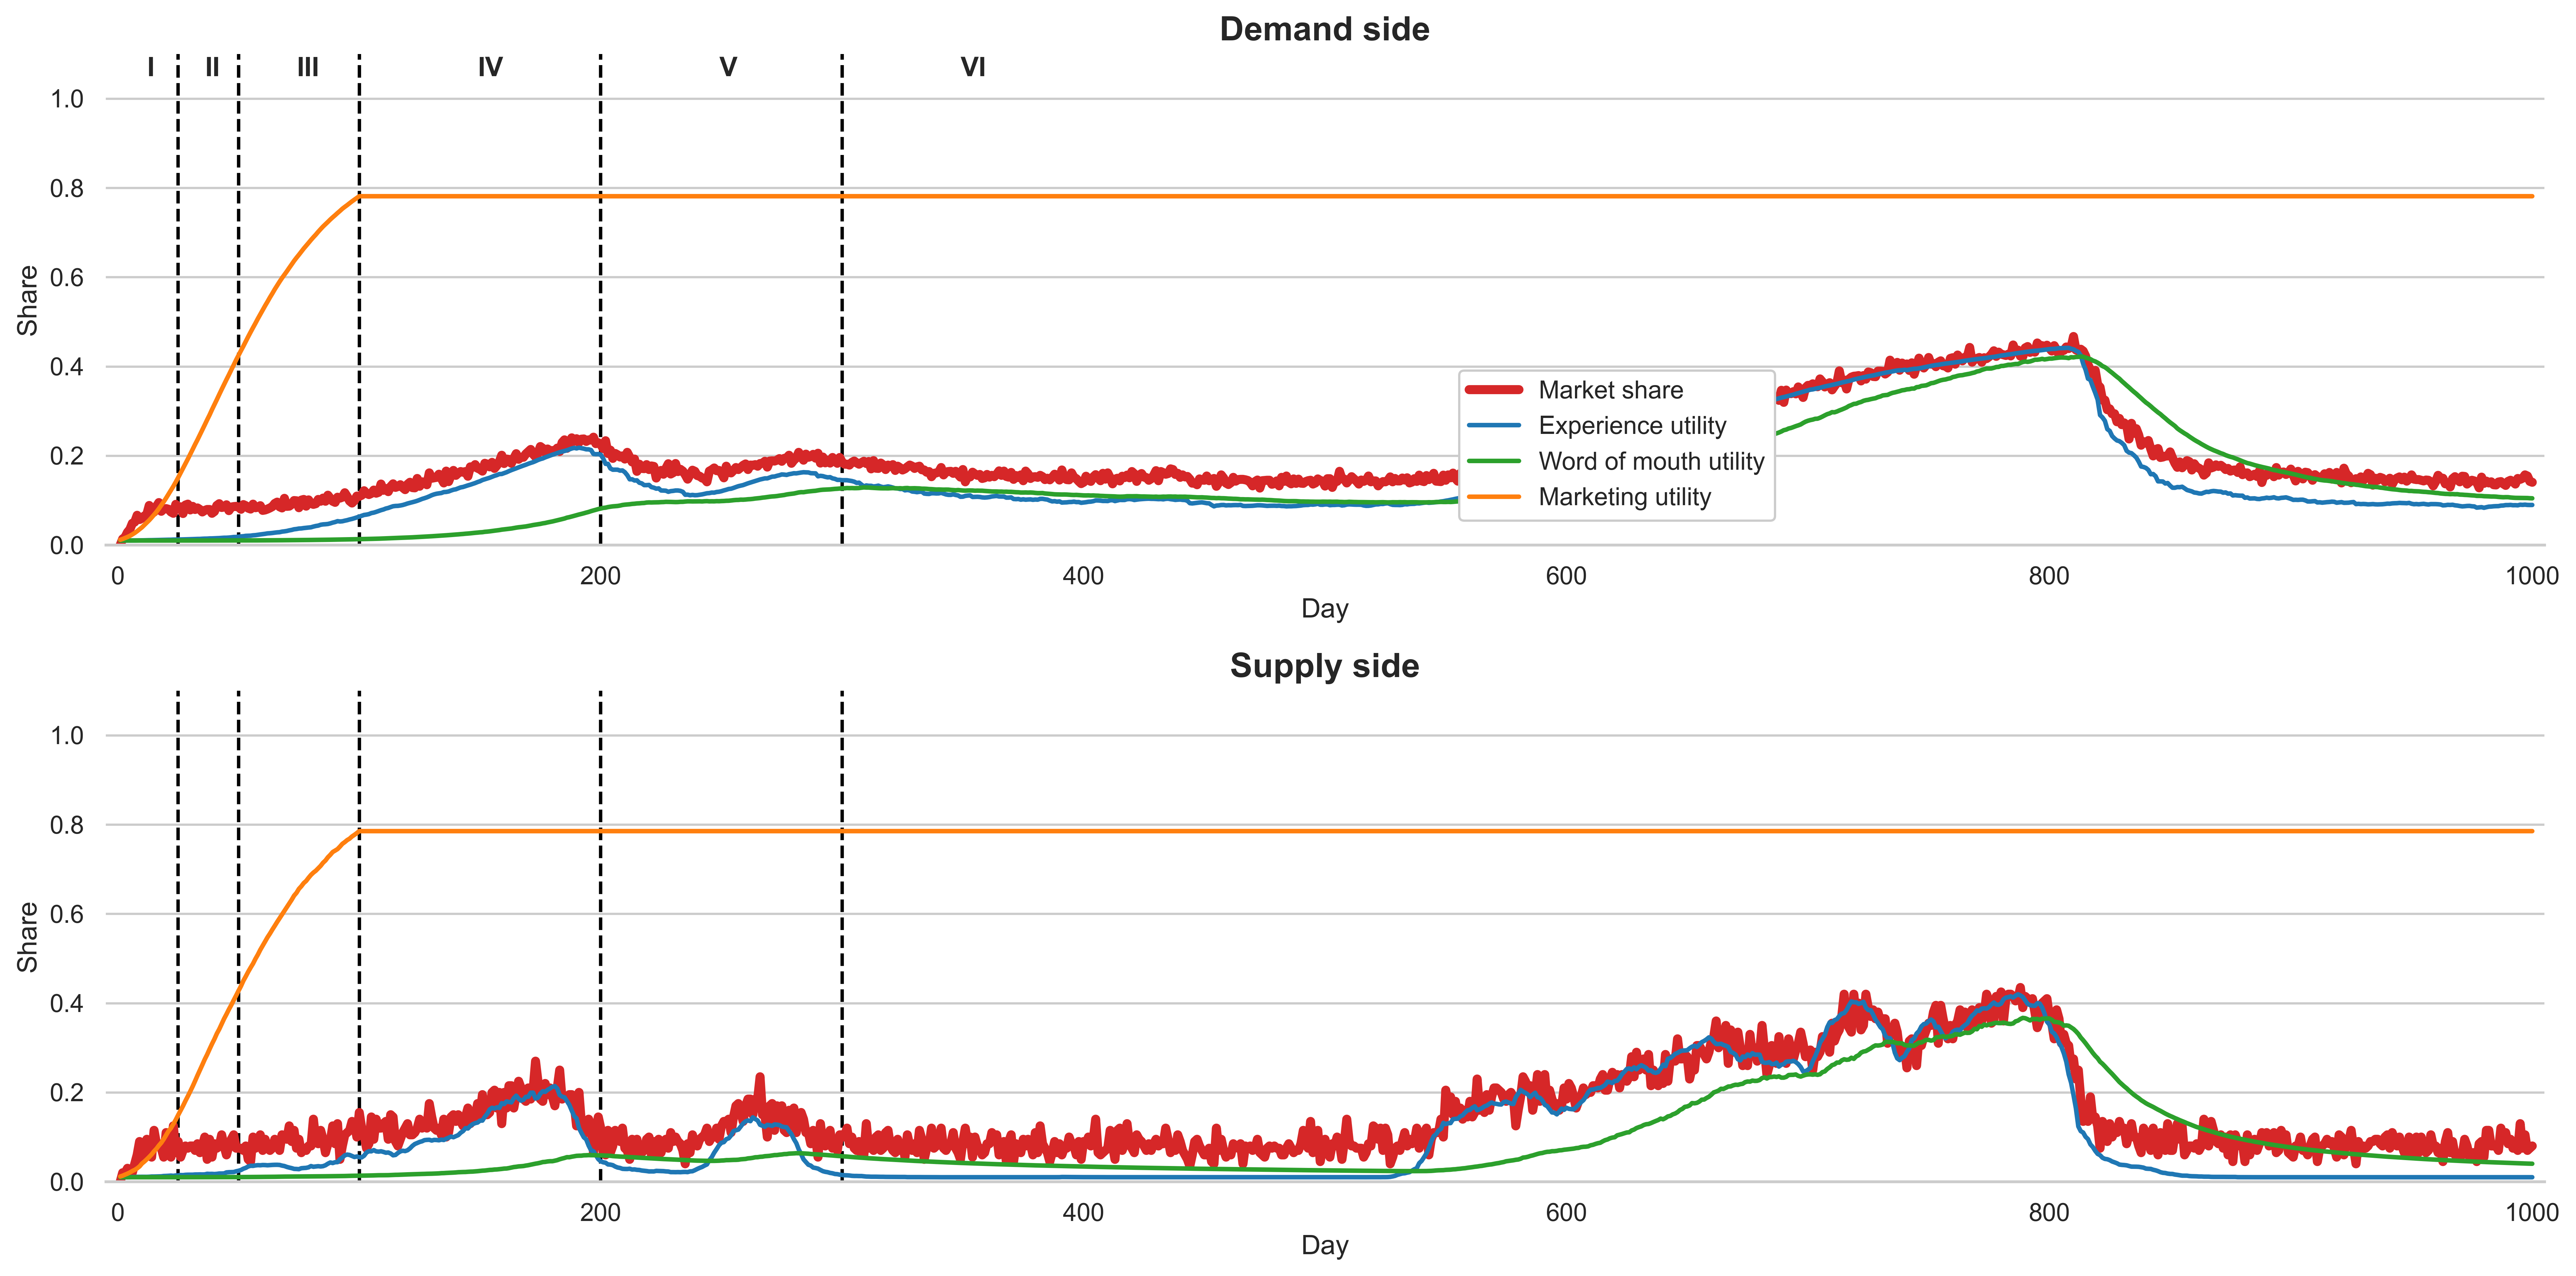

In [9]:
sim0 = sim_rln_train
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,1005))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim_rln_test,agent_test = MaaSSim.simulators.simulate_RLn_with_agent(input_agent=agent,params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

In [ ]:
sim_rln_test.RL.to_csv('../RL_EXP/csv/303030_5x/400_24x24x24_1585_0.001_rev_only_test_3.csv')

In [ ]:
sim0 = sim_rln_test
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim = sim_rln

In [ ]:
sim.res[100].veh_exp

In [ ]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [ ]:
sim.res[100].pax_exp.plat_revenue

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [ ]:
sim.platforms.fare[1]

In [ ]:
sim

In [ ]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
20/582

In [ ]:
=====================================================================================

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [ ]:
df = pd.read_csv('csv/baseline_fast.csv')
df

In [ ]:
df.Platform_rev.max()

In [ ]:
2638.8502